# ANÁLISE EXPLORATÓRIA ENADE 2017 - CURSO FILOSOFIA
___

><em>O Exame Nacional de Desempenho dos Estudantes (Enade) avalia o rendimento dos concluintes dos cursos de graduação em relação aos conteúdos programáticos previstos nas diretrizes curriculares dos cursos, o desenvolvimento de competências e habilidades necessárias ao aprofundamento da formação geral e profissional, e o nível de atualização dos estudantes com relação à realidade brasileira e mundial.(INEP)</em>
<p>
<br>
   
O escopo do projeto é apresentar análise exploratória dos dados do ENADE, especificamente dos dados referentes ao curso de filosofia. Para tal, utilizamos os microdados presentes no site do INEP. Como objetivo específico, pretendemos apurar a relação entre notas e informações da instituição, características e perfil socioeconômico dos graduandos da filosofia.</p>



## 1. IMPORTAR, PREPARAR E TRATAR OS DADOS

In [1]:
# Pacotes
library(tidyverse)
library(skimr)
library(data.table)
library(gridExtra)
library(summarytools)
library(PerformanceAnalytics)



-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')


Attaching package: 'summarytools'


The following object is masked from 'package:tibble':

    view


Loading required pa

In [2]:
# Importar dados ENADE 2017
df_enade<- read.table("MICRODADOS_ENADE_2017.txt", header = T, sep = ";", dec = ",") %>%
  select(CO_CATEGAD, CO_ORGACAD, CO_GRUPO, CO_MODALIDADE, CO_UF_CURSO, CO_REGIAO_CURSO, 
         NU_IDADE, TP_SEXO, ANO_FIM_EM, ANO_IN_GRAD, CO_TURNO_GRADUACAO, NT_GER, NT_FG, 
         NT_OBJ_FG, NT_DIS_FG, NT_CE, NT_OBJ_CE, NT_DIS_CE, CO_RS_I1, CO_RS_I2, CO_RS_I9, 
         QE_I01, QE_I02, QE_I04, QE_I05, QE_I06, QE_I07, QE_I08, QE_I09, QE_I10, QE_I11, 
         QE_I12, QE_I13, QE_I15, QE_I18) %>% 
na.omit()

In [3]:
# Sumário dos dados
summary(df_enade)

   CO_CATEGAD      CO_ORGACAD       CO_GRUPO    CO_MODALIDADE   
 Min.   :1.000   Min.   :10019   Min.   :  21   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:10022   1st Qu.:2001   1st Qu.:1.0000  
 Median :4.000   Median :10028   Median :2402   Median :1.0000  
 Mean   :3.351   Mean   :10025   Mean   :3238   Mean   :0.7973  
 3rd Qu.:5.000   3rd Qu.:10028   3rd Qu.:5710   3rd Qu.:1.0000  
 Max.   :7.000   Max.   :10028   Max.   :6409   Max.   :1.0000  
  CO_UF_CURSO    CO_REGIAO_CURSO    NU_IDADE       TP_SEXO         
 Min.   :11.00   Min.   :1.000   Min.   :16.00   Length:449520     
 1st Qu.:31.00   1st Qu.:3.000   1st Qu.:23.00   Class :character  
 Median :35.00   Median :3.000   Median :26.00   Mode  :character  
 Mean   :33.94   Mean   :3.055   Mean   :28.87                     
 3rd Qu.:41.00   3rd Qu.:4.000   3rd Qu.:33.00                     
 Max.   :53.00   Max.   :5.000   Max.   :87.00                     
   ANO_FIM_EM    ANO_IN_GRAD   CO_TURNO_GRADUACAO     NT_GER     
 Mi

In [4]:
# Preparar Variáveis da base df_enade

df_enade$CO_CATEGAD<- factor(df_enade$CO_CATEGAD,
                                levels = c(1,2,3,4,5,7), 
                                labels = c("Federal", "Estadual", "Municipal", 
                                           "Privado c/fins lucrativos", "Privado s/fins lucrativos", 
                                           "Especial"))
df_enade$CO_ORGACAD<- factor(df_enade$CO_ORGACAD,
                             levels=c(10019, 10020, 10022, 10026, 10028),
                             labels=c("CEFET", 
                                      "Centro Universário", "Faculdade", 
                                      "IFECT",
                                      "Universidade"))
df_enade$CO_MODALIDADE<- factor(df_enade$CO_MODALIDADE, 
                                levels=c(0,1), 
                                labels=c("Ead", "Presencial"))
df_enade$CO_UF_CURSO<- factor(df_enade$CO_UF_CURSO,
                              levels=c(11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53), 
                              labels=c("RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL", "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"))
df_enade$CO_REGIAO_CURSO<- factor(df_enade$CO_REGIAO_CURSO,
                                  levels=c(1,2,3,4,5), 
                                  labels=c("Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"))
df_enade$TP_SEXO<- factor(df_enade$TP_SEXO, 
                          levels=c("M", "F"), 
                          labels=c("Masculino", "Feminino"))
df_enade$CO_TURNO_GRADUACAO<- factor(df_enade$CO_TURNO_GRADUACAO, 
                                     levels=c(1,2,3,4), 
                                     labels=c("Matutino", "Vespertino", "Integral", "Noturno"))

In [5]:
# Visualizar as 5 primeiras linhas
head(df_enade)


,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,...,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I15,QE_I18
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Federal,Universidade,5710,Presencial,MT,Centro-Oeste,26,Feminino,2007,2012,...,A,A,B,C,B,A,A,A,A,A
2,Federal,Universidade,5710,Presencial,MT,Centro-Oeste,23,Feminino,2013,2013,...,C,B,B,D,E,A,A,A,B,B
3,Federal,Universidade,5710,Presencial,MT,Centro-Oeste,23,Masculino,2011,2013,...,B,E,F,C,A,A,A,D,A,A
4,Federal,Universidade,5710,Presencial,MT,Centro-Oeste,23,Masculino,2011,2013,...,D,A,B,C,A,A,A,A,E,A
5,Federal,Universidade,5710,Presencial,MT,Centro-Oeste,24,Masculino,2010,2013,...,B,B,F,C,C,A,A,A,A,A
6,Federal,Universidade,5710,Presencial,MT,Centro-Oeste,23,Masculino,2011,2012,...,B,D,C,C,B,A,A,D,D,A


In [6]:
# Visualizar as 5 últimas linhas
tail(df_enade)

,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,...,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I15,QE_I18
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
534915,Privado s/fins lucrativos,Universidade,6407,Presencial,RS,Sul,24,Feminino,2012,2013,...,A,A,B,C,D,C,A,B,A,A
534916,Privado s/fins lucrativos,Universidade,6407,Presencial,RS,Sul,23,Masculino,2012,2013,...,B,B,B,A,A,E,A,A,A,A
534917,Privado s/fins lucrativos,Universidade,6407,Presencial,RS,Sul,32,Feminino,2007,2008,...,B,E,D,B,A,F,A,A,E,A
534918,Privado s/fins lucrativos,Universidade,6407,Presencial,RS,Sul,27,Feminino,2013,2014,...,B,D,E,B,A,E,A,A,A,D
534919,Privado s/fins lucrativos,Universidade,6407,Presencial,RS,Sul,21,Feminino,2013,2014,...,B,D,F,C,C,B,A,D,A,A
534920,Privado s/fins lucrativos,Universidade,6407,Presencial,RS,Sul,20,Feminino,2013,2014,...,B,C,F,B,B,B,A,B,A,A


In [7]:
# Checar valores faltantes (NAs)
f=function(x){any(is.na(x))}
check.na=apply(df_enade,2,f);
check.na  

CO_CATEGAD         CO_ORGACAD           CO_GRUPO      CO_MODALIDADE 
             FALSE              FALSE              FALSE              FALSE 
       CO_UF_CURSO    CO_REGIAO_CURSO           NU_IDADE            TP_SEXO 
             FALSE              FALSE              FALSE              FALSE 
        ANO_FIM_EM        ANO_IN_GRAD CO_TURNO_GRADUACAO             NT_GER 
             FALSE              FALSE              FALSE              FALSE 
             NT_FG          NT_OBJ_FG          NT_DIS_FG              NT_CE 
             FALSE              FALSE              FALSE              FALSE 
         NT_OBJ_CE          NT_DIS_CE           CO_RS_I1           CO_RS_I2 
             FALSE              FALSE              FALSE              FALSE 
          CO_RS_I9             QE_I01             QE_I02             QE_I04 
             FALSE              FALSE              FALSE              FALSE 
            QE_I05             QE_I06             QE_I07             QE_I08 
             FALSE              FALSE              FALSE              FALSE 
            QE_I09             QE_I10             QE_I11             QE_I12 
             FALSE              FALSE              FALSE              FALSE 
            QE_I13             QE_I15             QE_I18 
             FALSE              FALSE              FALSE

In [8]:
# Subconjunto de dados do curso de filosofia
df_enade_fil<- df_enade %>%
  filter(CO_GRUPO == 3201 | CO_GRUPO ==3202) %>%
na.omit()

In [9]:
# Preparar variáveis da base df_enade_fil
df_enade_fil$CO_RS_I1<- factor(df_enade_fil$CO_RS_I1,
                               levels = c("A", "B", "C", "D", "E", "*", "."),
                               labels = c("Muito Fácil", "Fácil", "Médio",
                                          "Difícil", "Muito Díficil", "Anulada", "Não Respondeu"))

df_enade_fil$CO_RS_I2<- factor(df_enade_fil$CO_RS_I2,
                               levels = c("A", "B", "C", "D", "E", "*", "."),
                               labels = c("Muito Fácil", "Fácil", "Médio",
                                          "Difícil", "Muito Díficil", "Anulada", "Não Respondeu"))

df_enade_fil$CO_RS_I9<- factor(df_enade_fil$CO_RS_I9,
                               levels = c("A", "B", "C", "D", "E", "*", "."),
                               labels = c("Menos de 1 hora", "Entre 1 e 2 hrs",
                                          "Entre 2 e 3 hrs", "Entre 3 e 4 hrs",
                                          "4 hrs e não terminou",
                                          "Anulada", "Não Respondeu"))
df_enade_fil$QE_I01<- factor(df_enade_fil$QE_I01,
                             levels = c("A", "B", "C", "D", "E"),
                             labels = c("Solteiro(a)", "Casado(a)", "Separado(a)",
                                        "Viúvo(a)", "Outro"))

df_enade_fil$QE_I02<- factor(df_enade_fil$QE_I02,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Branca", "Preta", "Amarela",
                                        "Parda", "Indígena", "Não quero declarar"))

df_enade_fil$QE_I04<- factor(df_enade_fil$QE_I04,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Nenhuma", "Ensino Fundamental I",
                                        "Ensino Fundamental II", "Ensino Médio",
                                        "Ensino Superior", "Pós-graduação"))

df_enade_fil$QE_I05<- factor(df_enade_fil$QE_I05,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Nenhuma", "Ensino Fundamental I",
                                        "Ensino Fundamental II", "Ensino Médio",
                                        "Ensino Superior", "Pós-graduação"))

df_enade_fil$QE_I06<- factor(df_enade_fil$QE_I06,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Mora sozinho", "Mora com flia",
                                        "Mora c/cônjuge e/ou filhos", "Mora c/outras pessoas",
                                        "Alojamento universitário",
                                        "Outros tipo de habitação"))


df_enade_fil$QE_I07<- factor(df_enade_fil$QE_I07,
                             levels = c("A", "B", "C", "D", "E", "F", "G", "H"),
                             labels = c("Nenhuma", "Uma", "Duas", "Três", "Quatro",
                                        "Cinco", "Seis", "Sete ou mais"))

df_enade_fil$QE_I08<- factor(df_enade_fil$QE_I08,
                             levels = c("A", "B", "C", "D", "E", "F", "G"),
                             labels = c("Até 1,5 SM",
                                        "De 1,5 a 3 SM",
                                        "De 3 a 4,5 SM",
                                        "De 4,5 a 6 SM",
                                        "De 6 a 10 SM",
                                        "De 10 a 30 SM",
                                        "Acima de 30 SM"))


df_enade_fil$QE_I09<- factor(df_enade_fil$QE_I09,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Sem renda (programas gov.)", 
                                        "Sem renda (flia ou outros)",
                                        "Renda (flia ou outros)",
                                        "Renda (não preciso)",
                                        "Renda (contribuo c/sustento)",
                                        "Principal resp. pelo sustento"))


df_enade_fil$QE_I10<- factor(df_enade_fil$QE_I10,
                             levels = c("A", "B", "C", "D", "E"),
                             labels = c("Não estou trabalhando",
                                        "Trabalho eventualmente",
                                        "Trabalho até 20 hrs/sem",
                                        "Trabalho de 21-39 hrs/sem",
                                        "Trabalho 40 hrs/sem ou +"))

df_enade_fil$QE_I11<- factor(df_enade_fil$QE_I11,
                             levels = c("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"),
                             labels = c("Nenhum (curso é gratuito)",
                                        "Nenhum (curso pago)",
                                        "ProUni integral", "ProUni parcial",
                                        "FIES", "ProUni Parcial e FIES",
                                        "Bolsa (estadual, distrital ou municipal)",
                                        "Bolsa (própria instituição)",
                                        "Bolsa (empresa, ONG, etc)",
                                        "Financiamento (instituição)", "Financiamento bancário"))

df_enade_fil$QE_I12<- factor(df_enade_fil$QE_I12,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Nenhum", "Auxílio moradia", "Auxílio alimentação",
                                        "Auxílio moradia e alimentação", "Auxílio permanência",
                                        "Outro tipo de auxílio"))

df_enade_fil$QE_I13<- factor(df_enade_fil$QE_I13,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Nenhum", "Bolsa de iniciação científica",
                                        "Bolsa de extensão", "Bolsa de monitoria/tutoria",
                                        "Bolsa PET", "Outro tipo de bolsa acadêmica"))


df_enade_fil$QE_I15<- factor(df_enade_fil$QE_I15,
                             levels = c("A", "B", "C", "D", "E", "F"),
                             labels = c("Não", "Sim (critério étnico-racial)",
                                        "Sim (critério de renda)",
                                        "Sim (escola pública ou particular c/bolsa)",
                                        "Sim (combinação de critérios anteriores)",
                                        "Sim (sistema diferente dos anteriores"))

df_enade_fil$QE_I18<- factor(df_enade_fil$QE_I18,
                             levels = c("A", "B", "C", "D", "E"),
                             labels = c("Ensino médio tradicional",
                                        "Profissionalizante técnico",
                                        "Profissionalizante magistério (Curso Normal)",
                                        "EJA e/ou Supletivo",
                                        "Outra modalidade"))

In [10]:
# Checar valores faltantes (NAs)
f=function(x){any(is.na(x))}
check.na=apply(df_enade_fil,2,f);
check.na  

CO_CATEGAD         CO_ORGACAD           CO_GRUPO      CO_MODALIDADE 
             FALSE              FALSE              FALSE              FALSE 
       CO_UF_CURSO    CO_REGIAO_CURSO           NU_IDADE            TP_SEXO 
             FALSE              FALSE              FALSE              FALSE 
        ANO_FIM_EM        ANO_IN_GRAD CO_TURNO_GRADUACAO             NT_GER 
             FALSE              FALSE              FALSE              FALSE 
             NT_FG          NT_OBJ_FG          NT_DIS_FG              NT_CE 
             FALSE              FALSE              FALSE              FALSE 
         NT_OBJ_CE          NT_DIS_CE           CO_RS_I1           CO_RS_I2 
             FALSE              FALSE              FALSE              FALSE 
          CO_RS_I9             QE_I01             QE_I02             QE_I04 
             FALSE               TRUE               TRUE               TRUE 
            QE_I05             QE_I06             QE_I07             QE_I08 
              TRUE               TRUE               TRUE               TRUE 
            QE_I09             QE_I10             QE_I11             QE_I12 
              TRUE               TRUE               TRUE               TRUE 
            QE_I13             QE_I15             QE_I18 
              TRUE               TRUE               TRUE

In [11]:
# Tratar valores faltantes (NAs)
df_enade_fil<- na.omit(df_enade_fil)

In [12]:
# Visualizar as 5 primeiras linhas
head(df_enade_fil)


,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,...,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I15,QE_I18
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Federal,Universidade,3202,Presencial,SE,Nordeste,47,Masculino,1990,2013,...,Mora c/cônjuge e/ou filhos,Duas,"De 3 a 4,5 SM",Principal resp. pelo sustento,Trabalho 40 hrs/sem ou +,Nenhum (curso é gratuito),Nenhum,Nenhum,Não,Ensino médio tradicional
2,Federal,Universidade,3202,Presencial,SE,Nordeste,50,Feminino,1994,2012,...,Mora com flia,Quatro,"Até 1,5 SM",Sem renda (flia ou outros),Não estou trabalhando,Nenhum (curso é gratuito),Nenhum,Nenhum,Não,Profissionalizante magistério (Curso Normal)
3,Federal,Universidade,3202,Presencial,SE,Nordeste,29,Masculino,2008,2011,...,Mora com flia,Quatro,"De 1,5 a 3 SM",Renda (flia ou outros),Trabalho 40 hrs/sem ou +,Nenhum (curso é gratuito),Nenhum,Bolsa de iniciação científica,Sim (escola pública ou particular c/bolsa),Profissionalizante técnico
4,Federal,Universidade,3202,Presencial,SE,Nordeste,24,Feminino,2011,2012,...,Mora com flia,Uma,"De 4,5 a 6 SM",Renda (contribuo c/sustento),Trabalho 40 hrs/sem ou +,Nenhum (curso é gratuito),Nenhum,Nenhum,Não,Ensino médio tradicional
5,Federal,Universidade,3202,Presencial,SE,Nordeste,27,Masculino,2008,2014,...,Mora com flia,Três,"De 1,5 a 3 SM",Renda (flia ou outros),Trabalho até 20 hrs/sem,Nenhum (curso pago),Nenhum,Bolsa de iniciação científica,Não,Ensino médio tradicional
6,Federal,Universidade,3202,Presencial,SE,Nordeste,21,Feminino,2013,2014,...,Mora c/outras pessoas,Nenhuma,"Até 1,5 SM",Renda (flia ou outros),Não estou trabalhando,Nenhum (curso é gratuito),Nenhum,Bolsa de iniciação científica,Sim (escola pública ou particular c/bolsa),Ensino médio tradicional


In [13]:
# Visualizar as 5 últimas linhas
tail(df_enade_fil)

,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_MODALIDADE,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,...,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I15,QE_I18
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
5050,Federal,Universidade,3202,Presencial,RS,Sul,23,Feminino,2011,2012,...,Mora c/outras pessoas,Nenhuma,"De 3 a 4,5 SM",Renda (não preciso),Trabalho 40 hrs/sem ou +,Nenhum (curso é gratuito),Auxílio moradia e alimentação,Nenhum,Sim (combinação de critérios anteriores),Ensino médio tradicional
5051,Federal,Universidade,3202,Presencial,RS,Sul,56,Feminino,2001,2011,...,Mora c/cônjuge e/ou filhos,Uma,"De 1,5 a 3 SM",Renda (contribuo c/sustento),Trabalho 40 hrs/sem ou +,Nenhum (curso é gratuito),Nenhum,Nenhum,Não,EJA e/ou Supletivo
5052,Federal,Universidade,3202,Presencial,RS,Sul,58,Masculino,1979,2012,...,Mora c/cônjuge e/ou filhos,Uma,"De 4,5 a 6 SM",Renda (não preciso),Trabalho até 20 hrs/sem,Nenhum (curso é gratuito),Nenhum,Nenhum,Sim (combinação de critérios anteriores),Profissionalizante técnico
5053,Federal,Universidade,3202,Presencial,RS,Sul,26,Feminino,2008,2014,...,Outros tipo de habitação,Uma,"Até 1,5 SM",Sem renda (programas gov.),Trabalho eventualmente,Nenhum (curso é gratuito),Auxílio alimentação,Bolsa de extensão,Não,Ensino médio tradicional
5054,Federal,Universidade,3202,Presencial,RS,Sul,30,Feminino,2005,2012,...,Mora c/outras pessoas,Nenhuma,"De 1,5 a 3 SM",Principal resp. pelo sustento,Não estou trabalhando,Nenhum (curso pago),Auxílio permanência,Nenhum,Sim (escola pública ou particular c/bolsa),Ensino médio tradicional
5055,Federal,Universidade,3202,Presencial,RS,Sul,28,Feminino,2006,2012,...,Mora sozinho,Nenhuma,"Até 1,5 SM",Sem renda (programas gov.),Trabalho até 20 hrs/sem,Nenhum (curso é gratuito),Auxílio moradia e alimentação,Bolsa de extensão,Não,Ensino médio tradicional


## 2. ANÁLISE DESCRITIVA - ENADE 2017 GERAL

### 2.1 INFORMAÇÕES DA INSTITUIÇÃO DE ENSINO SUPERIOR E DOS CURSOS

In [14]:
info1<- df_enade %>%
  ggplot(aes(CO_CATEGAD, fill = CO_CATEGAD)) +
  geom_bar(show.legend = F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1, size=14)) +
  labs(title = "Categoria administrativa da IES", fill = "Categoria", x= NULL, y= NULL) +
  scale_x_discrete(limits = c("Municipal", "Estadual", "Federal",
"Privado s/fins lucrativos","Privado c/fins lucrativos", "Especial"))

In [15]:
info2<-  df_enade %>%
  ggplot(aes(CO_ORGACAD, fill = CO_ORGACAD)) +
  geom_bar(show.legend = F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1, size=14)) +
  labs(x = NULL, y = NULL,title = "Organização acadêmica da IES", fill = "Organização") 

In [16]:
info3<- df_enade %>%
  ggplot(aes(CO_MODALIDADE, fill = CO_MODALIDADE)) +
  geom_bar(show.legend = F) +
  labs(x = NULL, y= NULL, title = "Modalidade de ensino", fill = "Modalidade") +
  theme(axis.text.x = element_text(size = 14))

In [17]:
info4<- df_enade %>%
  ggplot(aes(CO_UF_CURSO, fill = CO_UF_CURSO)) +
  geom_bar(show.legend = F) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=14)) +
  labs(x = NULL, y=NULL, title = "Região de funcionamento do curso", fill = "Região") 

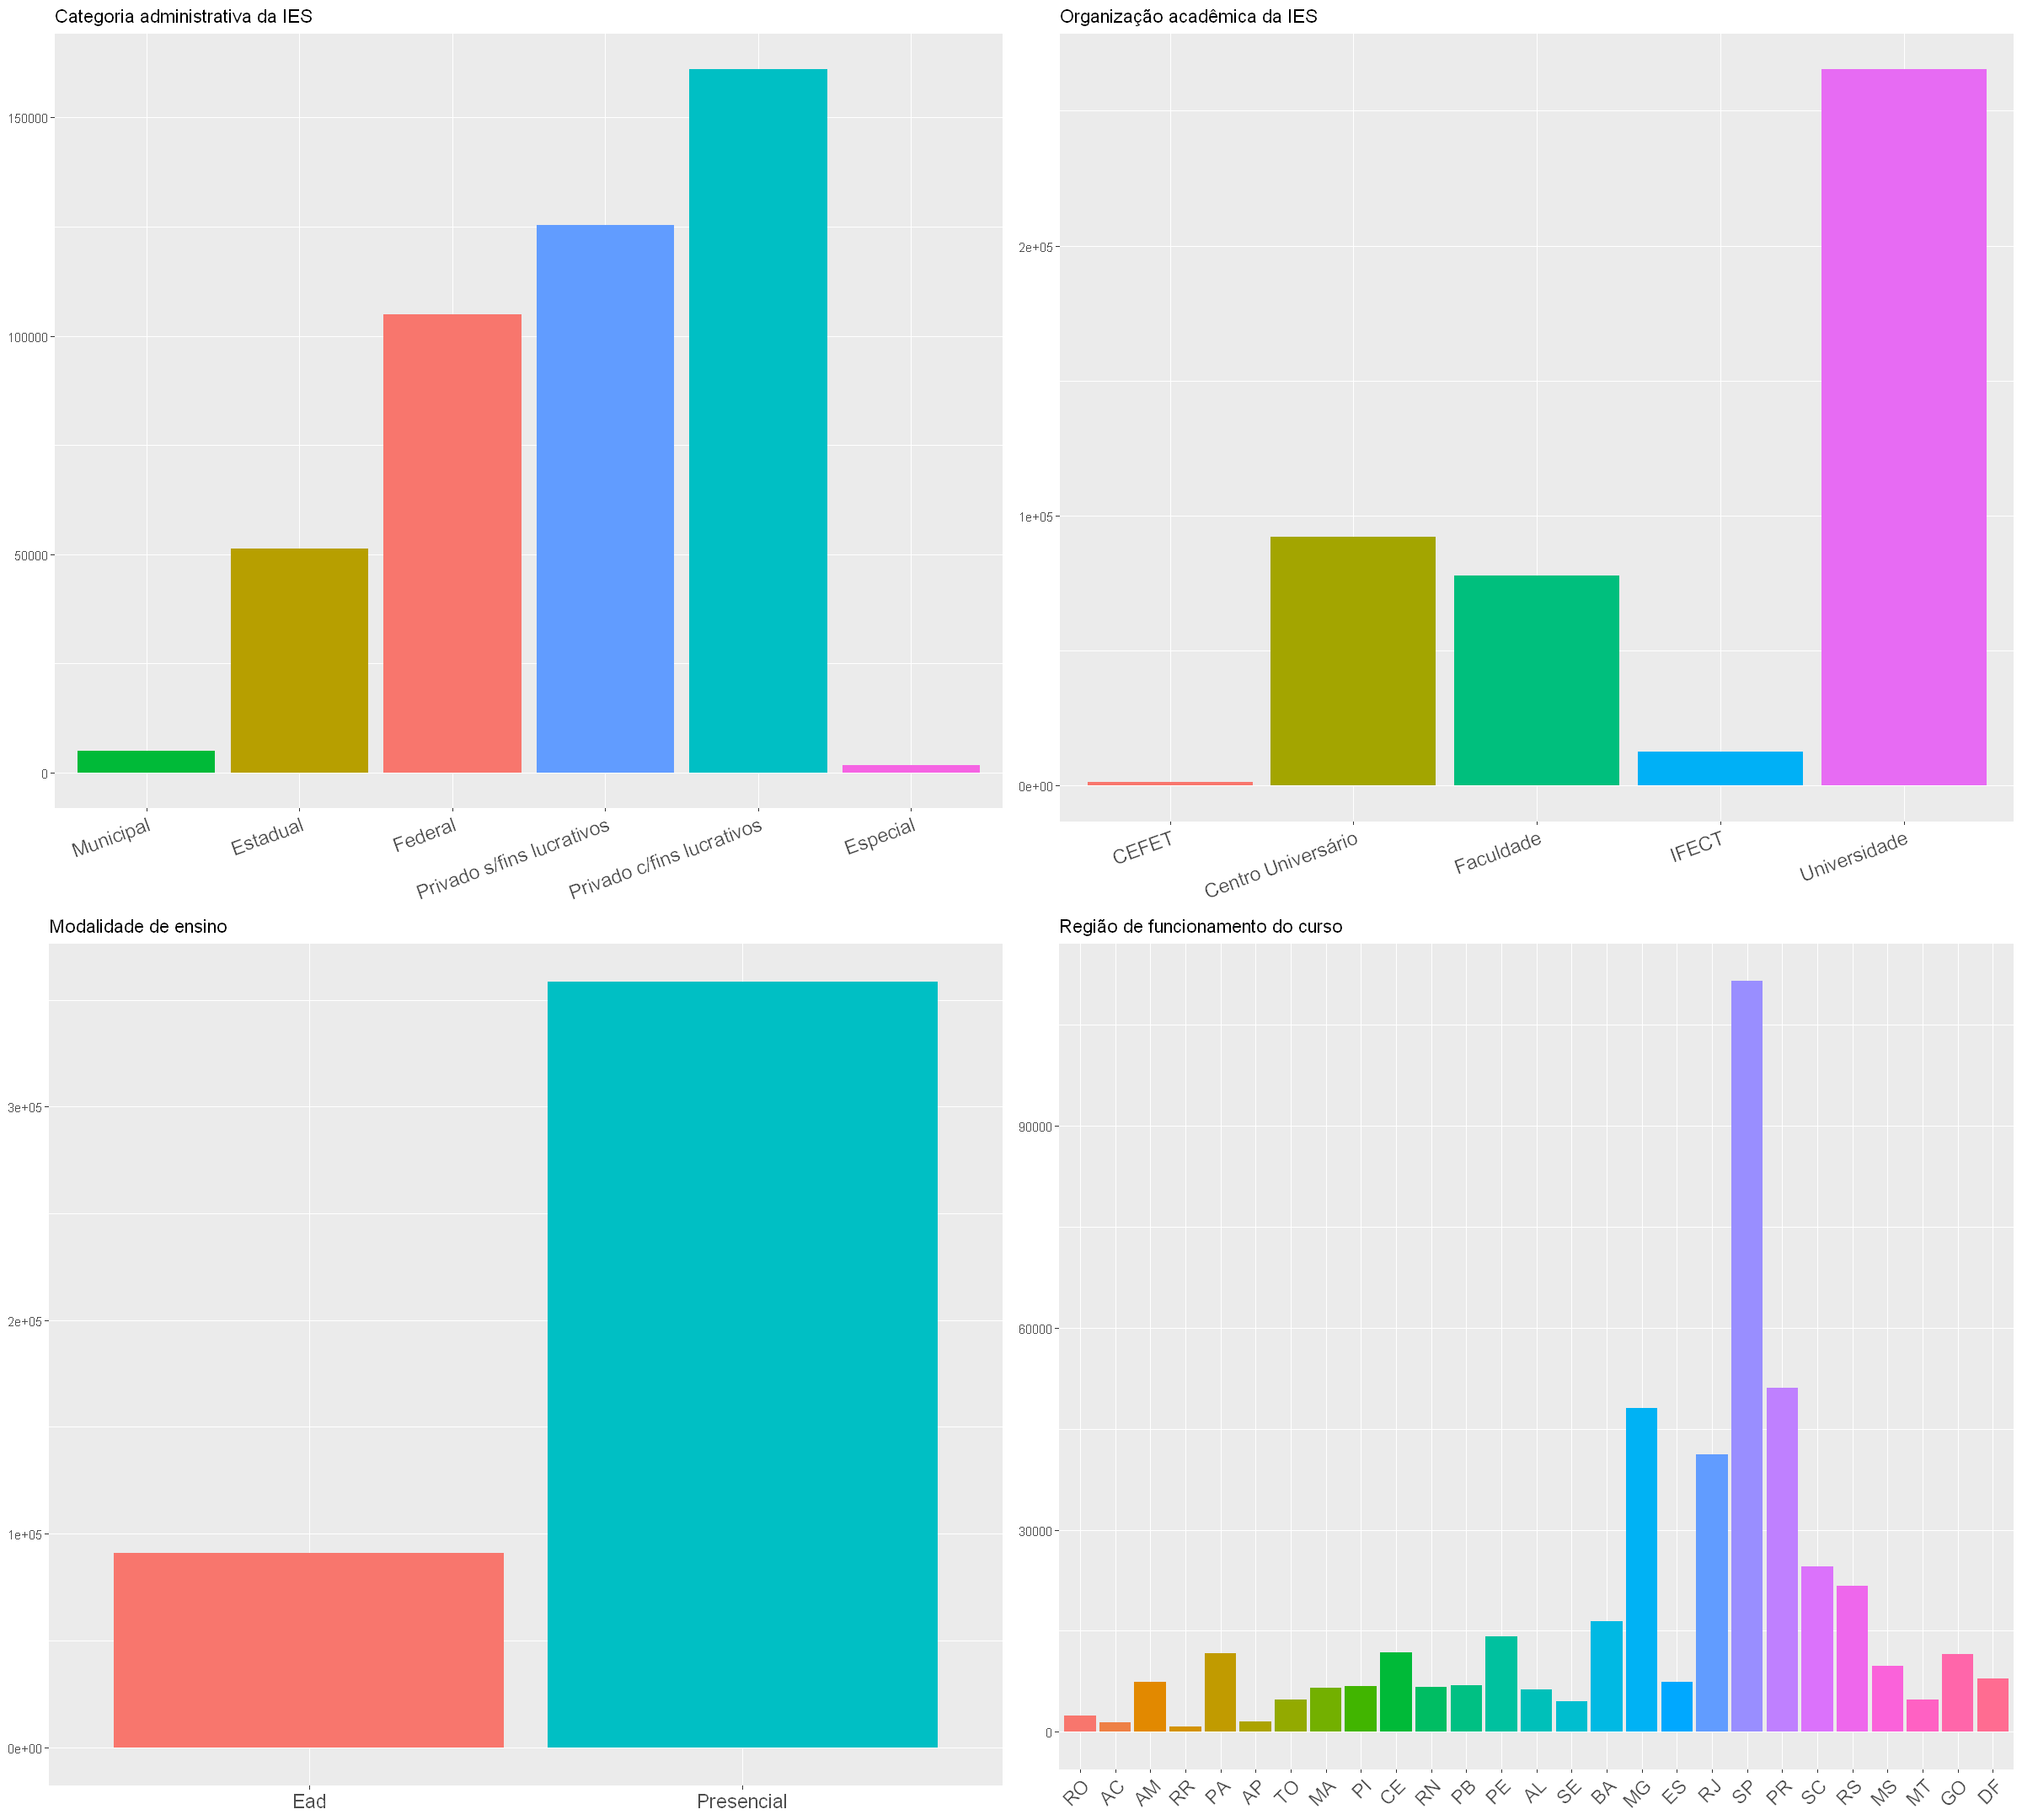

In [18]:
# Gráficos de informações sobre IEs e Curso
options(repr.plot.width=20, repr.plot.height=18)
grid.arrange(info1, info2, info3, info4)

### 2.2 NOTAS ENADE

In [19]:
# Estatística descritiva das notas das provas
df_enade %>%
  select(NT_GER, NT_FG, NT_OBJ_FG, NT_DIS_FG,
         NT_CE, NT_OBJ_CE, NT_DIS_CE) %>%
skim_without_charts() %>%
as.tibble()

Warning message:
"`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
numeric,NT_GER,0,1,43.52526,14.08165,0,33.4,42.9,53.1,98.1
numeric,NT_FG,0,1,51.42618,17.61453,0,39.4,52.3,64.0,99.4
numeric,NT_OBJ_FG,0,1,49.86220,21.53479,0,37.5,50.0,62.5,100.0
numeric,NT_DIS_FG,0,1,53.77013,24.05743,0,41.0,59.5,71.5,99.0
numeric,NT_CE,0,1,40.87494,15.48640,0,29.6,40.0,51.4,100.0
numeric,NT_OBJ_CE,0,1,42.95144,16.52011,0,30.4,42.1,54.5,100.0
numeric,NT_DIS_CE,0,1,29.10239,22.47688,0,10.0,26.7,46.7,100.0


In [20]:
nota1<-df_enade %>%
  ggplot(aes(NT_GER)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(title = "Nota Bruta da Prova", x=NULL, y=NULL) +
  scale_x_continuous(breaks = seq(min(df_enade$NT_GER), max(df_enade$NT_GER),by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [21]:
nota2<-df_enade %>%
  ggplot(aes(NT_FG)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(title="Nota Bruta na Formação Geral", x=NULL, y=NULL) +
  scale_x_continuous(breaks = seq(min(df_enade$NT_FG), max(df_enade$NT_FG), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [22]:
nota3<- df_enade %>%
  ggplot(aes(NT_CE)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(title = "Nota Bruta no Componente Específico", x=NULL, y=NULL) +
  scale_x_continuous(breaks = seq(min(df_enade$NT_CE), max(df_enade$NT_CE), by=10)) +
  theme(axis.text.x = element_text(size = 14))
  

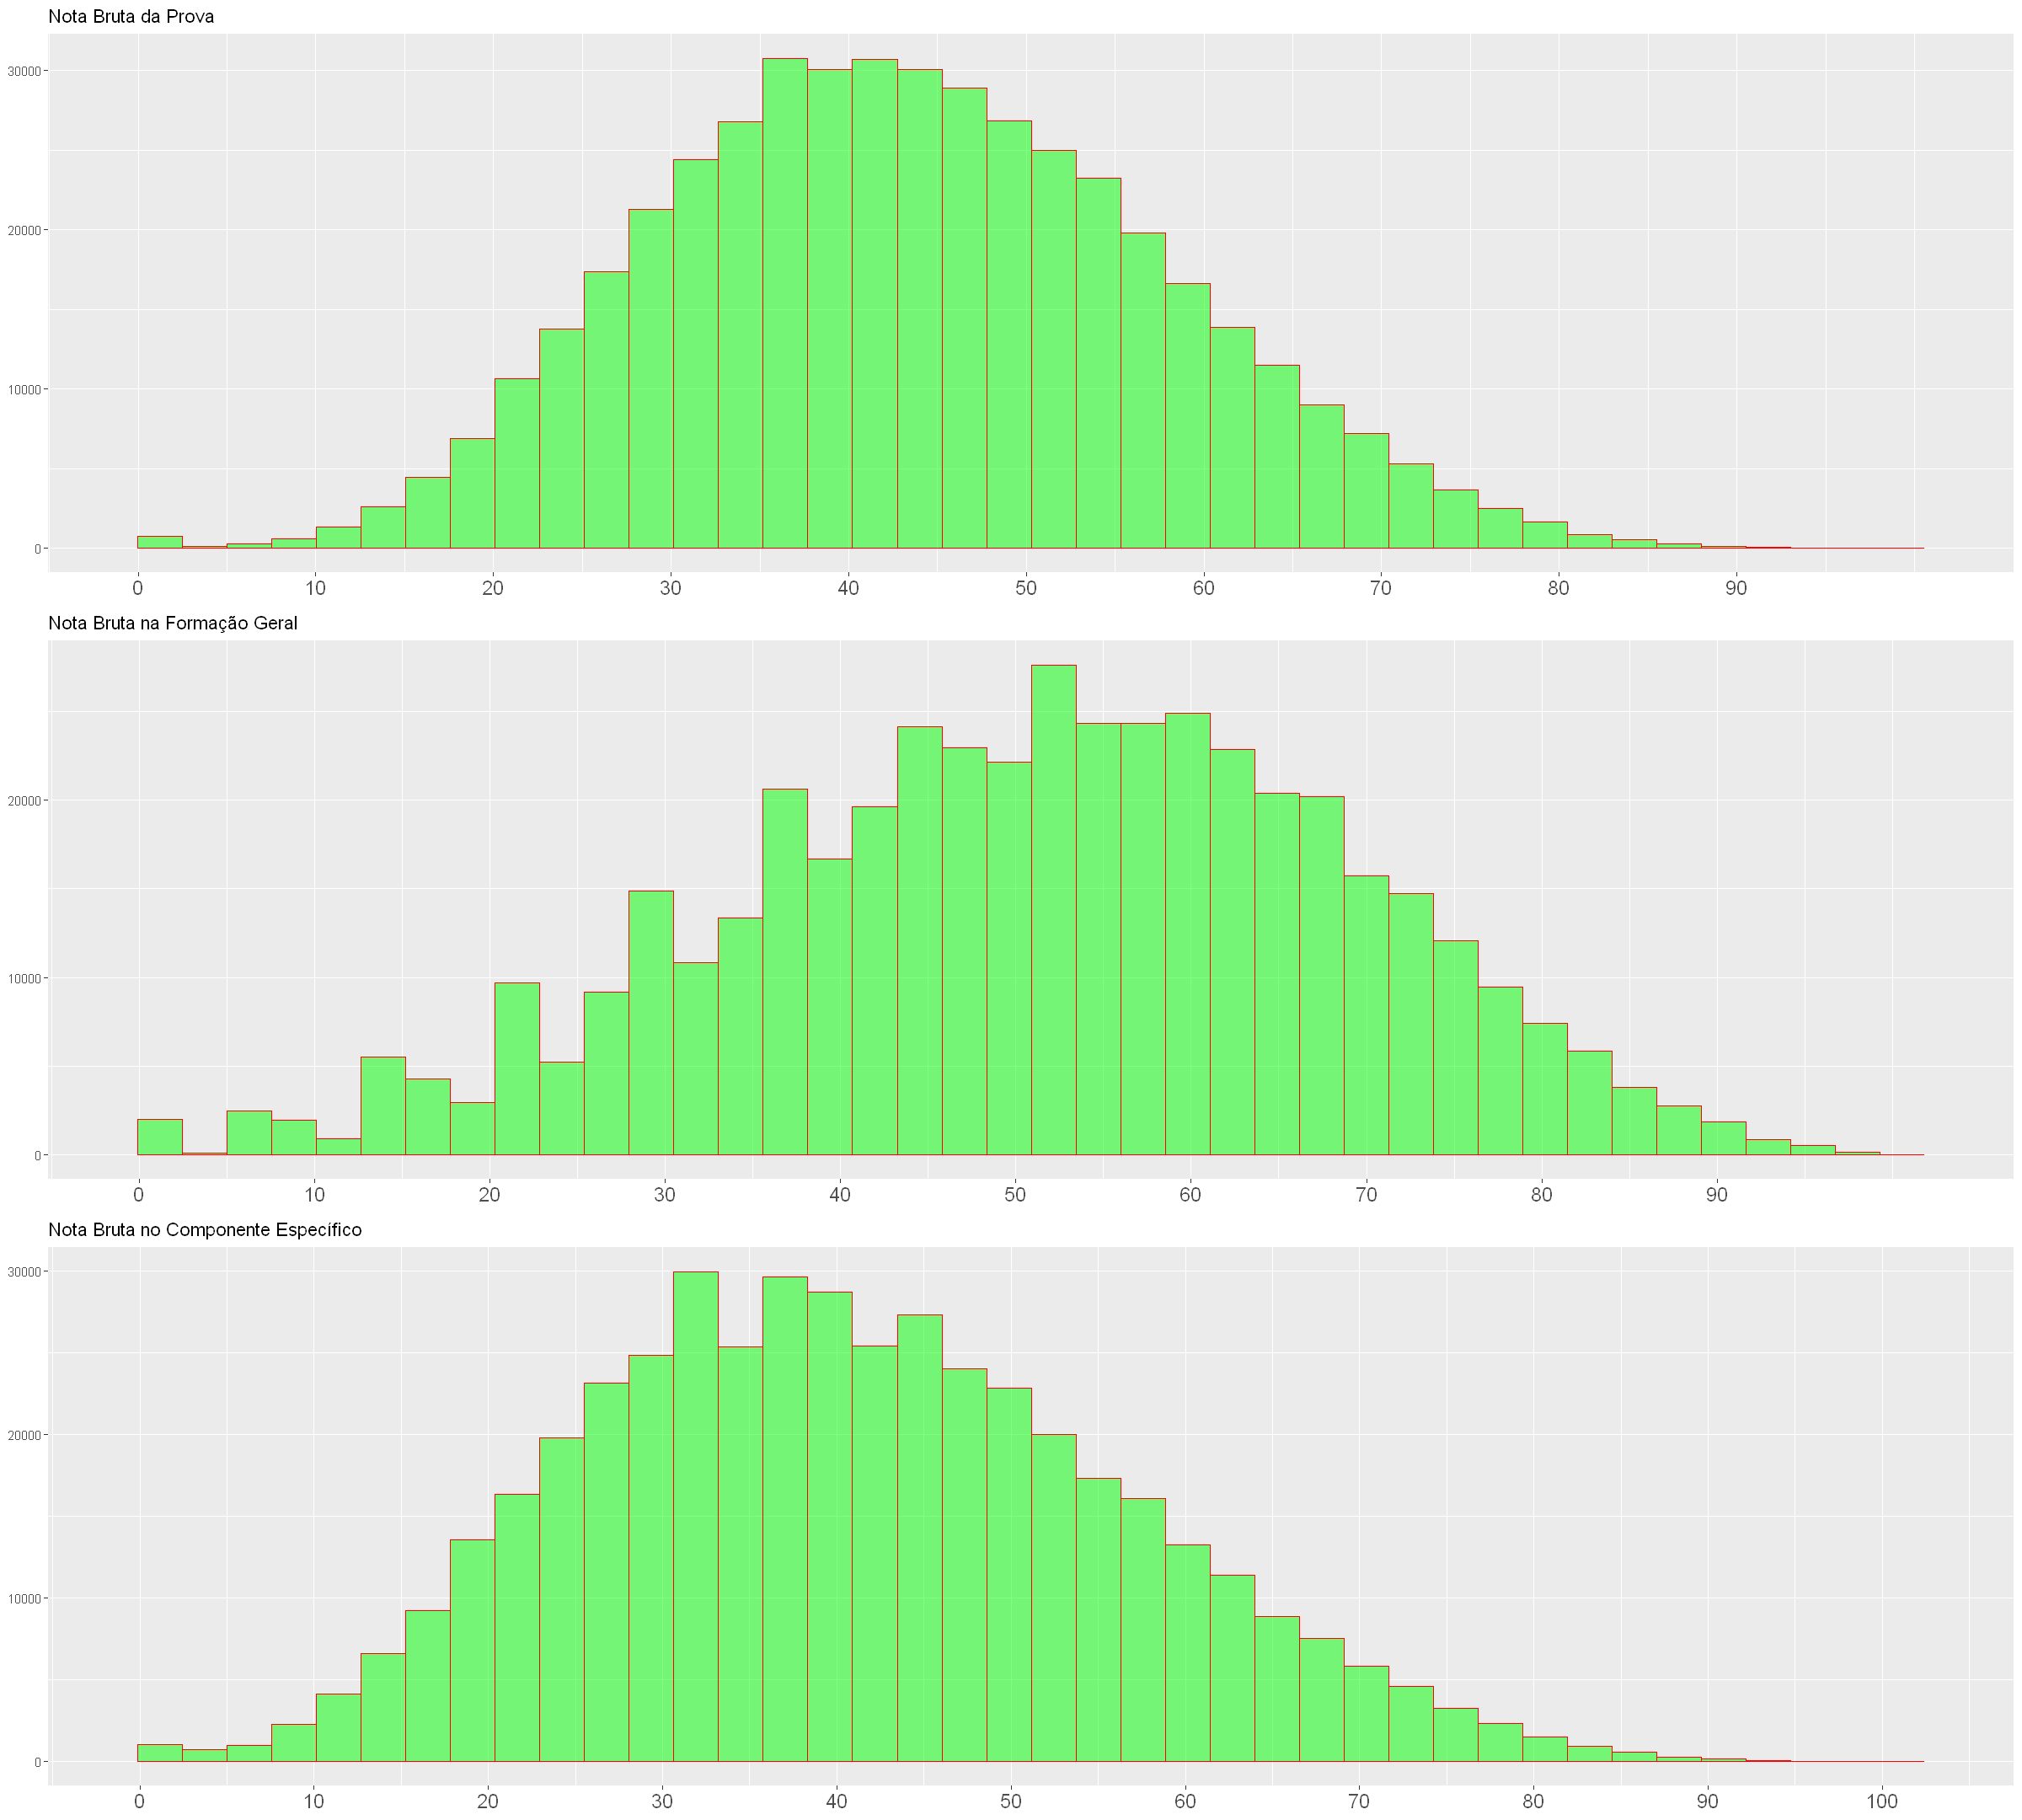

In [23]:
# Gráficos das notas do enade
grid.arrange(nota1, nota2, nota3)

## 3. ANÁLISE DESCRITIVA ENADE - CURSO FILOSOFIA

### 3.1 INFORMAÇÕES DA INSTITUIÇÃO DE ENSINO SUPERIOR E DO CURSO

In [24]:
info_fil1<- df_enade_fil %>%
  ggplot(aes(CO_CATEGAD, fill = CO_CATEGAD)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1, size=14)) +
  labs(x = NULL, y=NULL, title = "Categoria Administrativa da IES") +
  scale_x_discrete(limits = c("Municipal", "Estadual", "Federal",
                              "Privado s/fins lucrativos","Privado c/fins lucrativos"))

In [25]:
info_fil2<- df_enade_fil %>%
  ggplot(aes(CO_ORGACAD, fill = CO_ORGACAD)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x = NULL, y=NULL, title = "Organização Acadêmica da IES")

In [26]:
info_fil3<- df_enade_fil %>%
  ggplot(aes(CO_MODALIDADE, fill = CO_MODALIDADE)) +
  geom_bar(show.legend=F) +
  labs(x =NULL, y=NULL,title =  "Modalidade de Ensino") +
  theme(axis.text.x = element_text(size = 14))

In [27]:
info_fil4<- df_enade_fil %>%
  ggplot(aes(CO_UF_CURSO, fill = CO_UF_CURSO)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 25, hjust = 1, vjust = 1,size=14)) +
  labs(x = NULL, y=NULL, title = "Região de Funcionamento do Curso") 

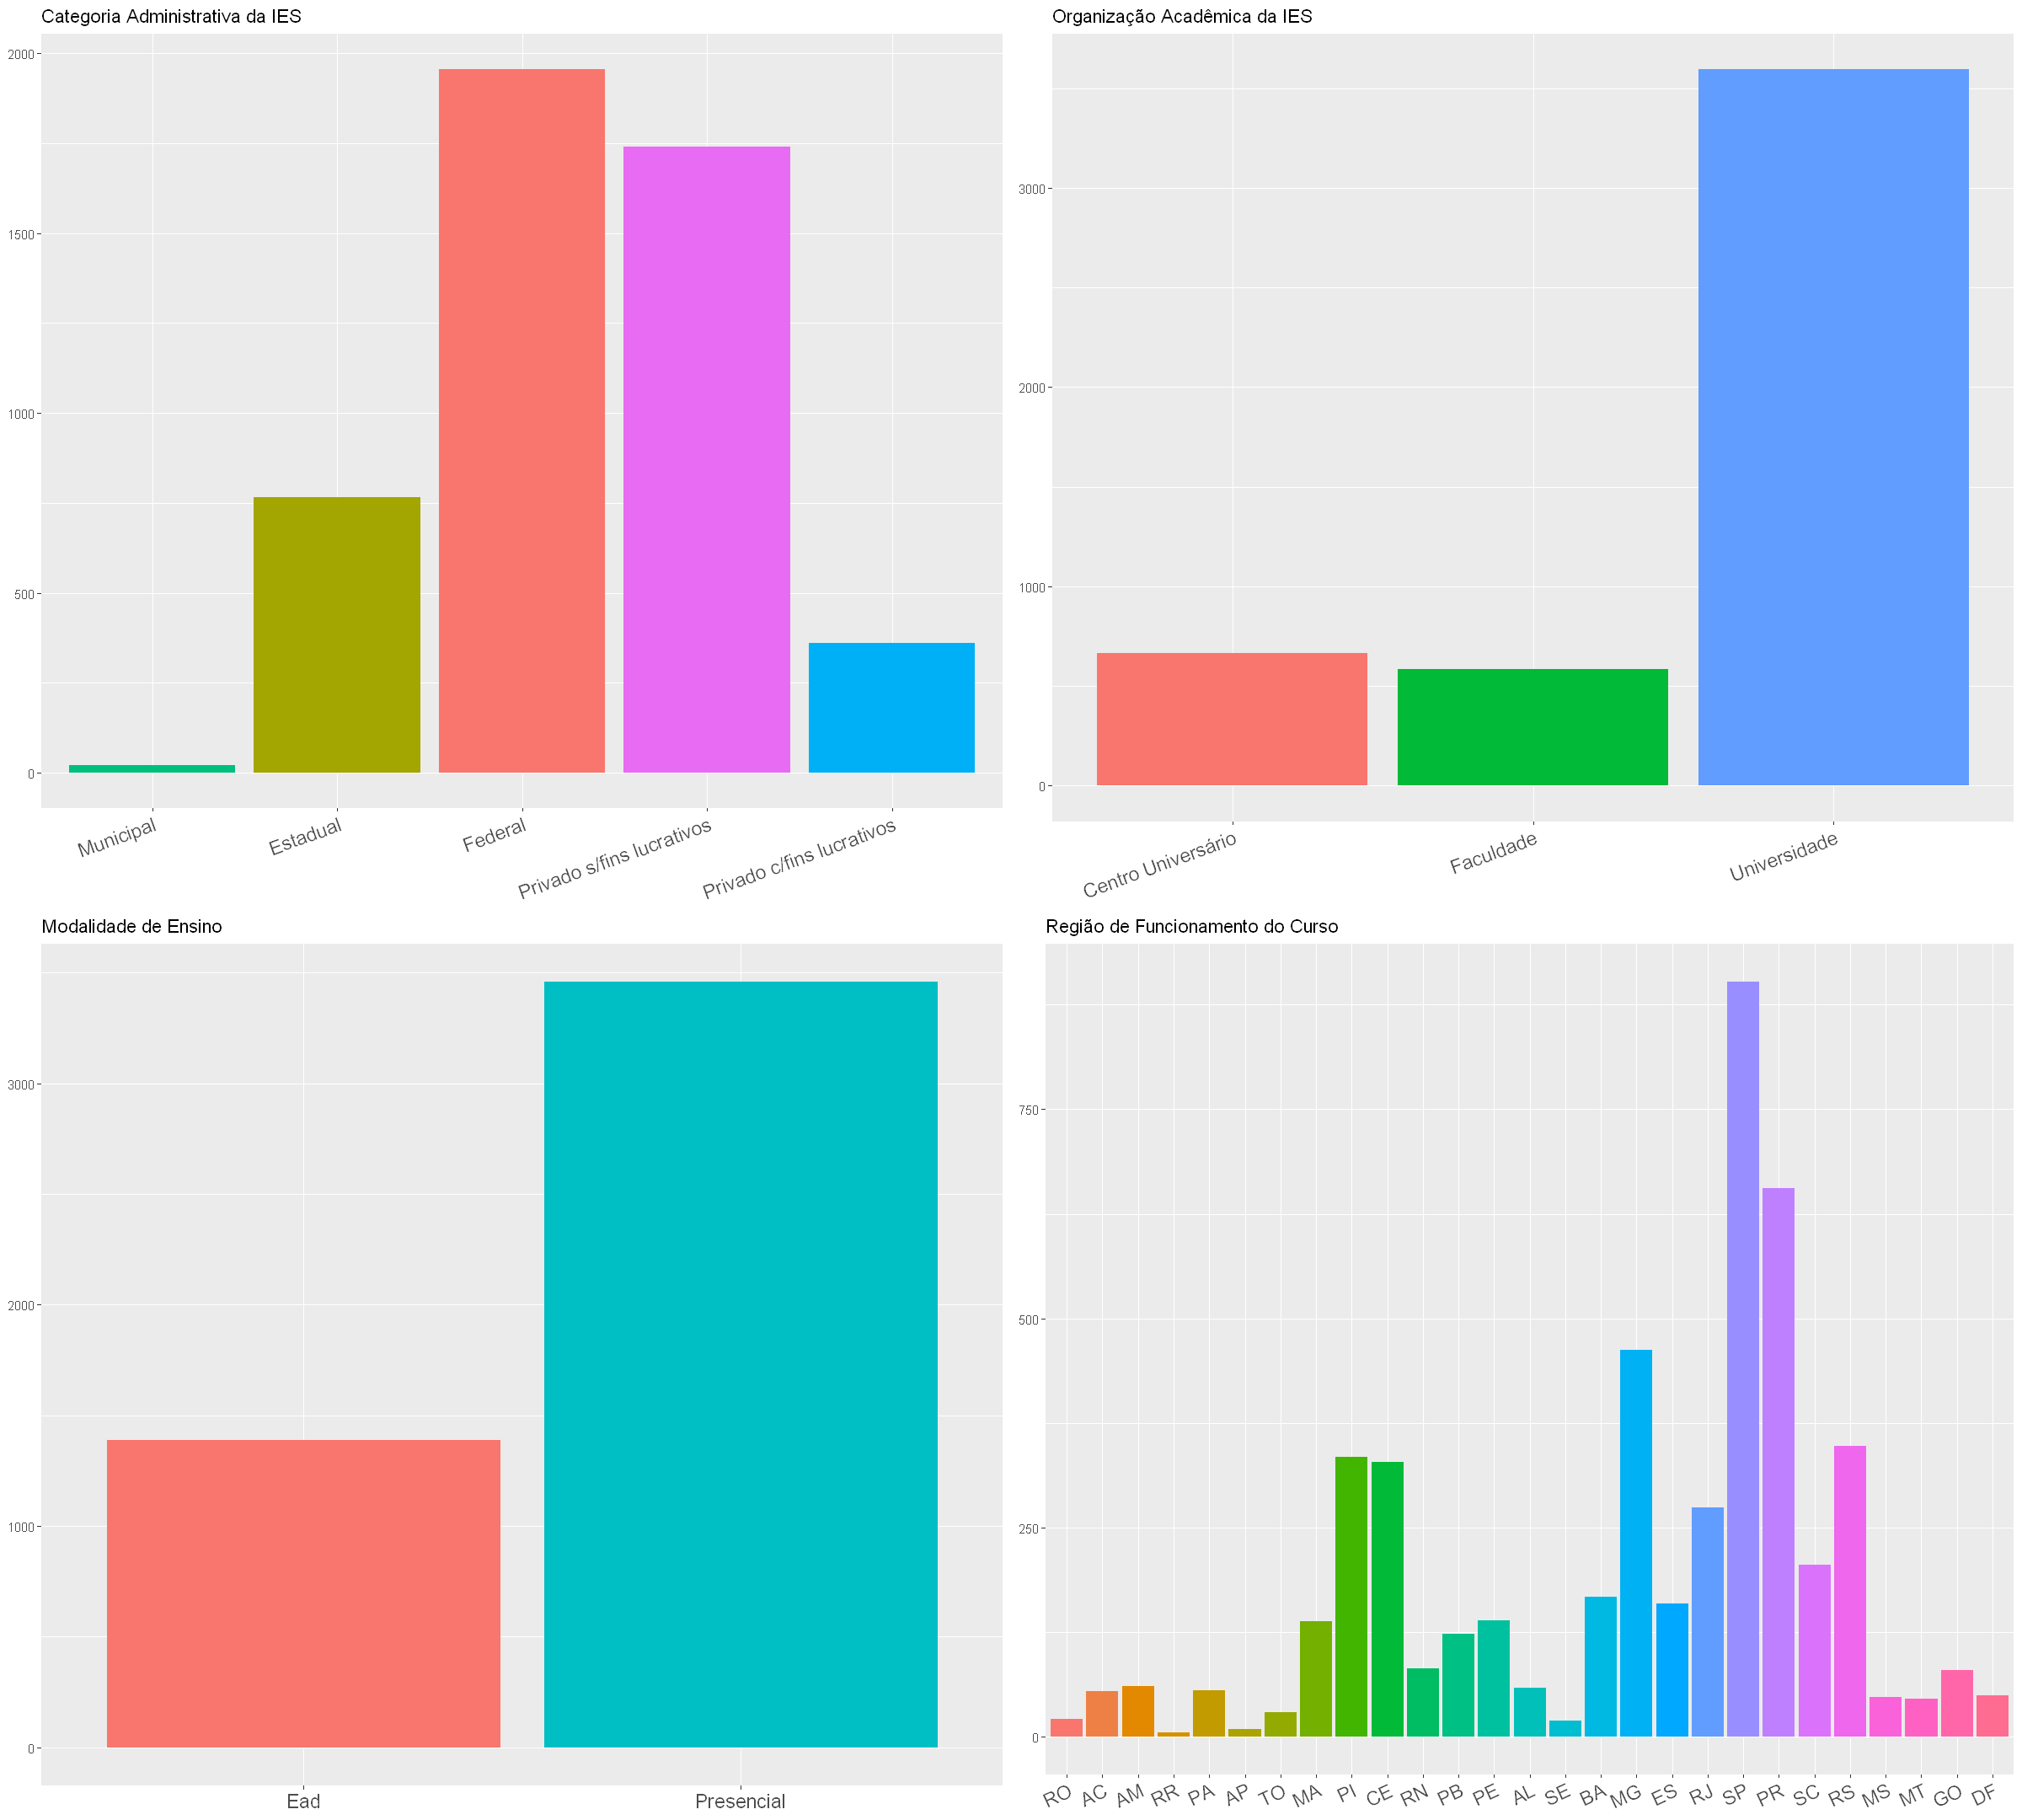

In [28]:
grid.arrange(info_fil1, info_fil2, info_fil3, info_fil4)

### 3.2 INFORMAÇÕES DO ESTUDANTE

In [29]:
idade<- df_enade_fil %>%
  ggplot(aes(as.numeric(NU_IDADE))) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  ggtitle("Histograma da Idade dos Participantes") +
  labs(x = NULL, y=NULL, title = "Idade dos Participantes") +
  scale_x_continuous(breaks = seq(min(df_enade$NU_IDADE), max(df_enade$NU_IDADE), by=5)) +
  theme(axis.text.x = element_text(size = 14))


In [30]:
sexo<- df_enade_fil %>%
  ggplot(aes(TP_SEXO, fill = TP_SEXO)) +
  geom_bar(show.legend = F) +
  labs(x = NULL, y=NULL, title = "Sexo do Participante") +
  theme(axis.text.x = element_text(size = 14))

In [31]:
ano_fim<- df_enade_fil %>%
  ggplot(aes(as.numeric(ANO_FIM_EM))) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x = NULL, y=NULL, title = "Ano de Conclusão do Ensino Médio") +
  scale_x_continuous(breaks = seq(min(df_enade$ANO_FIM_EM), max(df_enade$ANO_FIM_EM), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [32]:
ano_grad<- df_enade_fil %>%
  ggplot(aes(as.numeric(ANO_IN_GRAD))) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x =NULL, y=NULL, title = "Ano de Início da Graduação") +
  scale_x_continuous(breaks = seq(min(df_enade$ANO_IN_GRAD), max(df_enade$ANO_IN_GRAD), by=5)) +
  theme(axis.text.x = element_text(size = 14))

In [33]:
turno_grad<- df_enade_fil %>%
  ggplot(aes(CO_TURNO_GRADUACAO, fill = CO_TURNO_GRADUACAO)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x= NULL, y=NULL, title="Turno da Graduação") +
  scale_x_discrete(limits = c("Matutino", "Vespertino", "Noturno", "Integral")) 

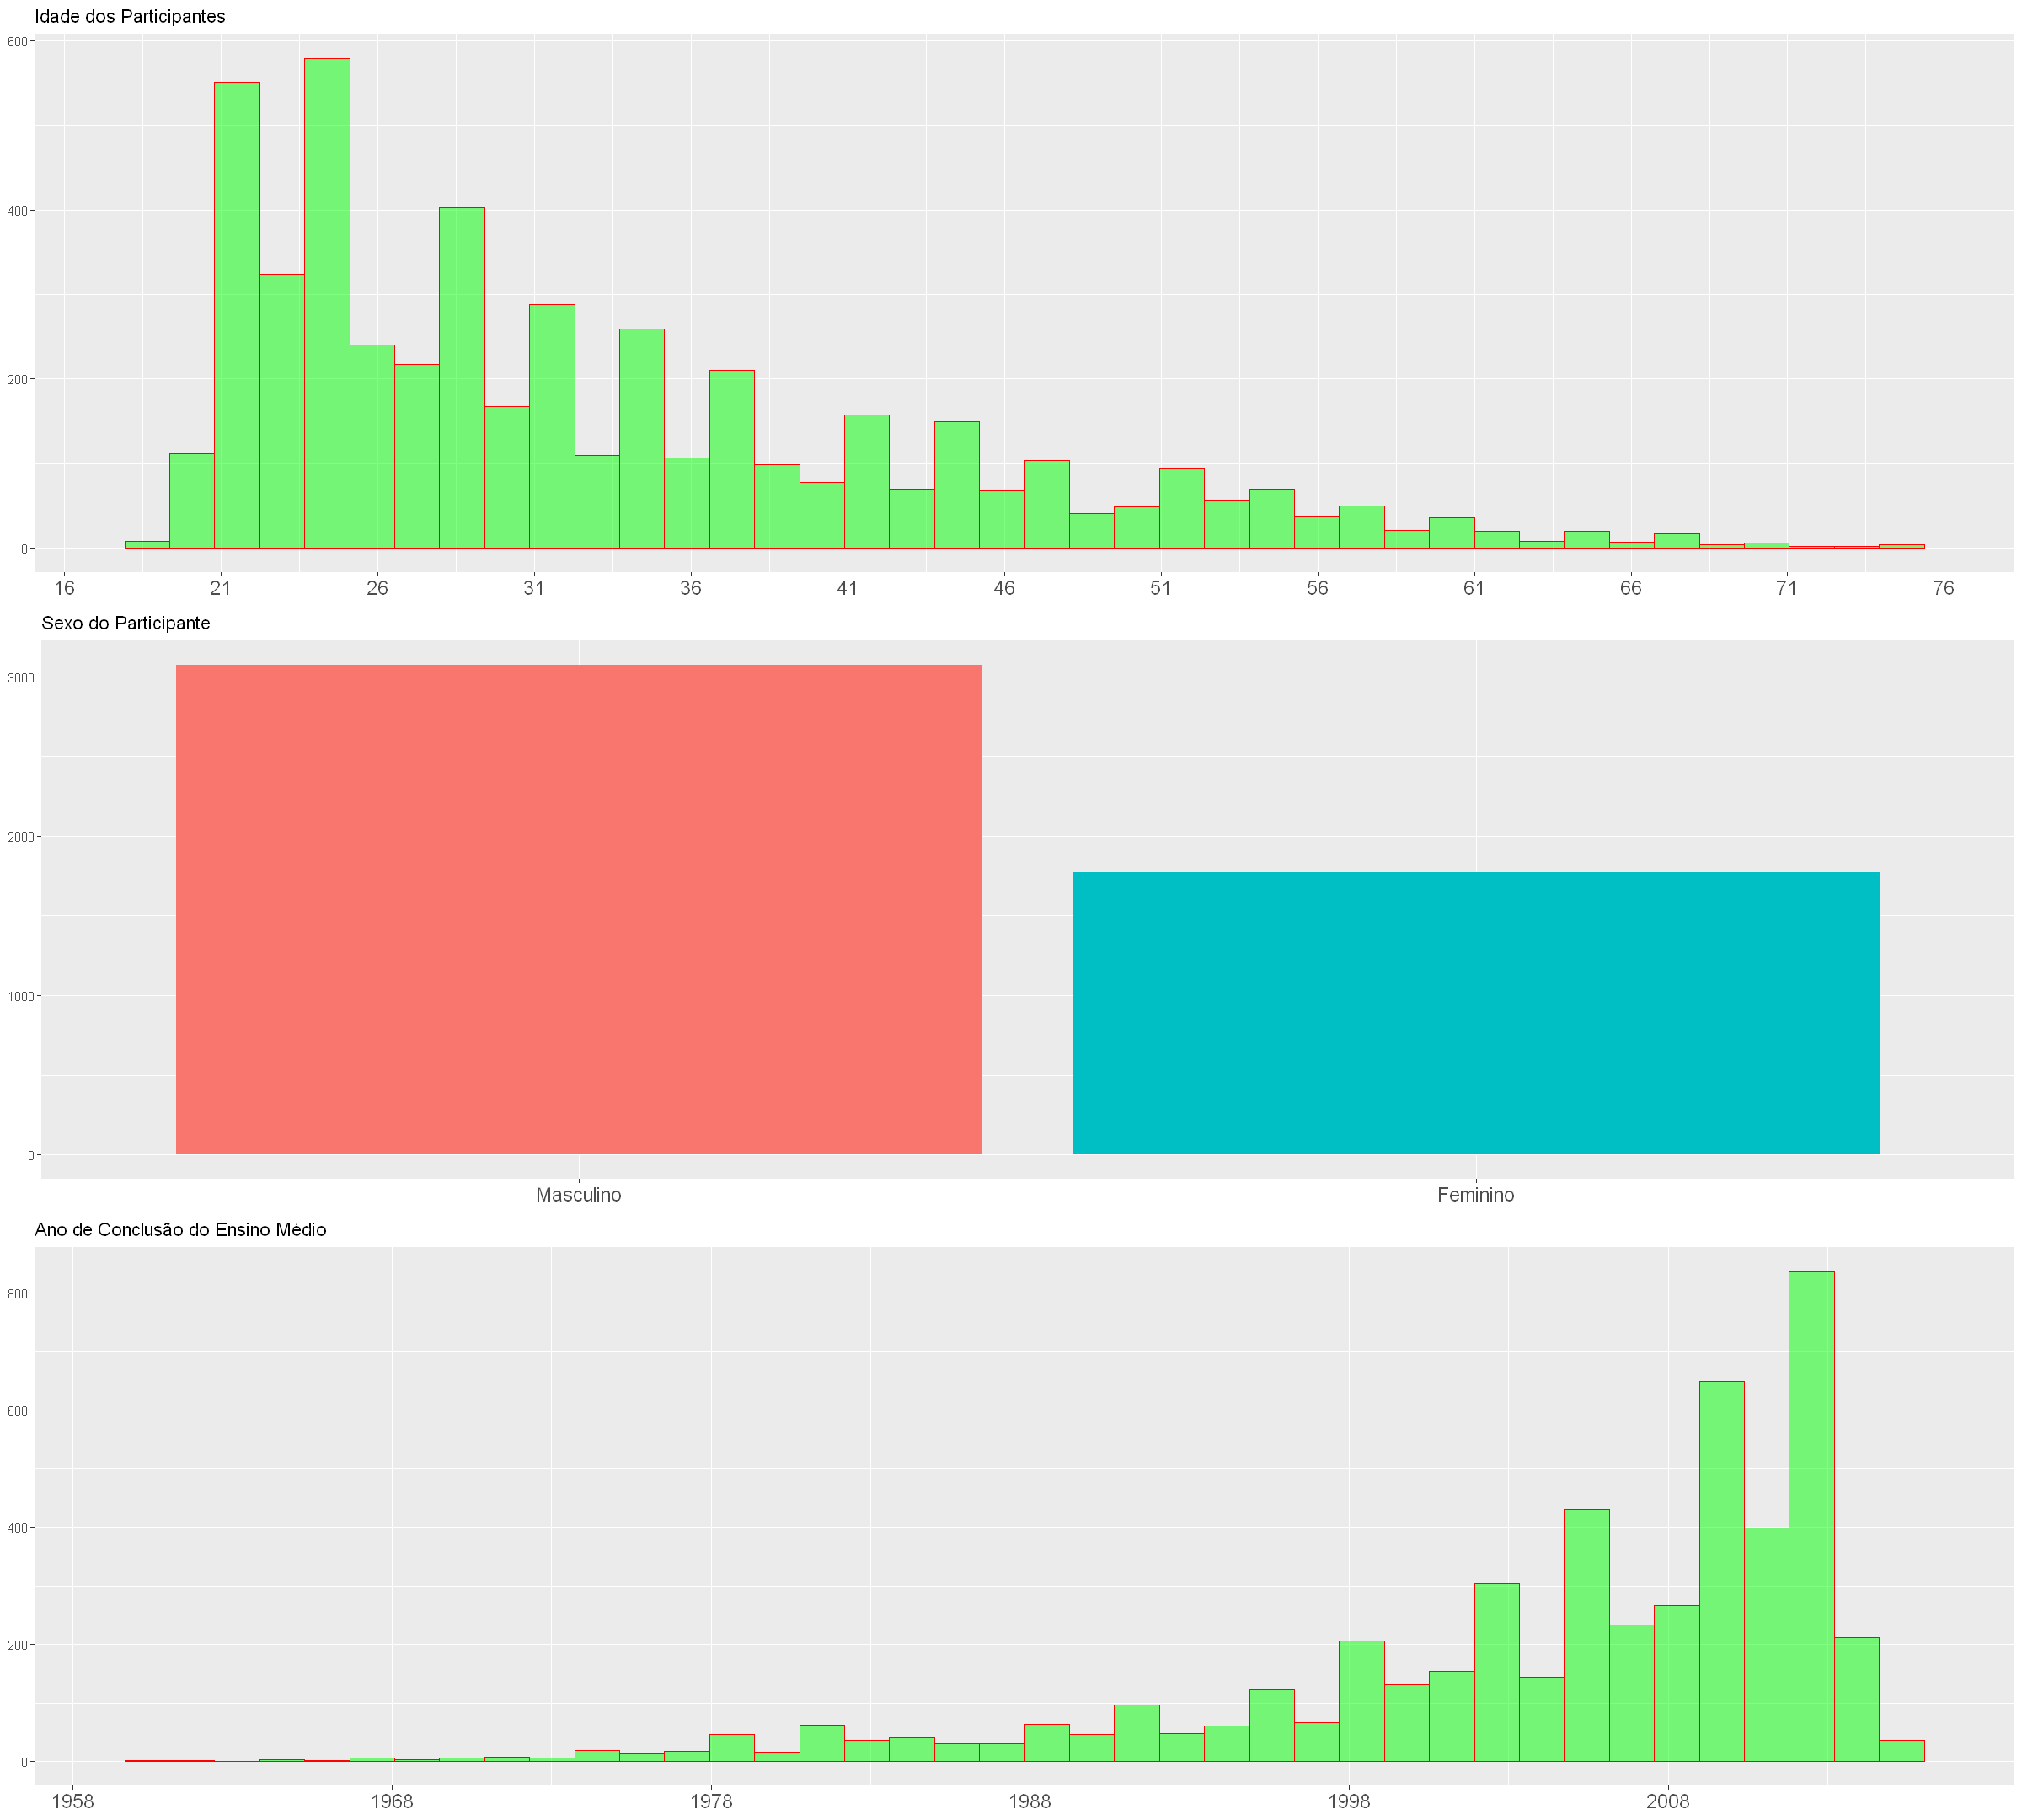

In [34]:
# Gráficos das Informações do Estudante
grid.arrange(idade, sexo, ano_fim)


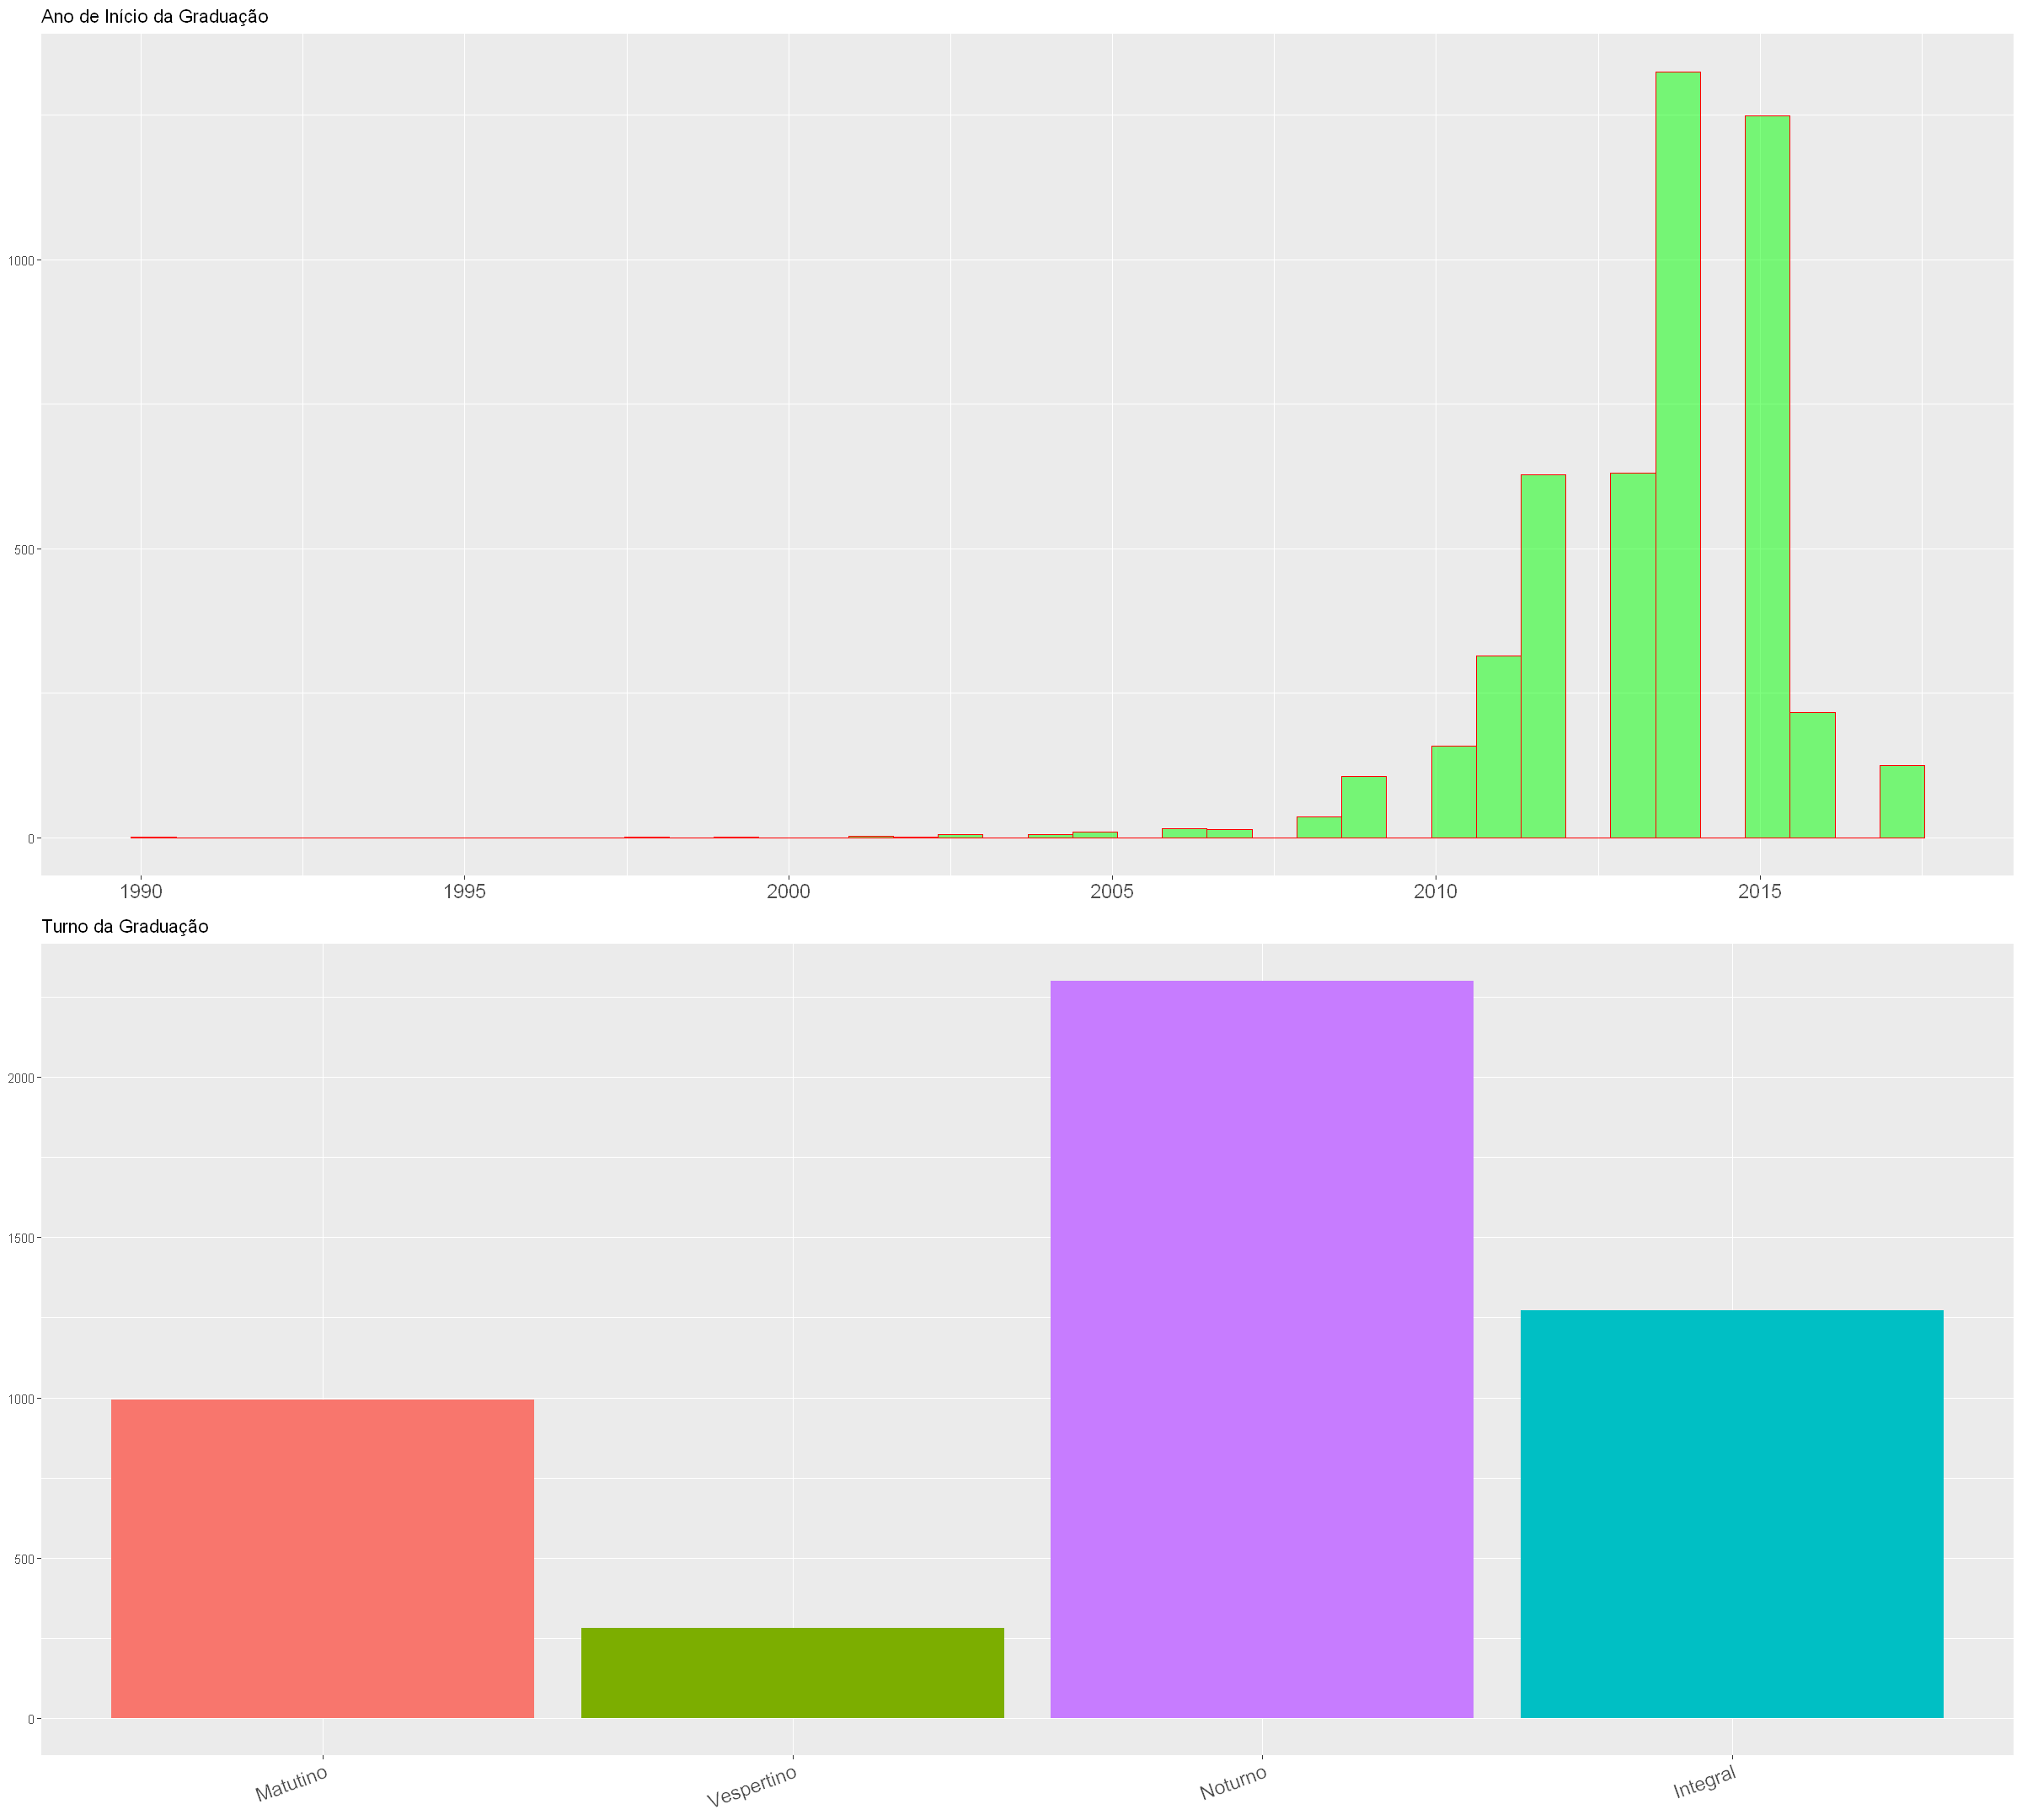

In [35]:
# Gráficos das Informações do Estudante
grid.arrange(ano_grad, turno_grad)

### 3.3 NOTAS DOS ESTUDANTES

In [36]:
# Estatística descritiva das notas das provas
df_enade_fil %>%
  select(NT_GER, NT_FG, NT_OBJ_FG, NT_DIS_FG,
         NT_CE, NT_OBJ_CE, NT_DIS_CE) %>%
skim_without_charts() %>%
as.tibble()

skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
numeric,NT_GER,0,1,45.77920,15.76937,0,34.1,45.8,57.4,93.5
numeric,NT_FG,0,1,52.52887,17.62720,0,41.1,54.0,64.9,98.4
numeric,NT_OBJ_FG,0,1,50.44624,20.41780,0,37.5,50.0,62.5,100.0
numeric,NT_DIS_FG,0,1,55.65281,24.68360,0,44.0,61.5,73.5,99.0
numeric,NT_CE,0,1,43.51201,17.42296,0,30.1,43.4,56.3,93.6
numeric,NT_OBJ_CE,0,1,46.66773,18.30912,0,33.3,47.6,60.9,100.0
numeric,NT_DIS_CE,0,1,25.62352,23.06296,0,5.0,21.7,41.7,100.0


In [37]:
nota_fil1<- df_enade_fil %>%
  ggplot(aes(NT_GER)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x=NULL, y=NULL, title = "Nota Bruta da Prova") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_GER), max(df_enade$NT_GER), by=10))+
  theme(axis.text.x = element_text(size = 14))

In [38]:
nota_fil2<- df_enade_fil %>%
  ggplot(aes(NT_FG)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x=NULL, y=NULL, title ="Nota Bruta na Formação Geral") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_FG), max(df_enade$NT_FG), by=10))+
  theme(axis.text.x = element_text(size = 14))

In [39]:
nota_fil3<- df_enade_fil %>%
  ggplot(aes(NT_OBJ_FG)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 15, boundary = 5) +
  labs(x=NULL, y=NULL, title="Nota Bruta Parte Objetiva da Formação Geral") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_OBJ_FG), max(df_enade$NT_OBJ_FG), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [40]:
nota_fil4<- df_enade_fil %>%
  ggplot(aes(NT_DIS_FG)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x=NULL, y=NULL, title="Nota Bruta Parte Discursiva da Formação Geral") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_DIS_FG), max(df_enade$NT_DIS_FG), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [41]:
nota_fil5<- df_enade_fil %>%
  ggplot(aes(NT_CE)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x=NULL, y=NULL, title="Nota Bruta no Componente Específico") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_CE), max(df_enade$NT_CE), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [42]:
nota_fil6<- df_enade_fil %>%
  ggplot(aes(NT_OBJ_CE)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 40, boundary = 5) +
  labs(x=NULL, y=NULL, title="Nota Bruta Parte Obj. do Componente Específico") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_OBJ_CE), max(df_enade$NT_OBJ_CE), by=10))+
  theme(axis.text.x = element_text(size = 14))

In [43]:
nota_fil7<- df_enade_fil %>%
  ggplot(aes(NT_DIS_CE)) +
  geom_histogram(fill = "green", color = "red", alpha = 0.5, bins = 35, boundary = 5) +
  labs(x=NULL, y=NULL,title="Nota bruta Parte Discursiva do Componente Específico") +
  scale_x_continuous(breaks = seq(min(df_enade$NT_DIS_CE), max(df_enade$NT_DIS_CE), by=10))+
  theme(axis.text.x = element_text(size = 14))

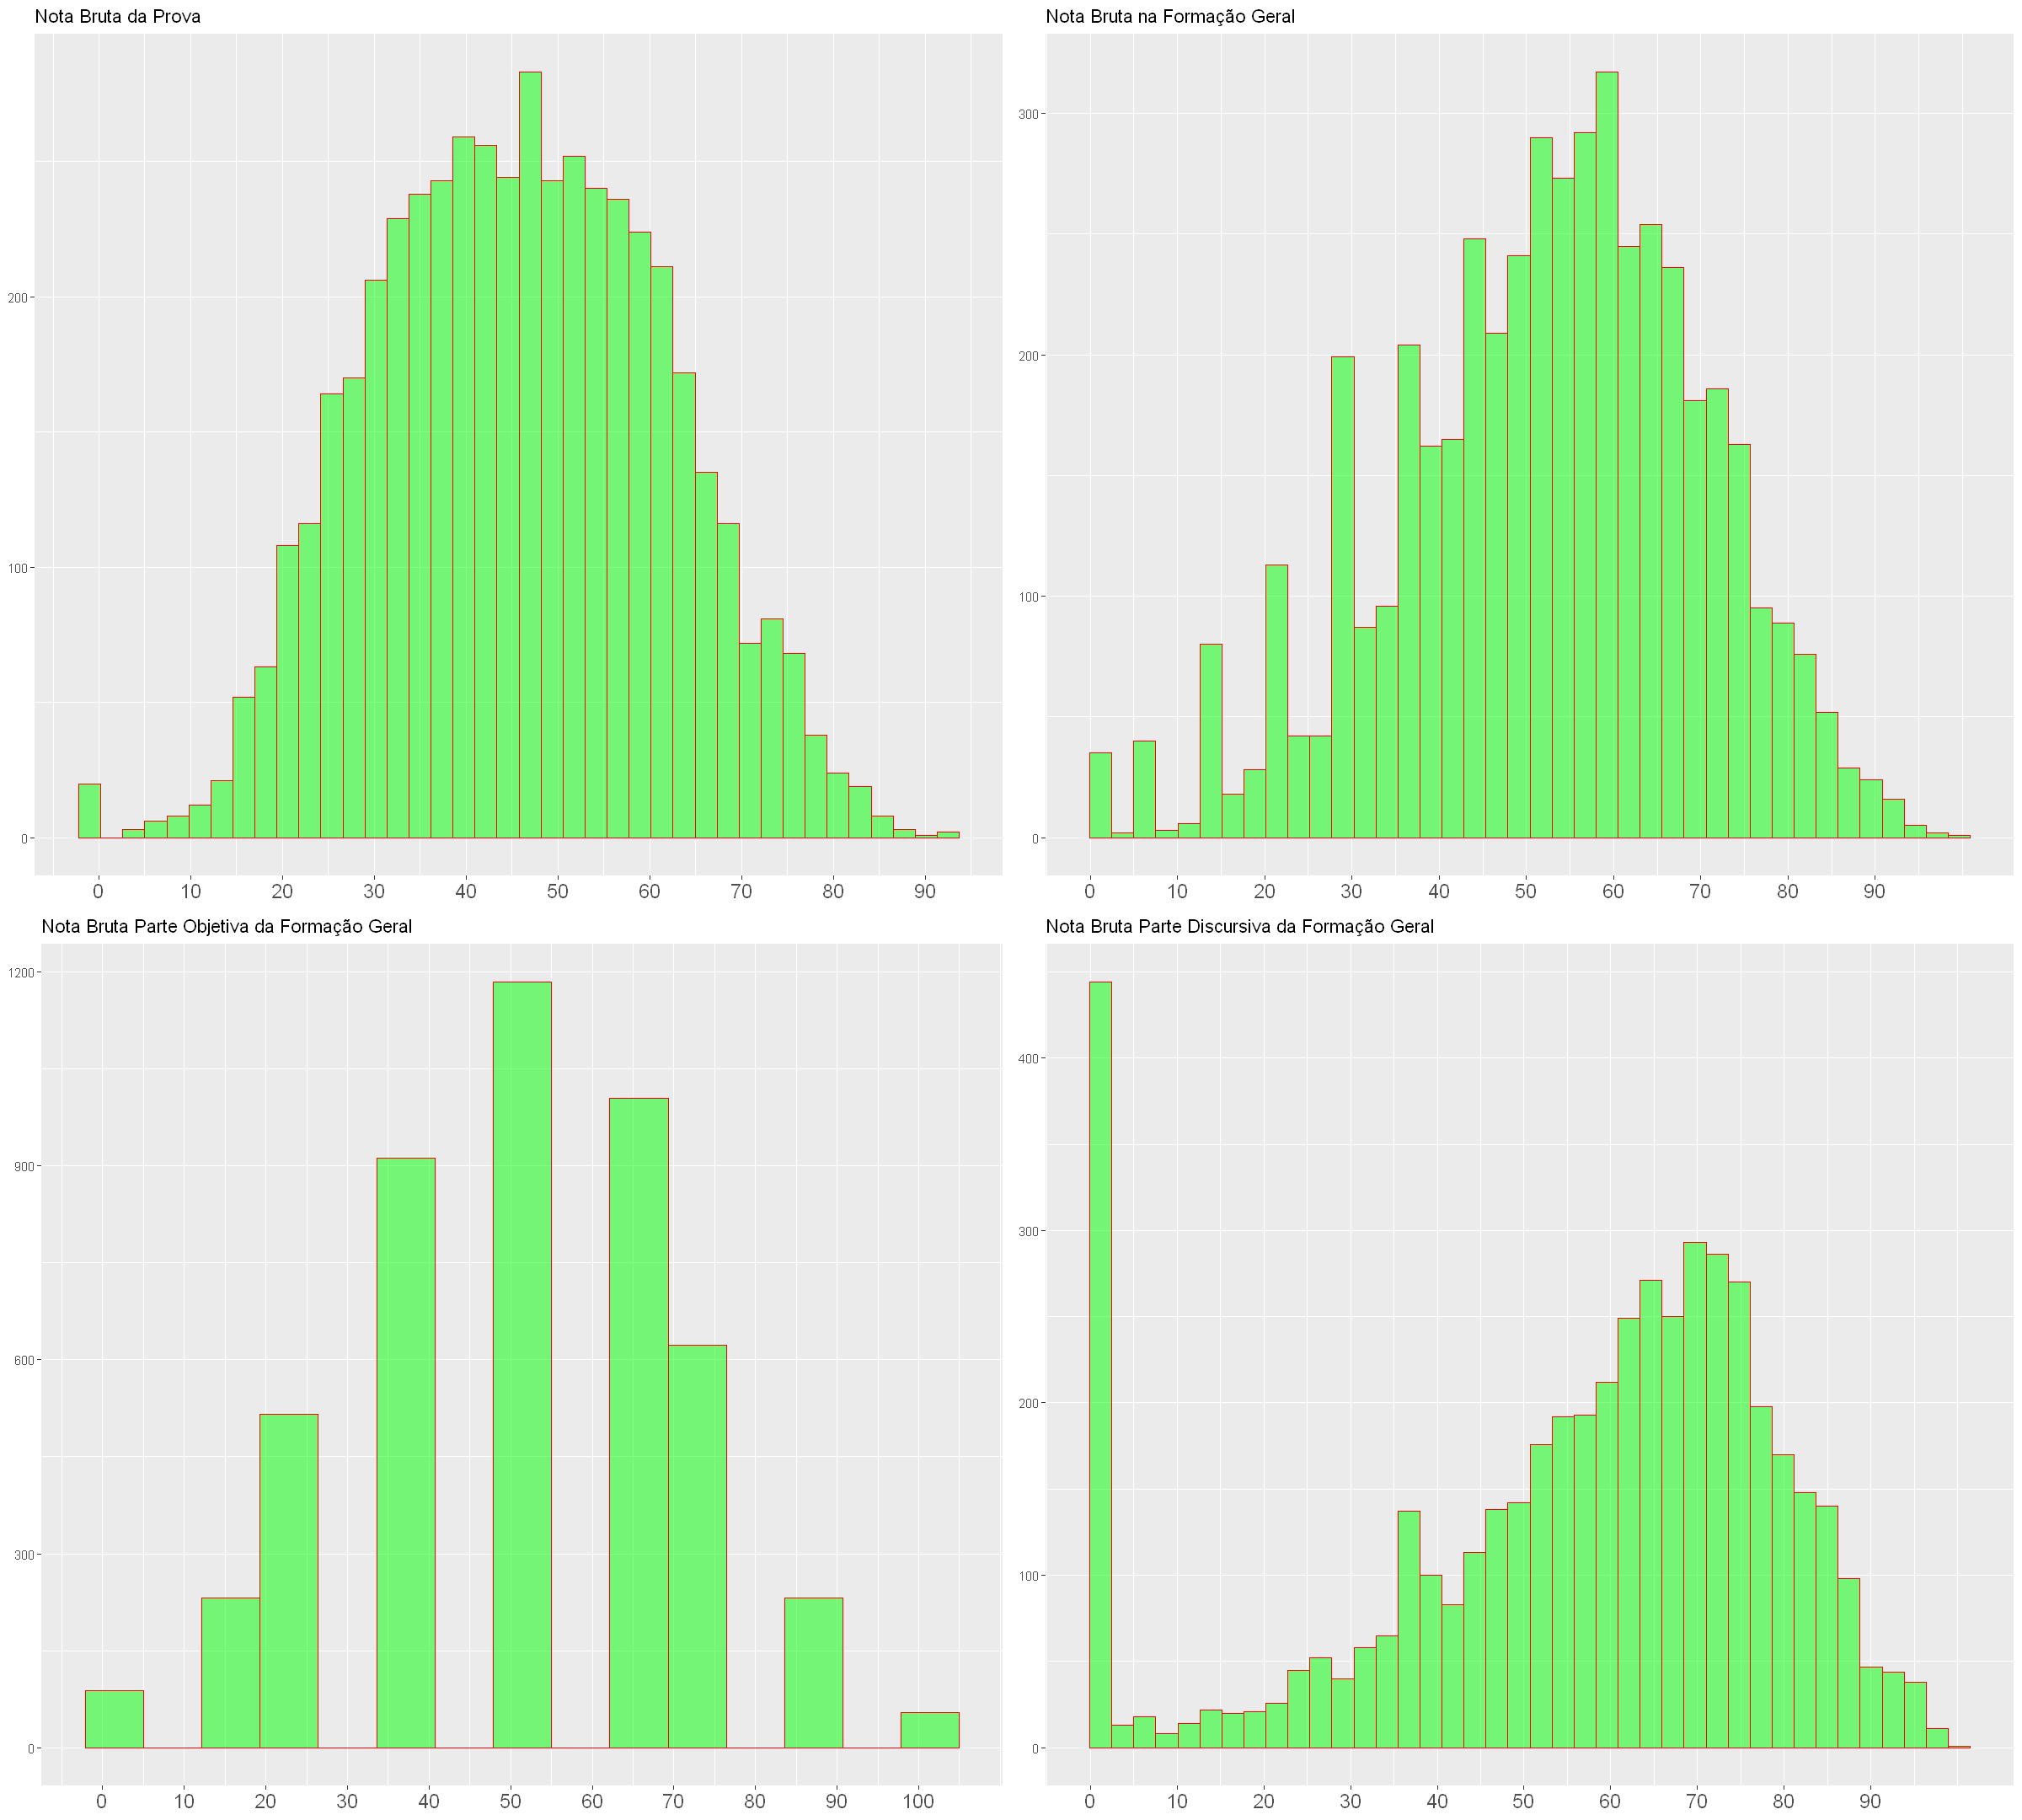

In [44]:
# Gráfico de notas 
grid.arrange(nota_fil1, nota_fil2, nota_fil3, nota_fil4)

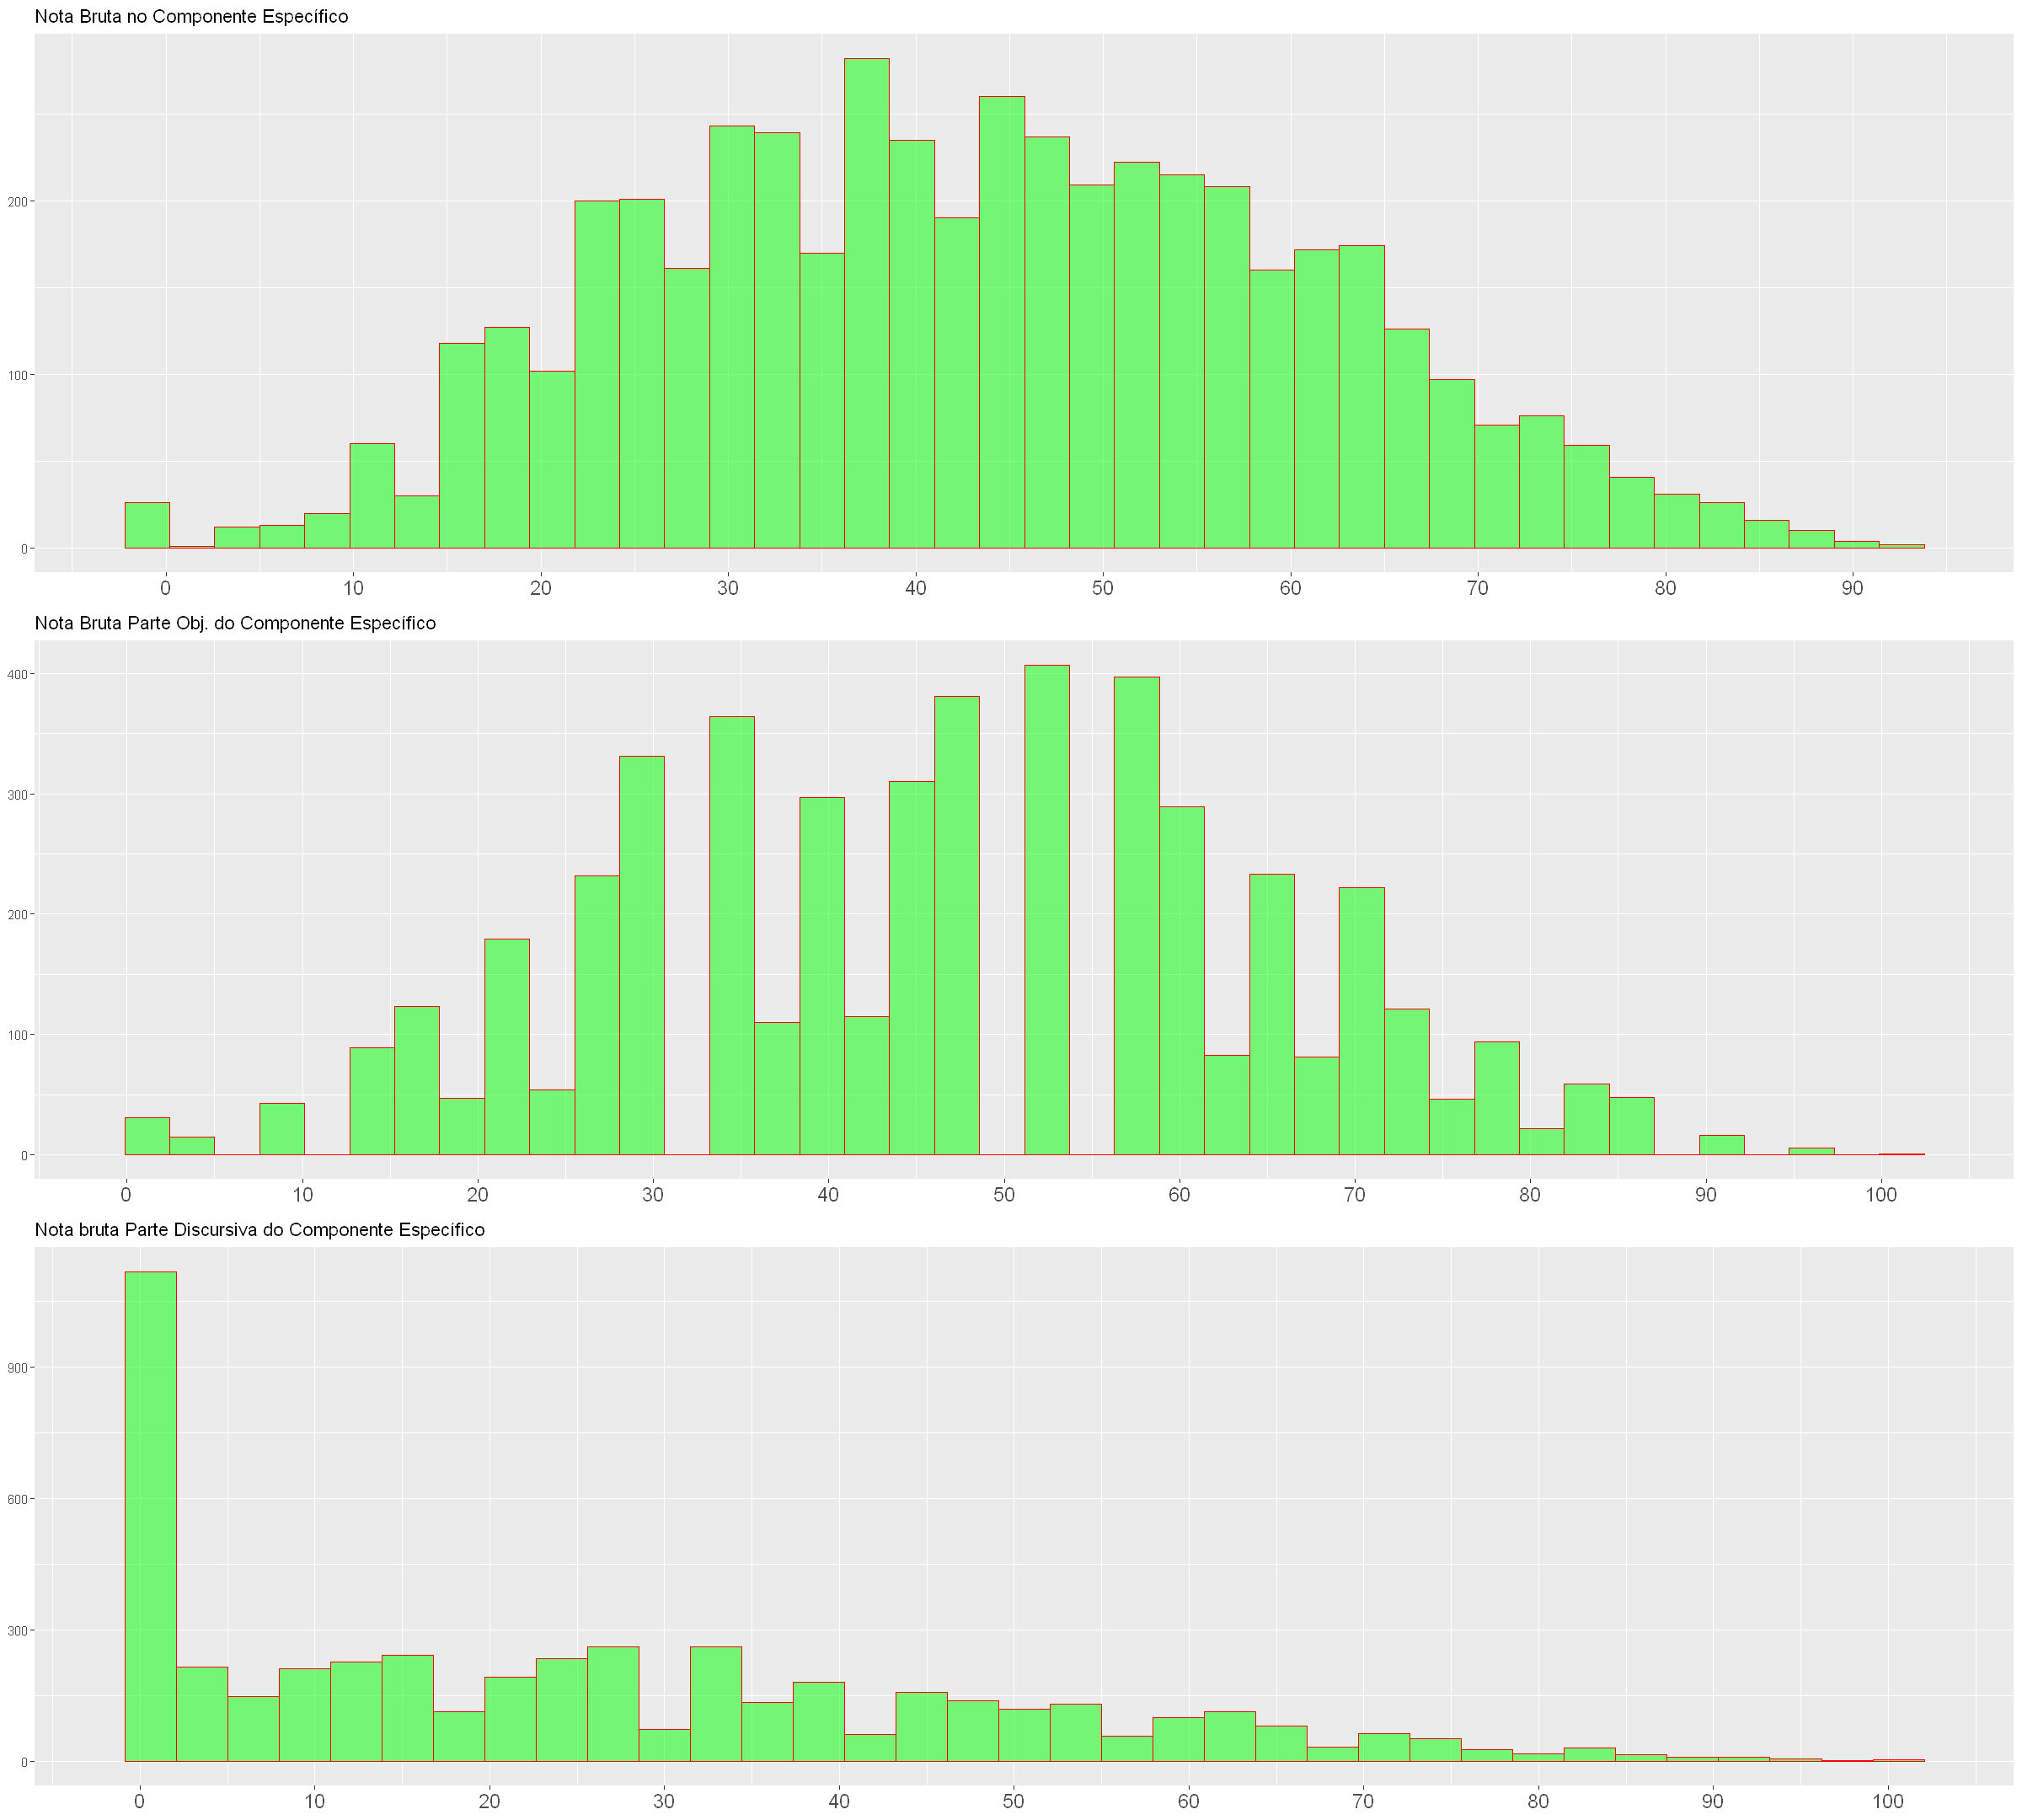

In [45]:
# Gráfico de notas 
grid.arrange(nota_fil5, nota_fil6, nota_fil7)

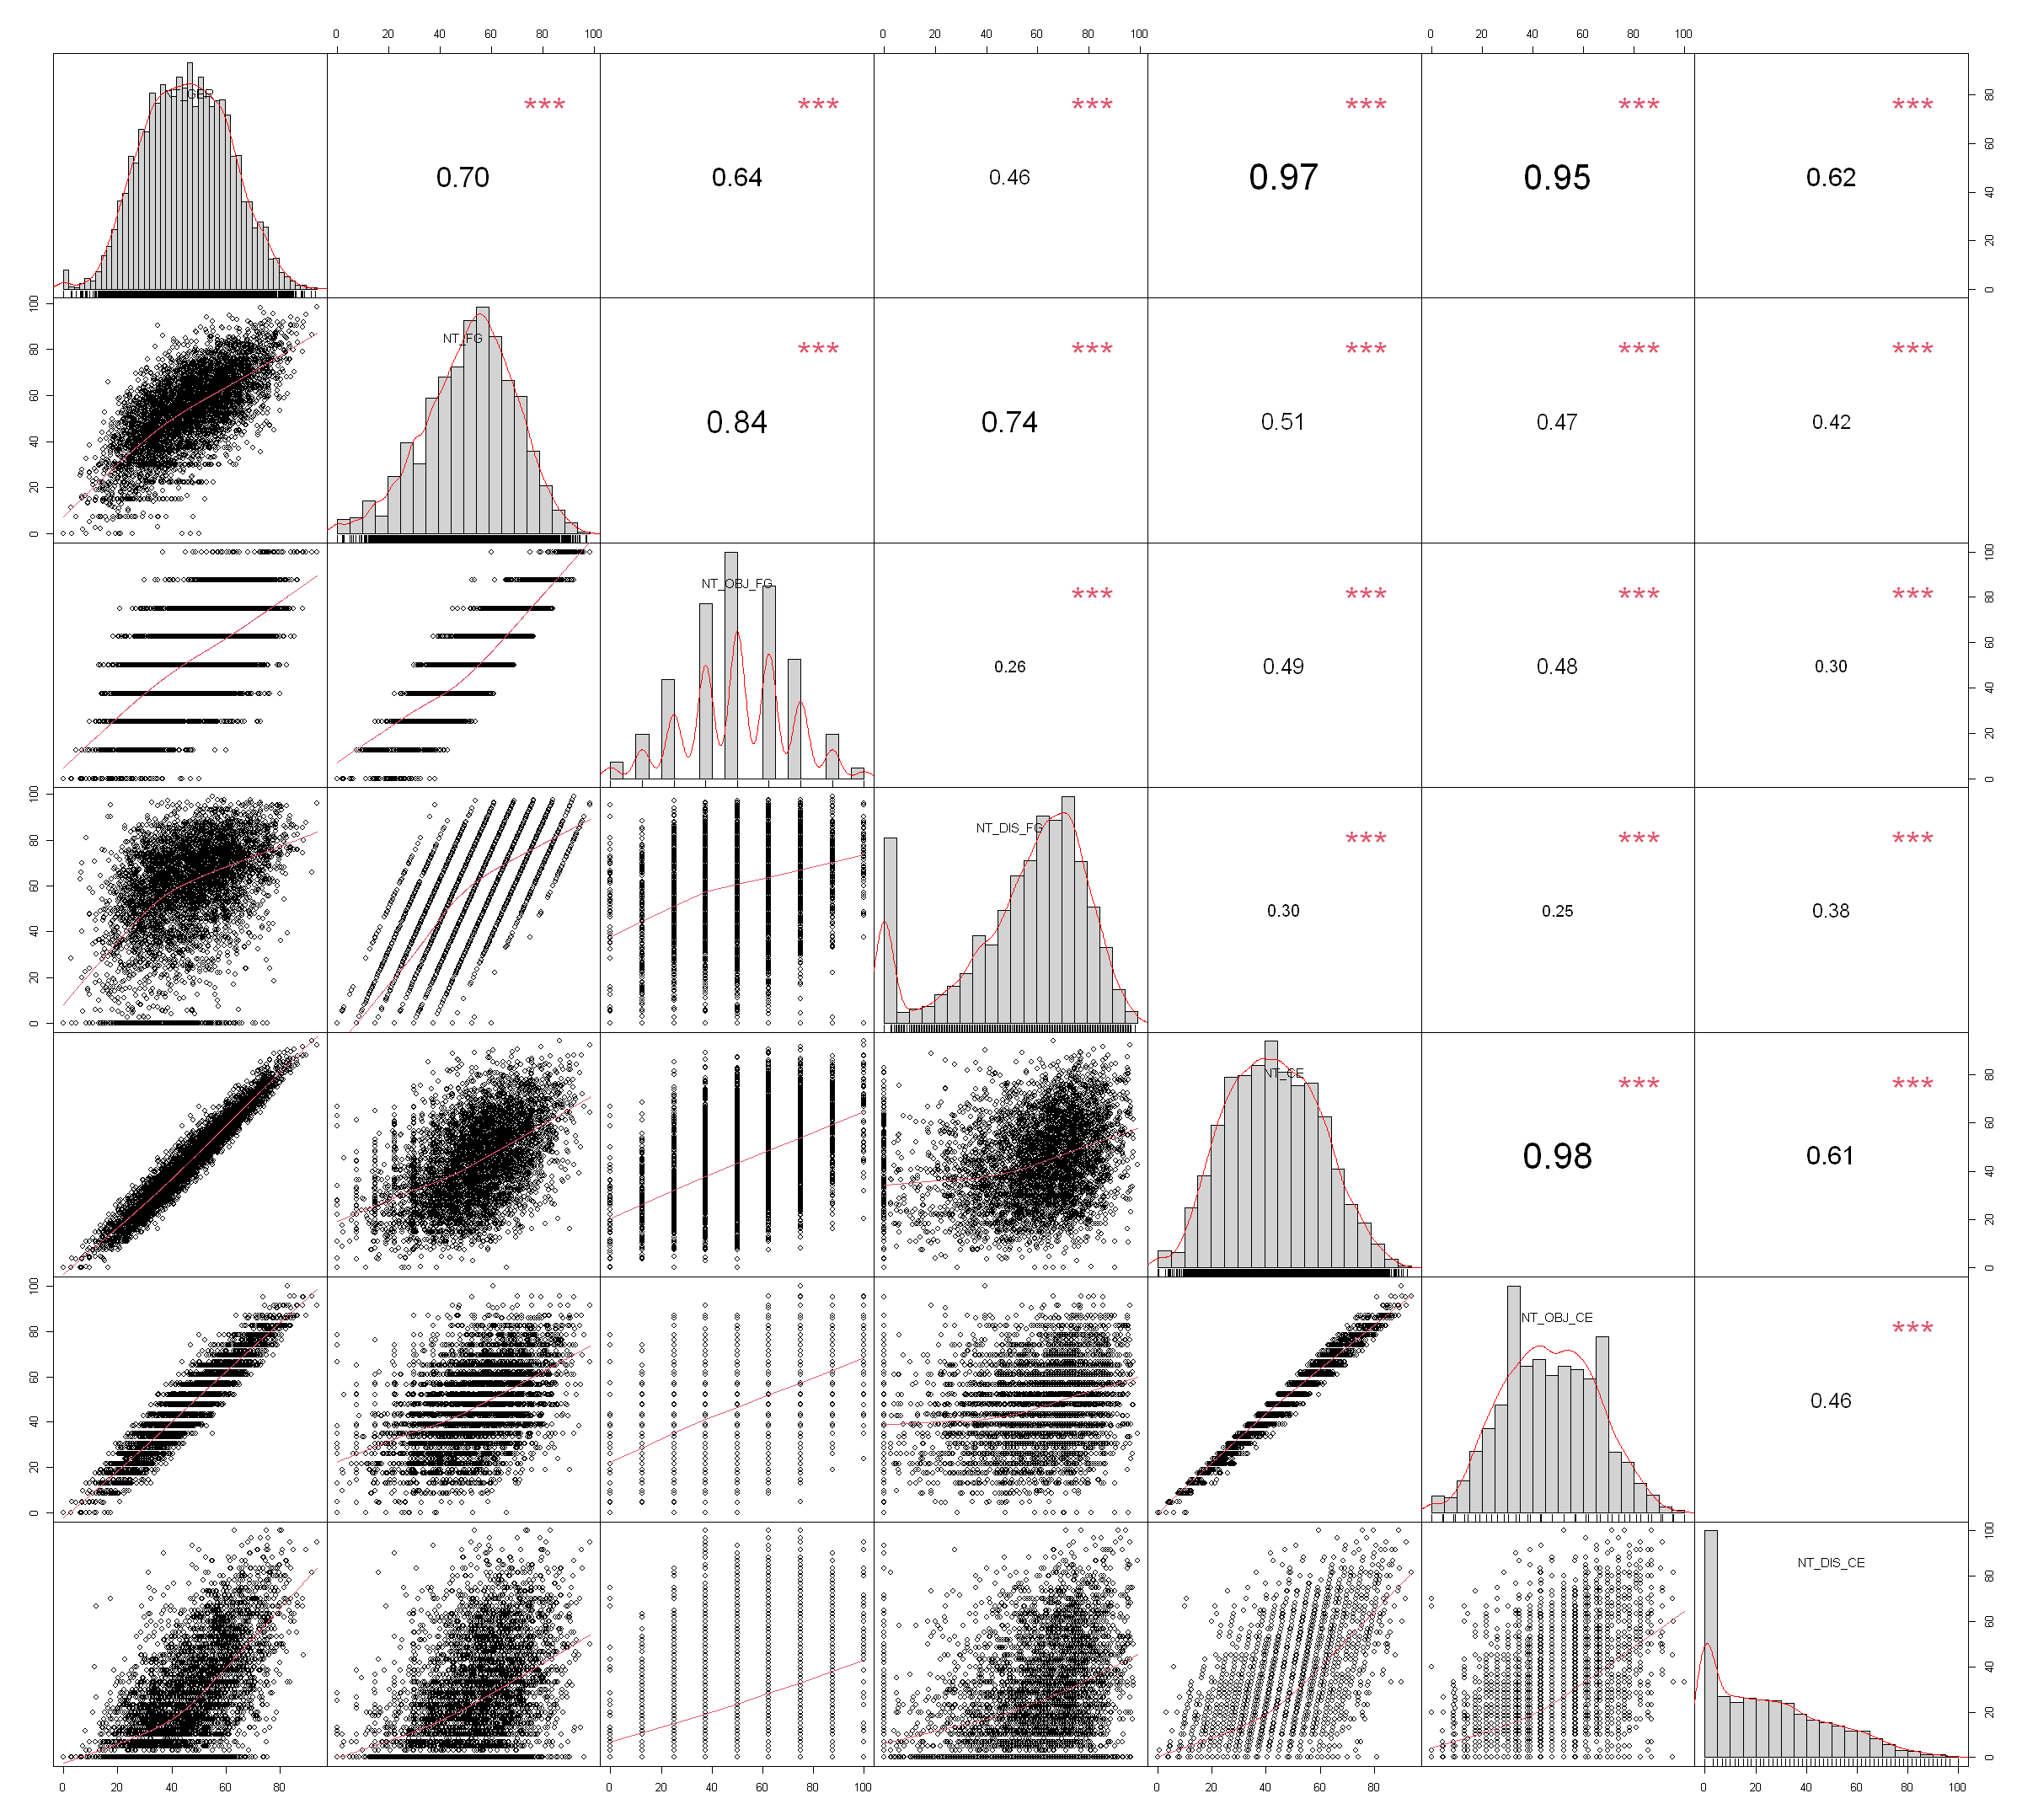

In [46]:
# Matriz de correlação 
notas<- df_enade_fil %>%
  select(NT_GER, NT_FG, NT_OBJ_FG, NT_DIS_FG,
         NT_CE, NT_OBJ_CE, NT_DIS_CE) %>%
  chart.Correlation()

### 3.4 PERCEPÇÃO DA PROVA

In [47]:
percep1<- df_enade_fil %>%
  ggplot(aes(CO_RS_I1, fill = CO_RS_I1)) +
  geom_bar(show.legend=F) +
  labs(x=NULL,y=NULL,title="Grau de Dificuldade da Formação Geral")+
  theme(axis.text.x = element_text(size = 14))

In [48]:
percep2<- df_enade_fil %>%
  ggplot(aes(CO_RS_I2, fill = CO_RS_I2)) +
  geom_bar(show.legend=F) +
  labs(x=NULL,y=NULL, title="Grau de Dificuldade do Componente Específico")+
  theme(axis.text.x = element_text(size = 14))

In [49]:
percep3<- df_enade_fil %>%
  ggplot(aes(CO_RS_I9, fill = CO_RS_I9)) +
  geom_bar(show.legend=F) +
  labs(x=NULL,y=NULL, title="Tempo Gasto para Conclusão da Prova")+
  theme(axis.text.x = element_text(size = 14))

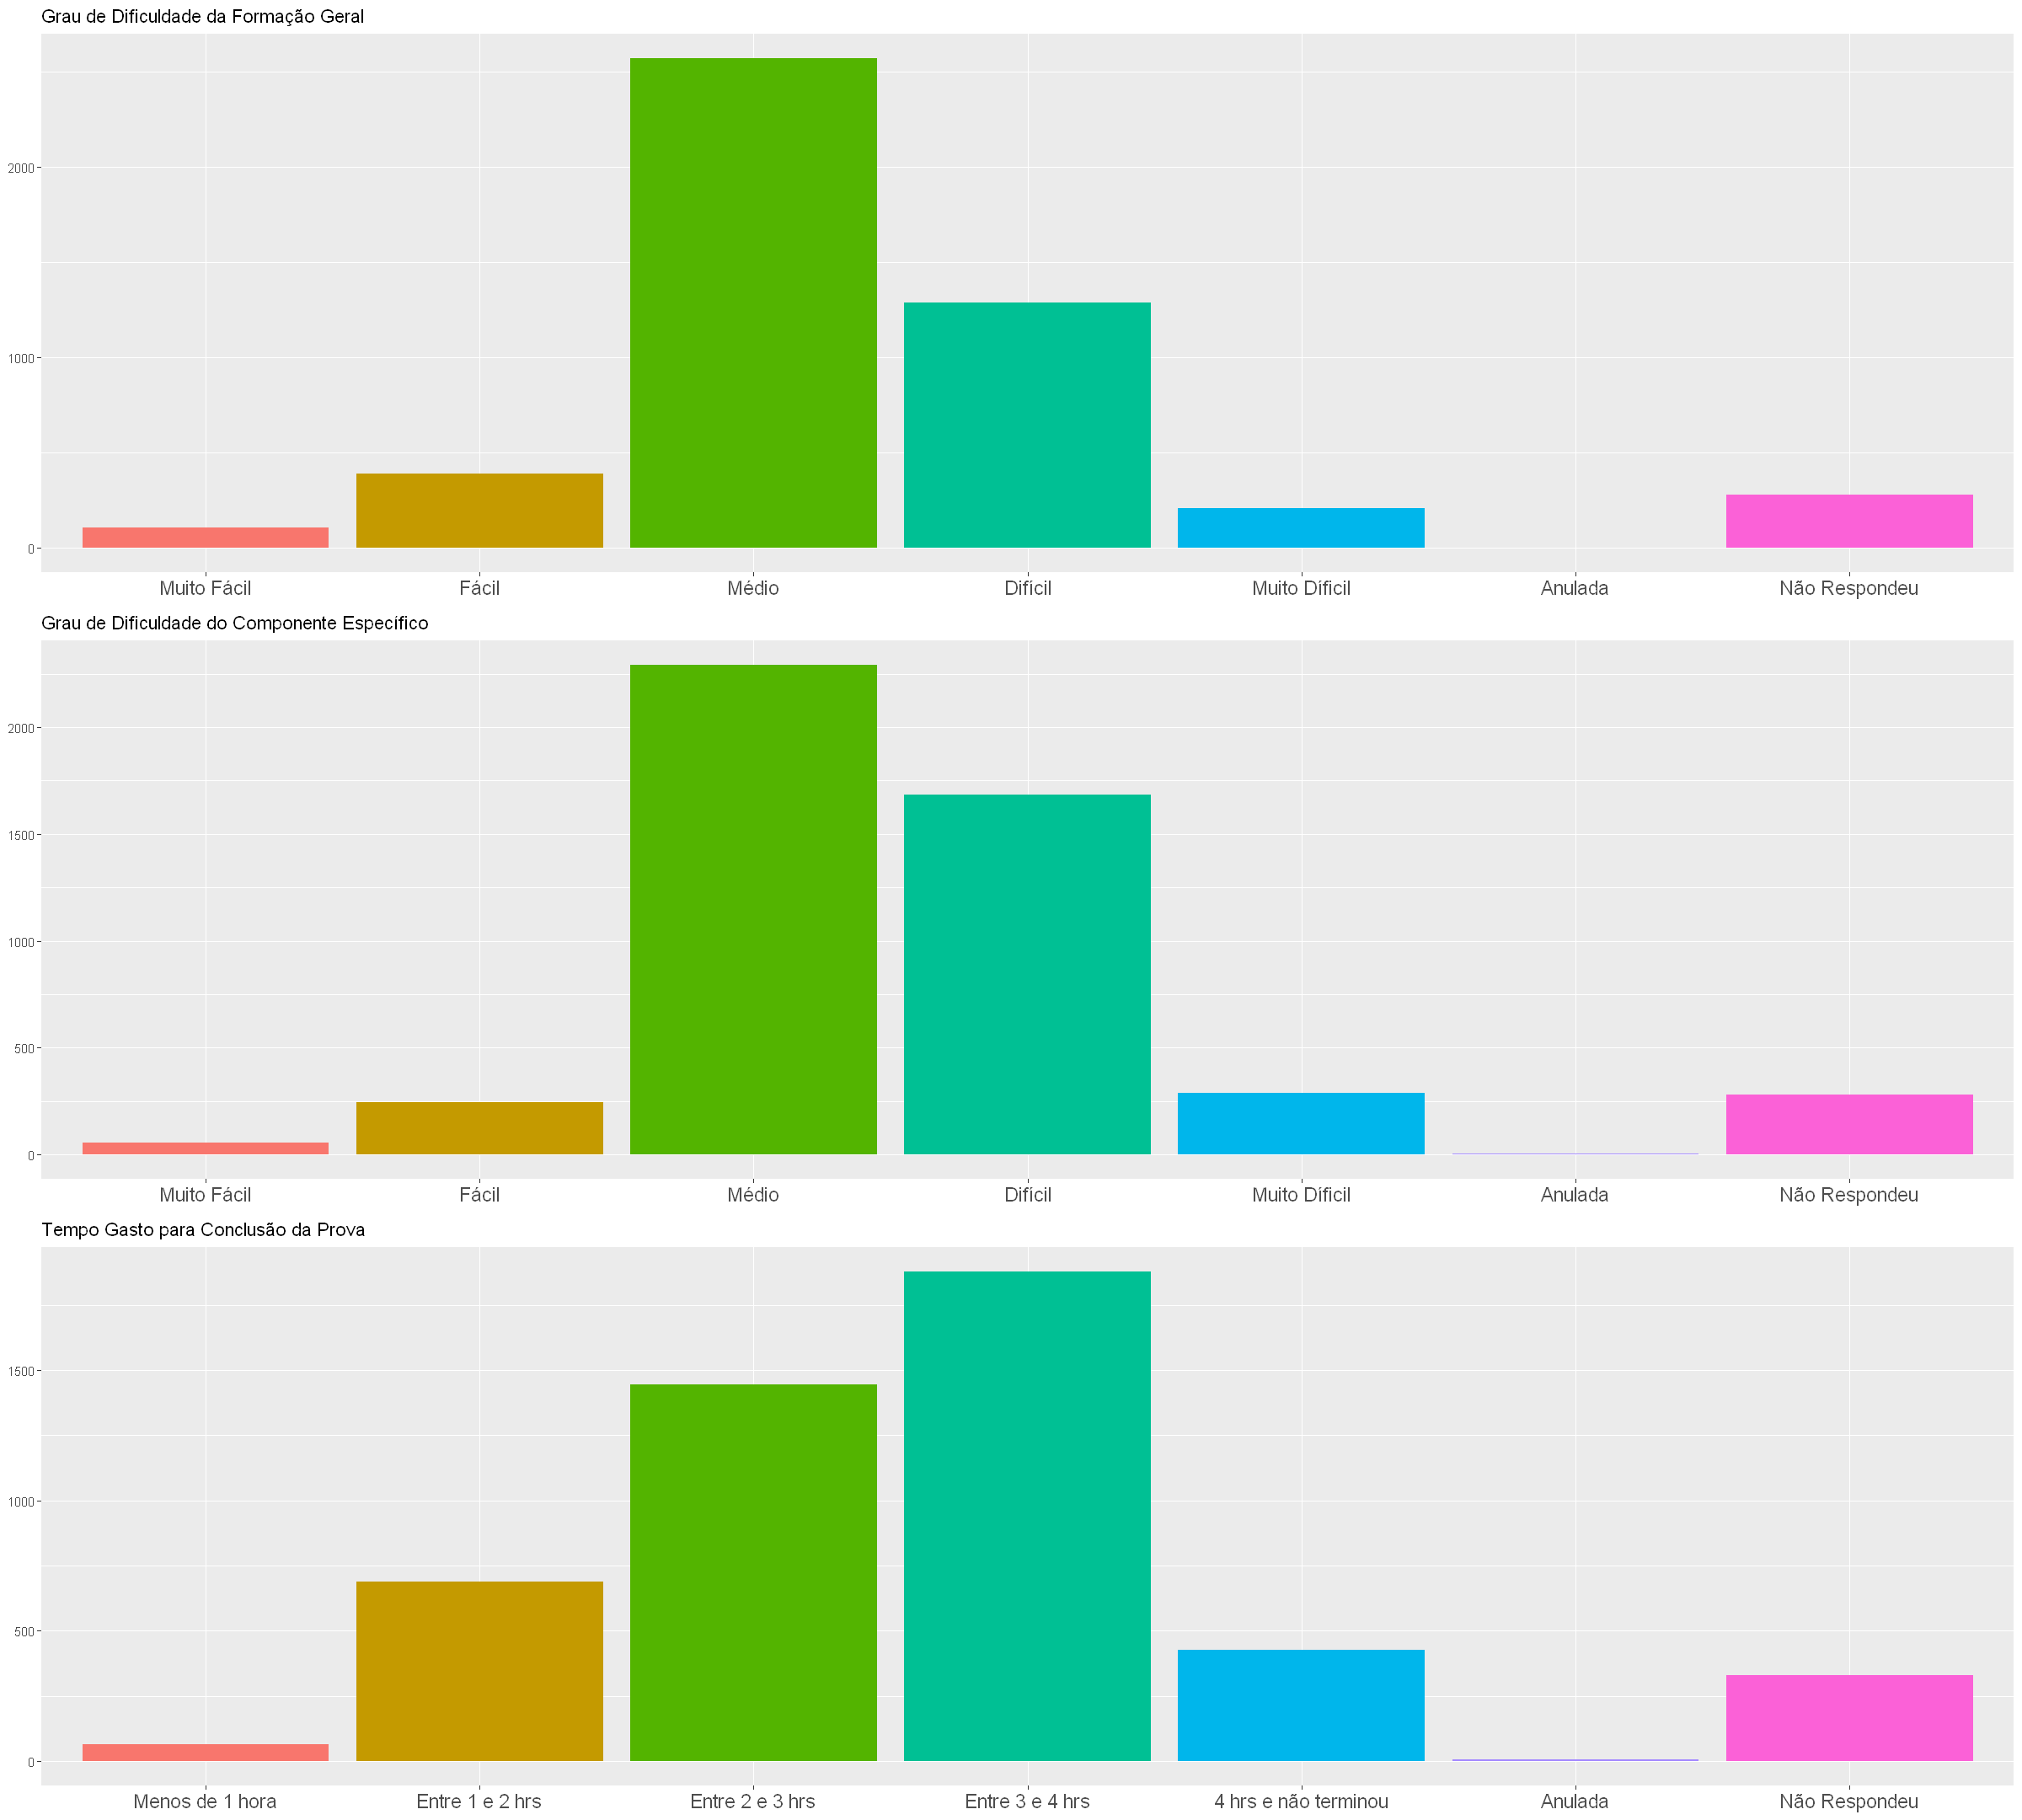

In [50]:
# Gráfico de percepção da prova
grid.arrange(percep1, percep2, percep3)

### 3.5 INFORMAÇÕES SOCIOECONÔMICAS

In [51]:
ques1<- df_enade_fil %>%
  ggplot(aes(QE_I01, fill = QE_I01)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(size=14)) +
  labs(x=NULL,y=NULL,title = "Qual é o seu estado civil?")

In [52]:
ques2<- df_enade_fil %>%
  ggplot(aes(QE_I02, fill = QE_I02)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(size=14)) +
  labs(x=NULL,y=NULL, title = "Qual é a sua cor/raça?")  

In [53]:
ques3<- df_enade_fil %>%
  ggplot(aes(QE_I04, fill = QE_I04)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Até que etapa de escolarização seu pai concluiu?")

In [54]:
ques4<- df_enade_fil %>%
  ggplot(aes(QE_I05, fill = QE_I05)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Até que etapa de escolarização sua mãe concluiu?")

In [55]:
ques5<- df_enade_fil %>%
  ggplot(aes(QE_I06, fill = QE_I06)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(size=14)) +
  labs(x=NULL,y=NULL,title = "Onde e com quem você mora atualmente?")

In [56]:
ques6<- df_enade_fil %>%
  ggplot(aes(QE_I07, fill = QE_I07)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(size=14)) +
  labs(x=NULL,y=NULL,title = "Quantas pessoas da sua família moram com você?")

In [57]:
ques7<- df_enade_fil %>%
  ggplot(aes(QE_I08, fill = QE_I08)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(size=14)) +
  labs(x=NULL,y=NULL,title = "Qual a renda total de sua família?")

In [58]:
ques8<- df_enade_fil %>%
  ggplot(aes(QE_I09, fill = QE_I09)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20,size=14)) +
  labs(x=NULL,y=NULL,title = "Qual sua situação financeira atual?")

In [59]:
ques9<- df_enade_fil %>%
  ggplot(aes(QE_I10, fill = QE_I10)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Qual sua situação de trabalho atual?")

In [60]:
ques10<- df_enade_fil %>%
  ggplot(aes(QE_I11, fill = QE_I11)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Que tipo de bolsa de estudos ou financiamento você recebeu?")

In [61]:
ques11<- df_enade_fil %>%
  ggplot(aes(QE_I12, fill = QE_I12)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Você recebeu algum auxílio permanência?") 

In [62]:
ques12<- df_enade_fil %>%
  ggplot(aes(QE_I13, fill = QE_I13)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Você recebeu alguma bolsa acadêmica?")

In [63]:
ques13<- df_enade_fil %>%
  ggplot(aes(QE_I15, fill = QE_I15)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL,title = "Você participou de política de ação afirmativa ou inclusão social")

In [64]:
ques14<- df_enade_fil %>%
  ggplot(aes(QE_I18, fill = QE_I18)) +
  geom_bar(show.legend=F) +
  theme(axis.text.x = element_text(angle = 20, hjust = 1, vjust = 1,size=14)) +
  labs(x=NULL,y=NULL, title = "Qual modalidade de ensino médio você concluiu?")

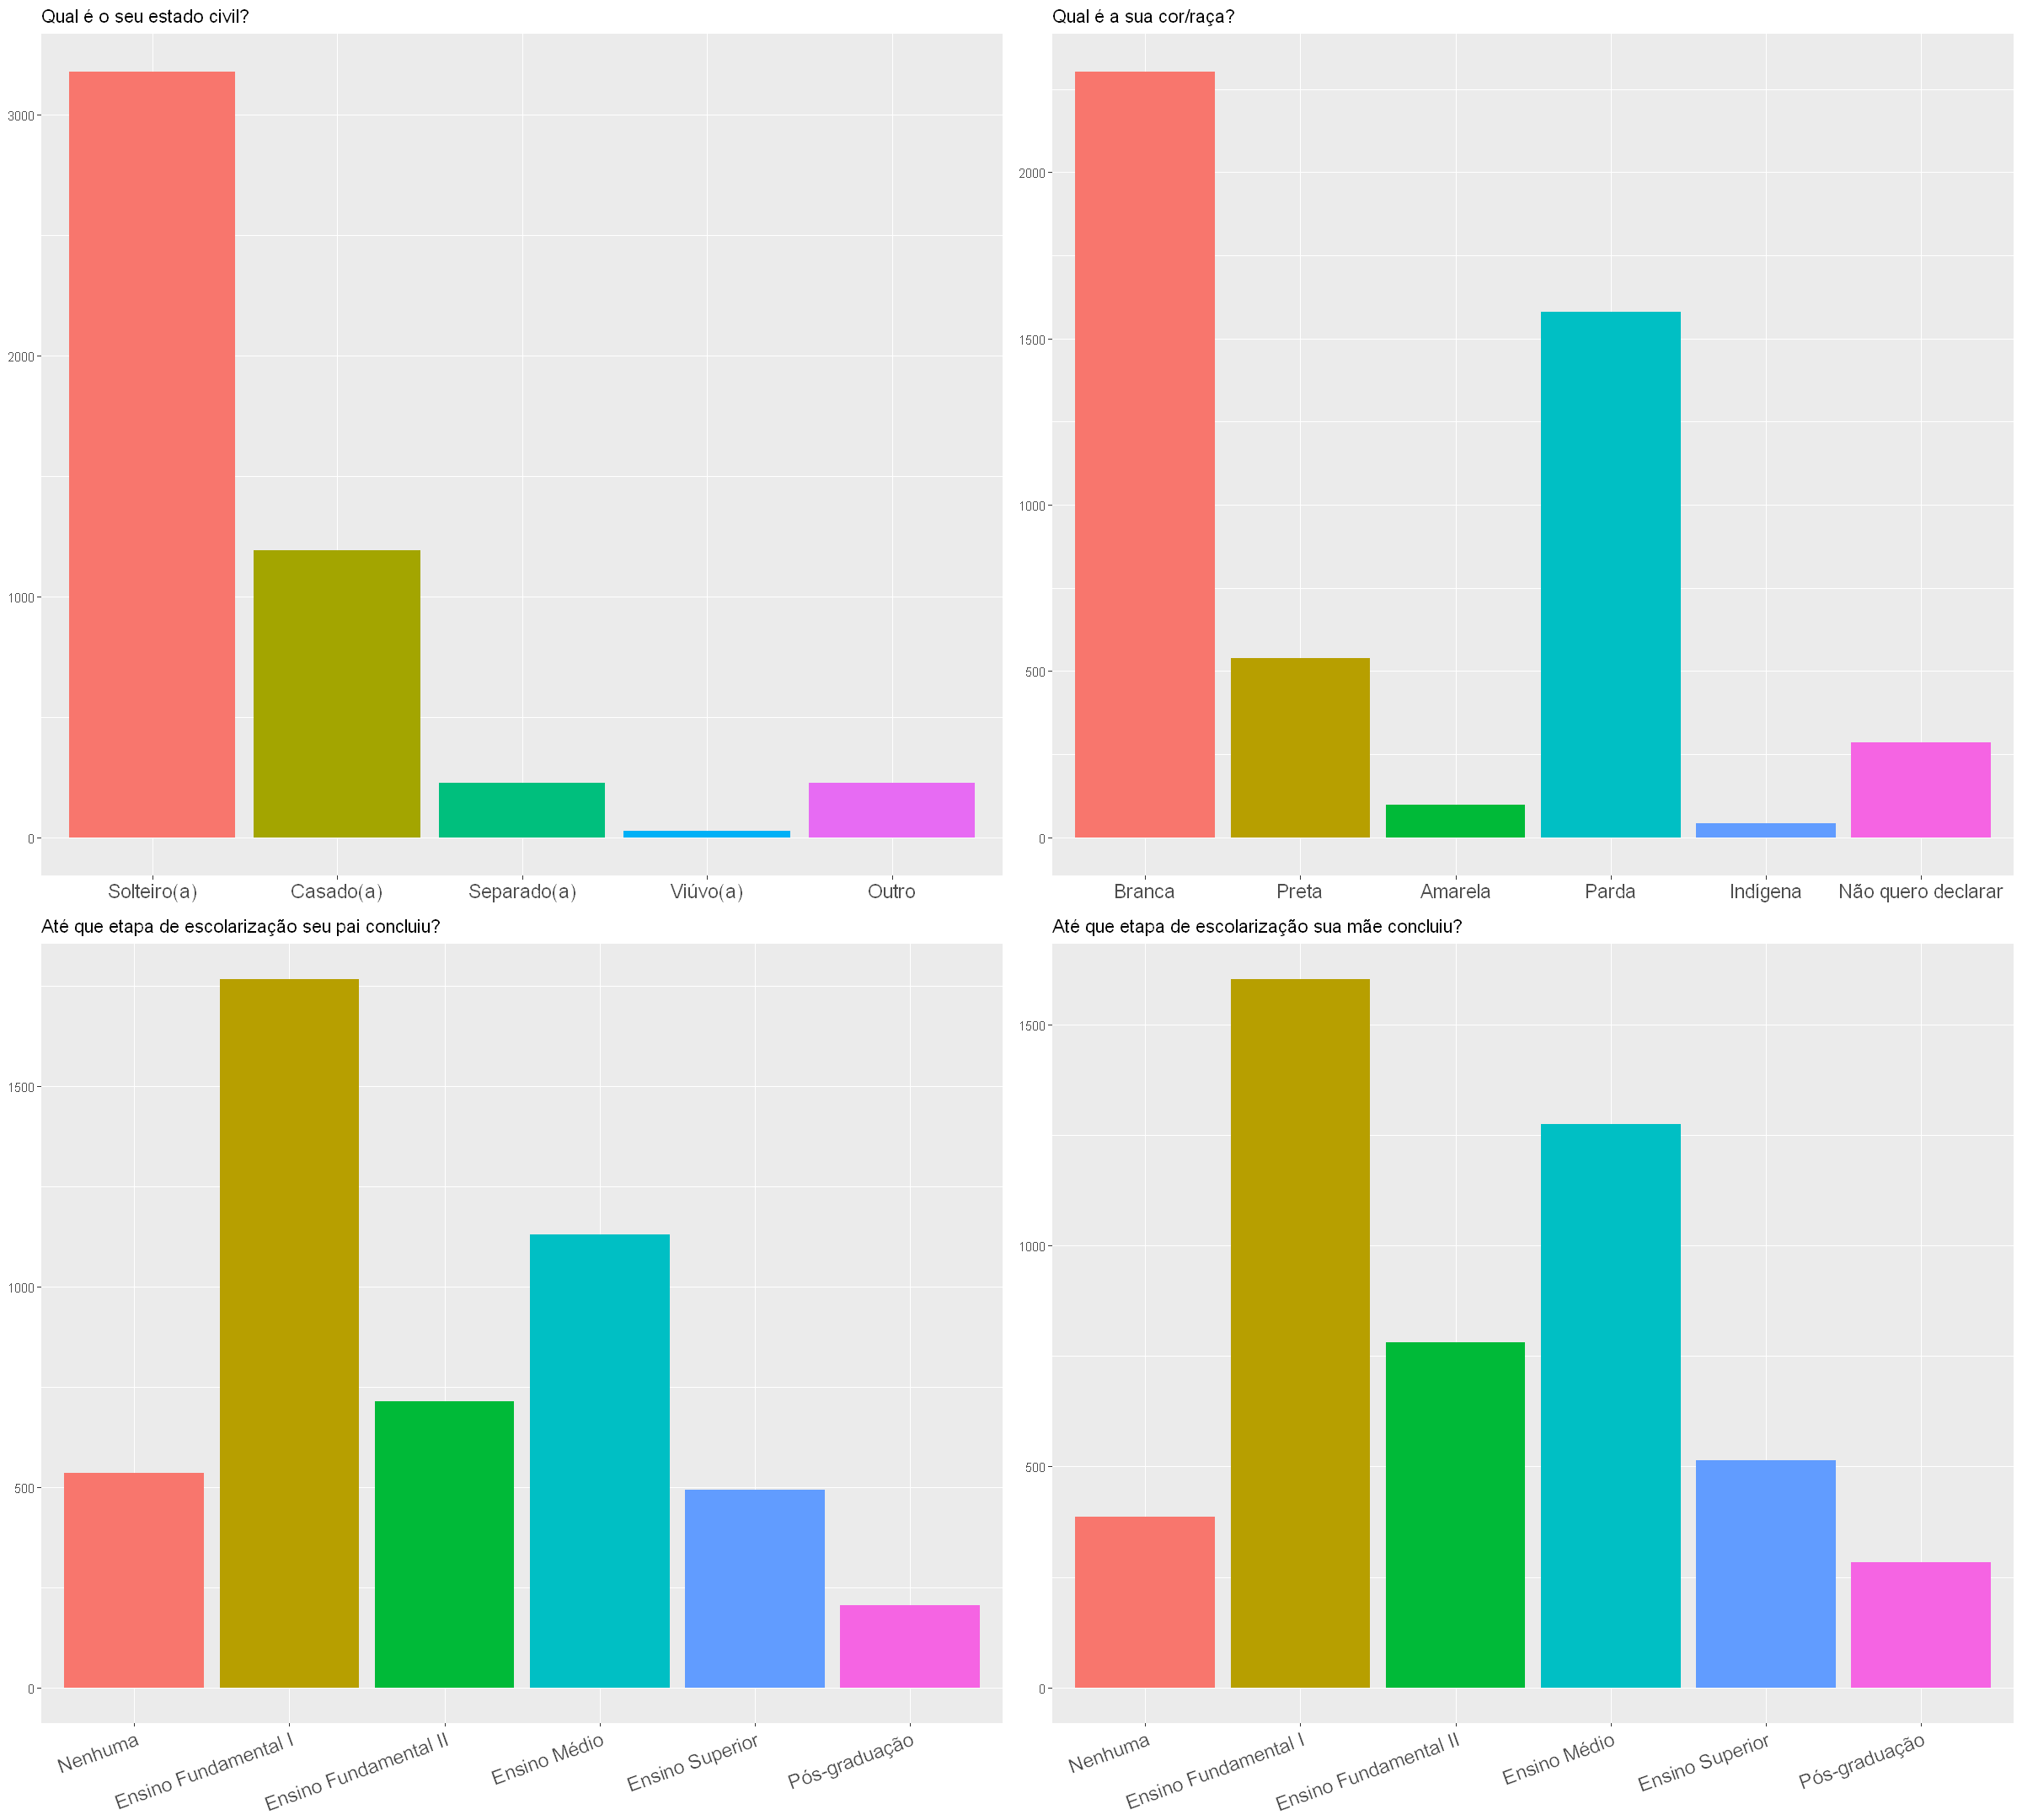

In [65]:
# Gráfico questionário do estudante
grid.arrange(ques1, ques2, ques3, ques4)       

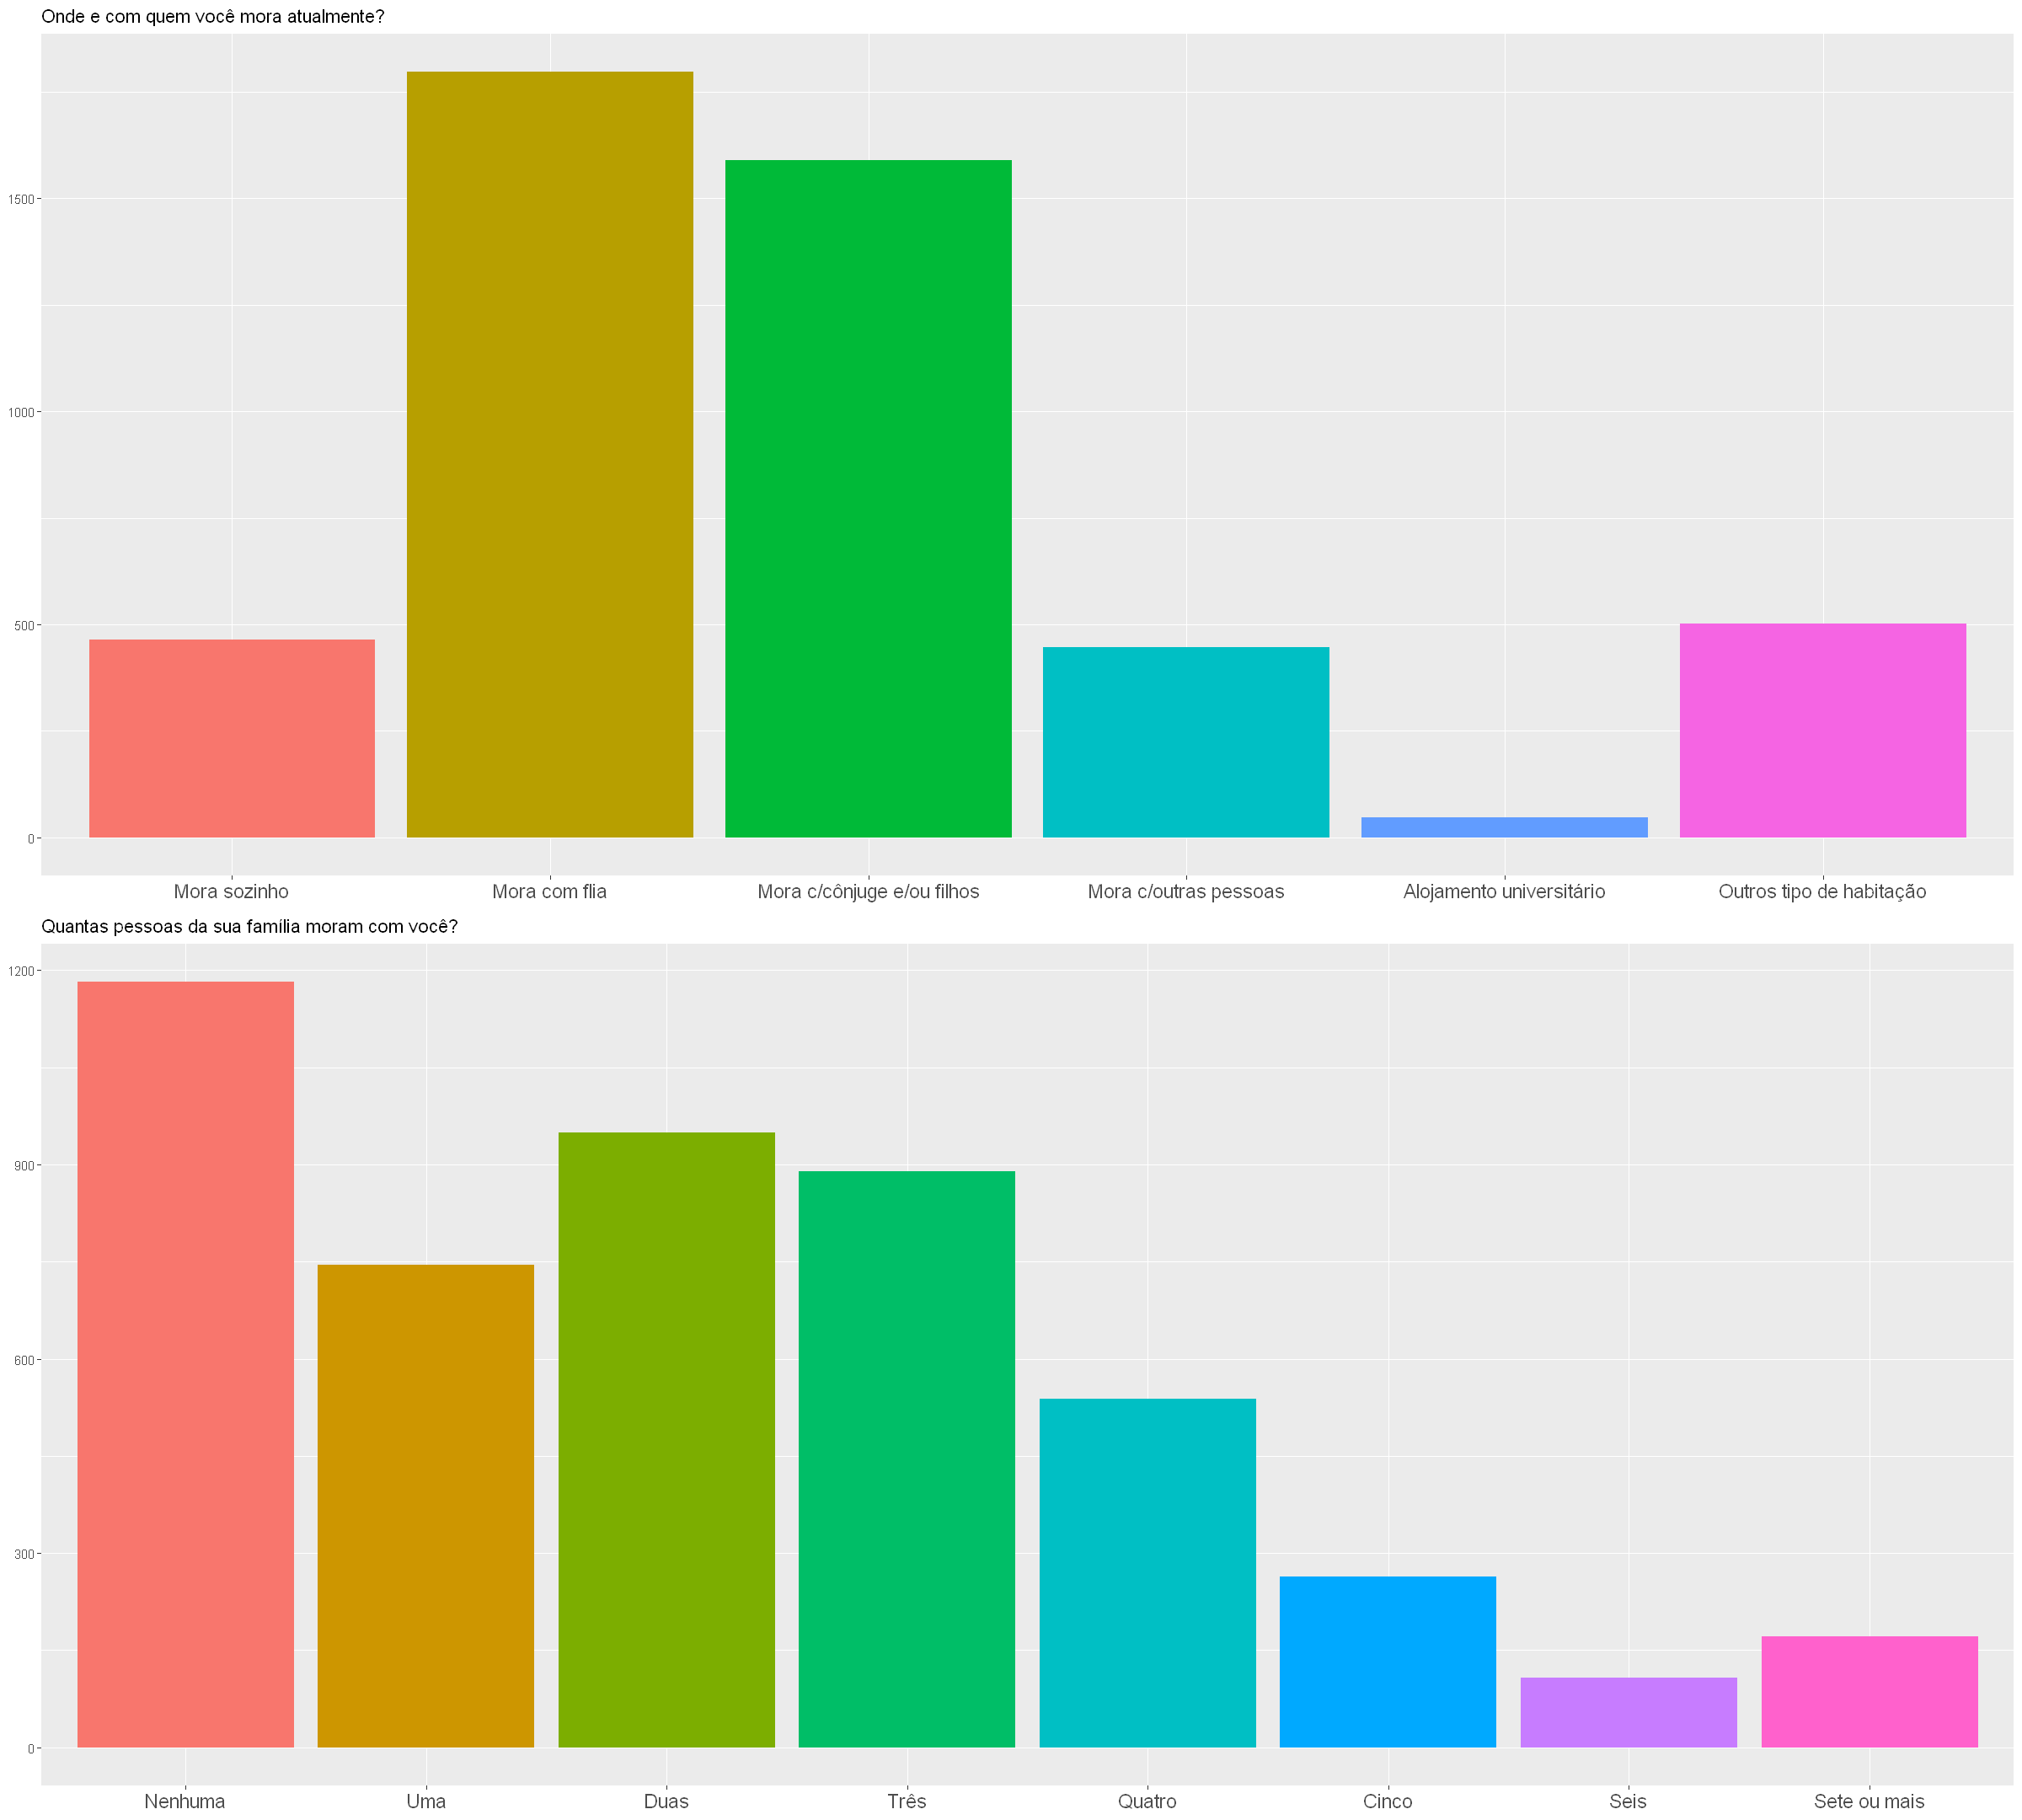

In [66]:
# Gráfico questionário do estudante
grid.arrange(ques5, ques6)

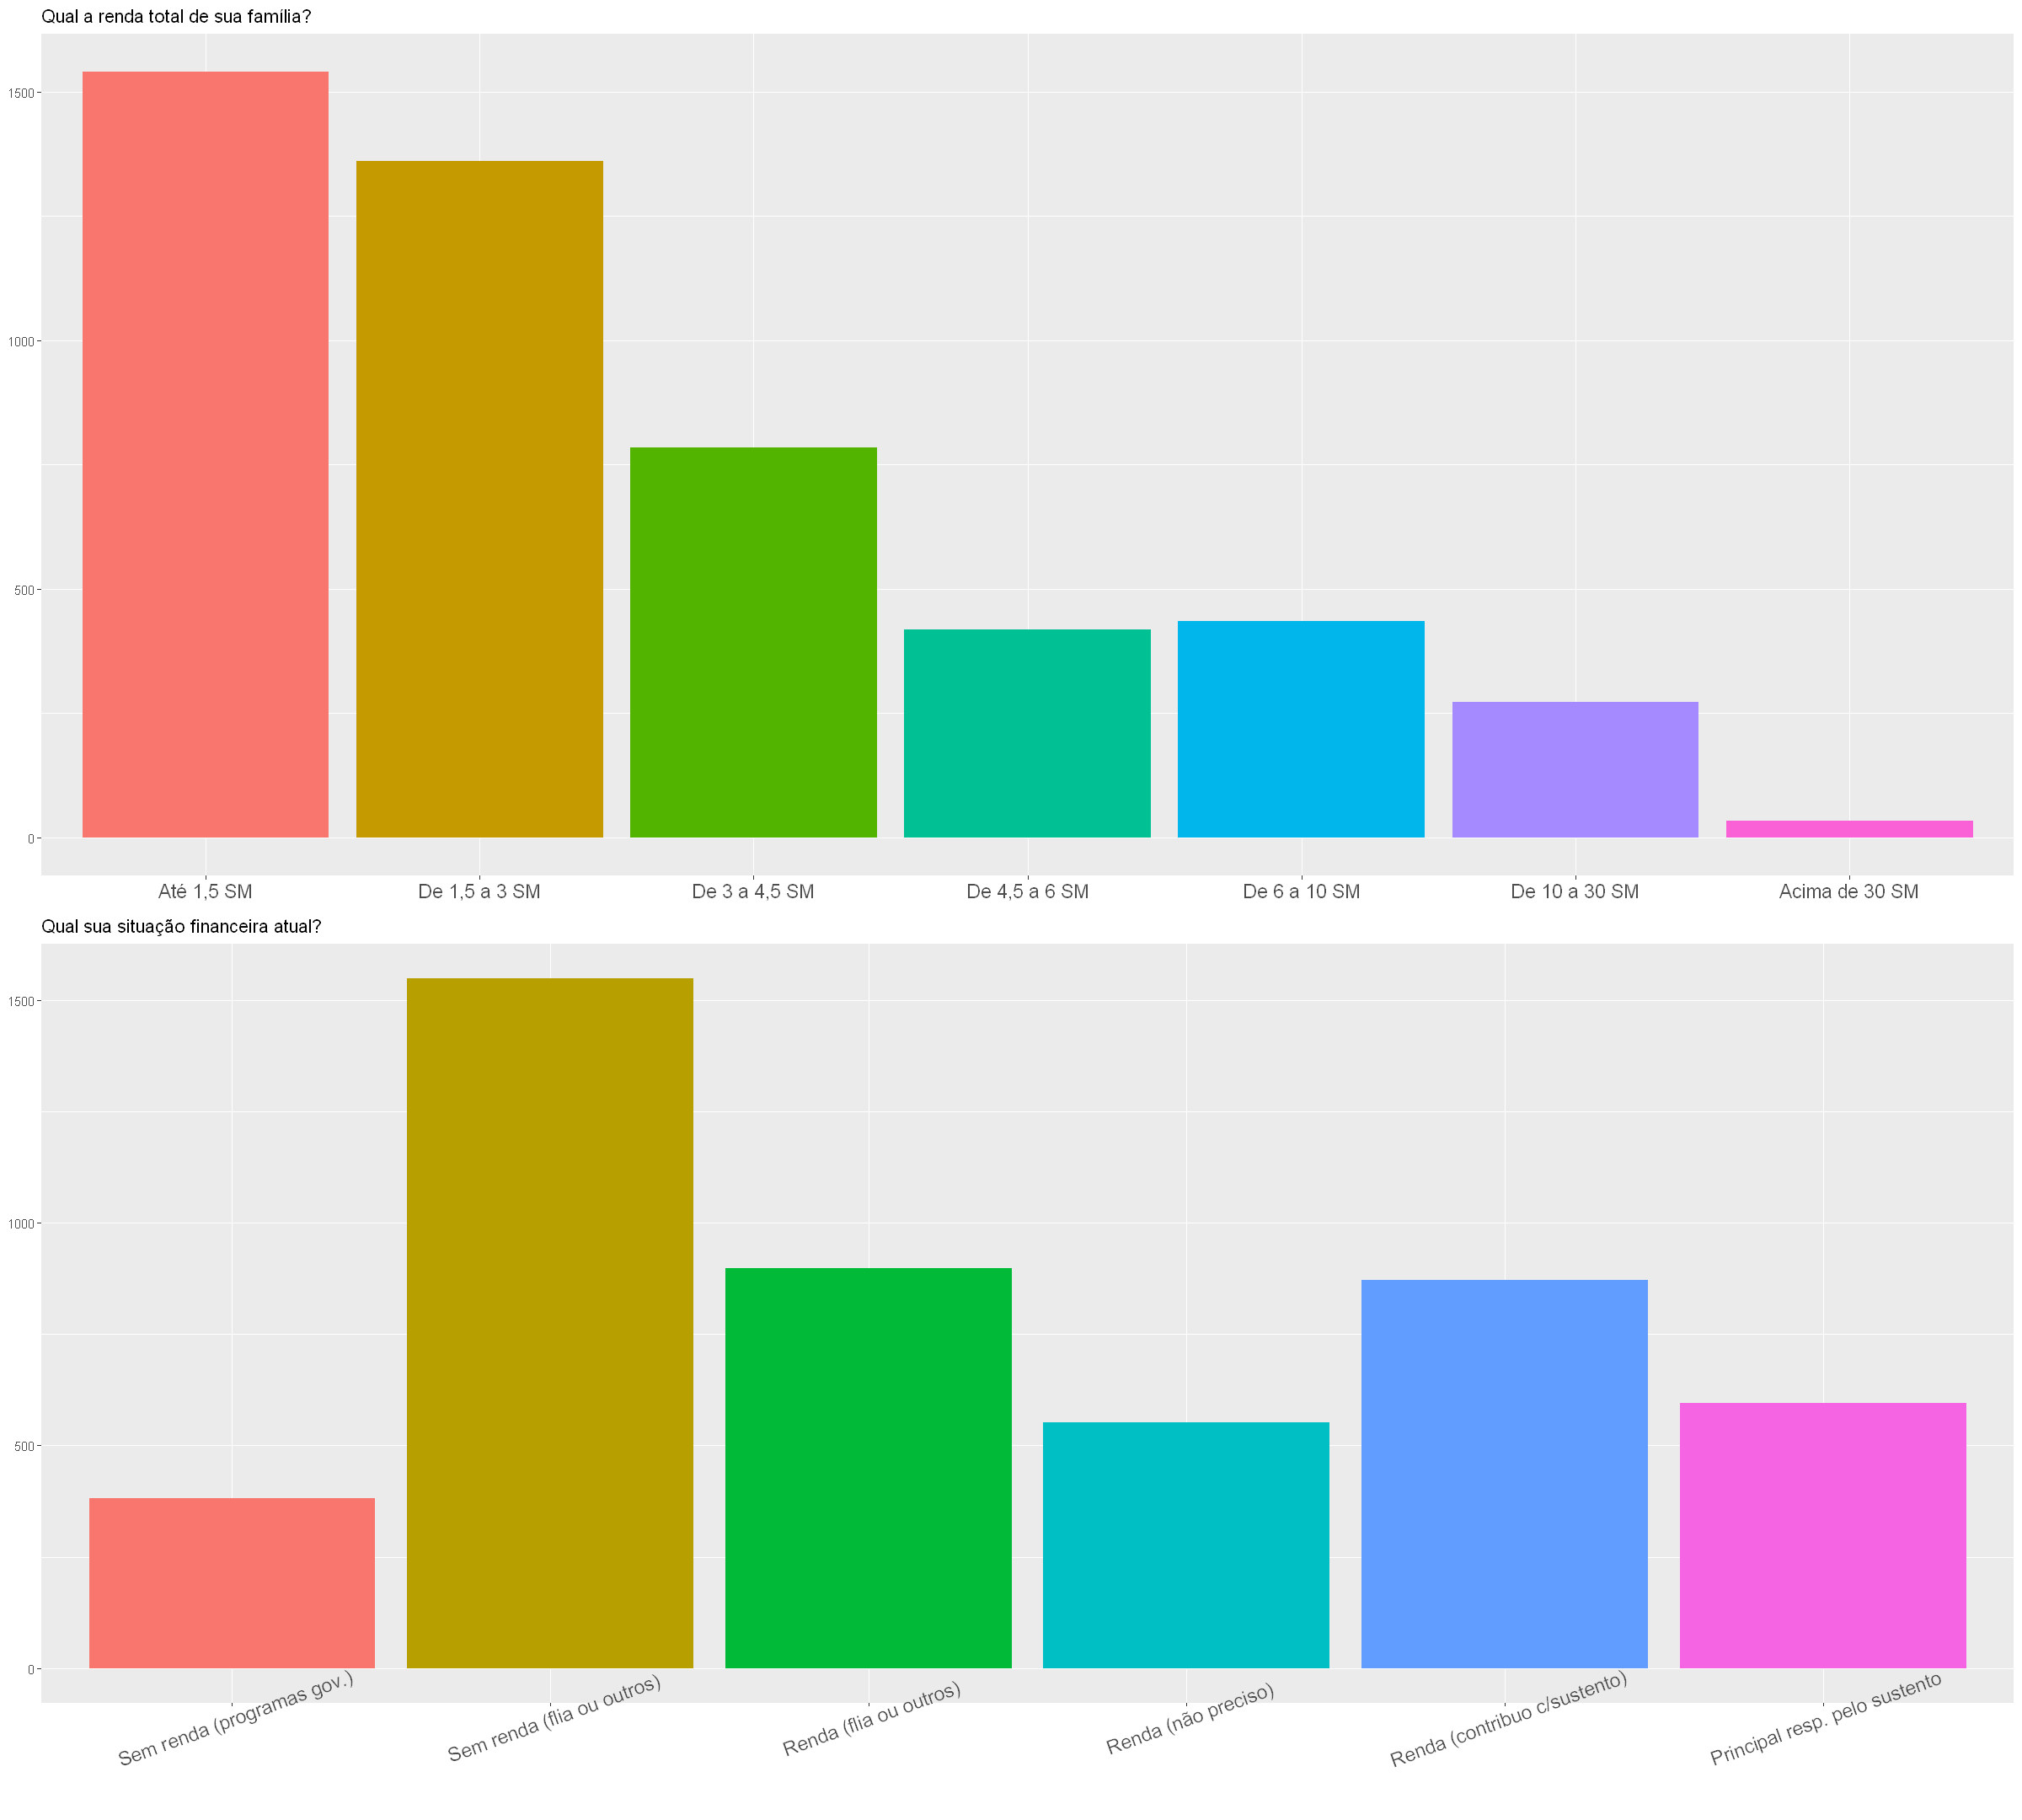

In [67]:
# Gráfico questionário do estudante
grid.arrange(ques7,ques8)

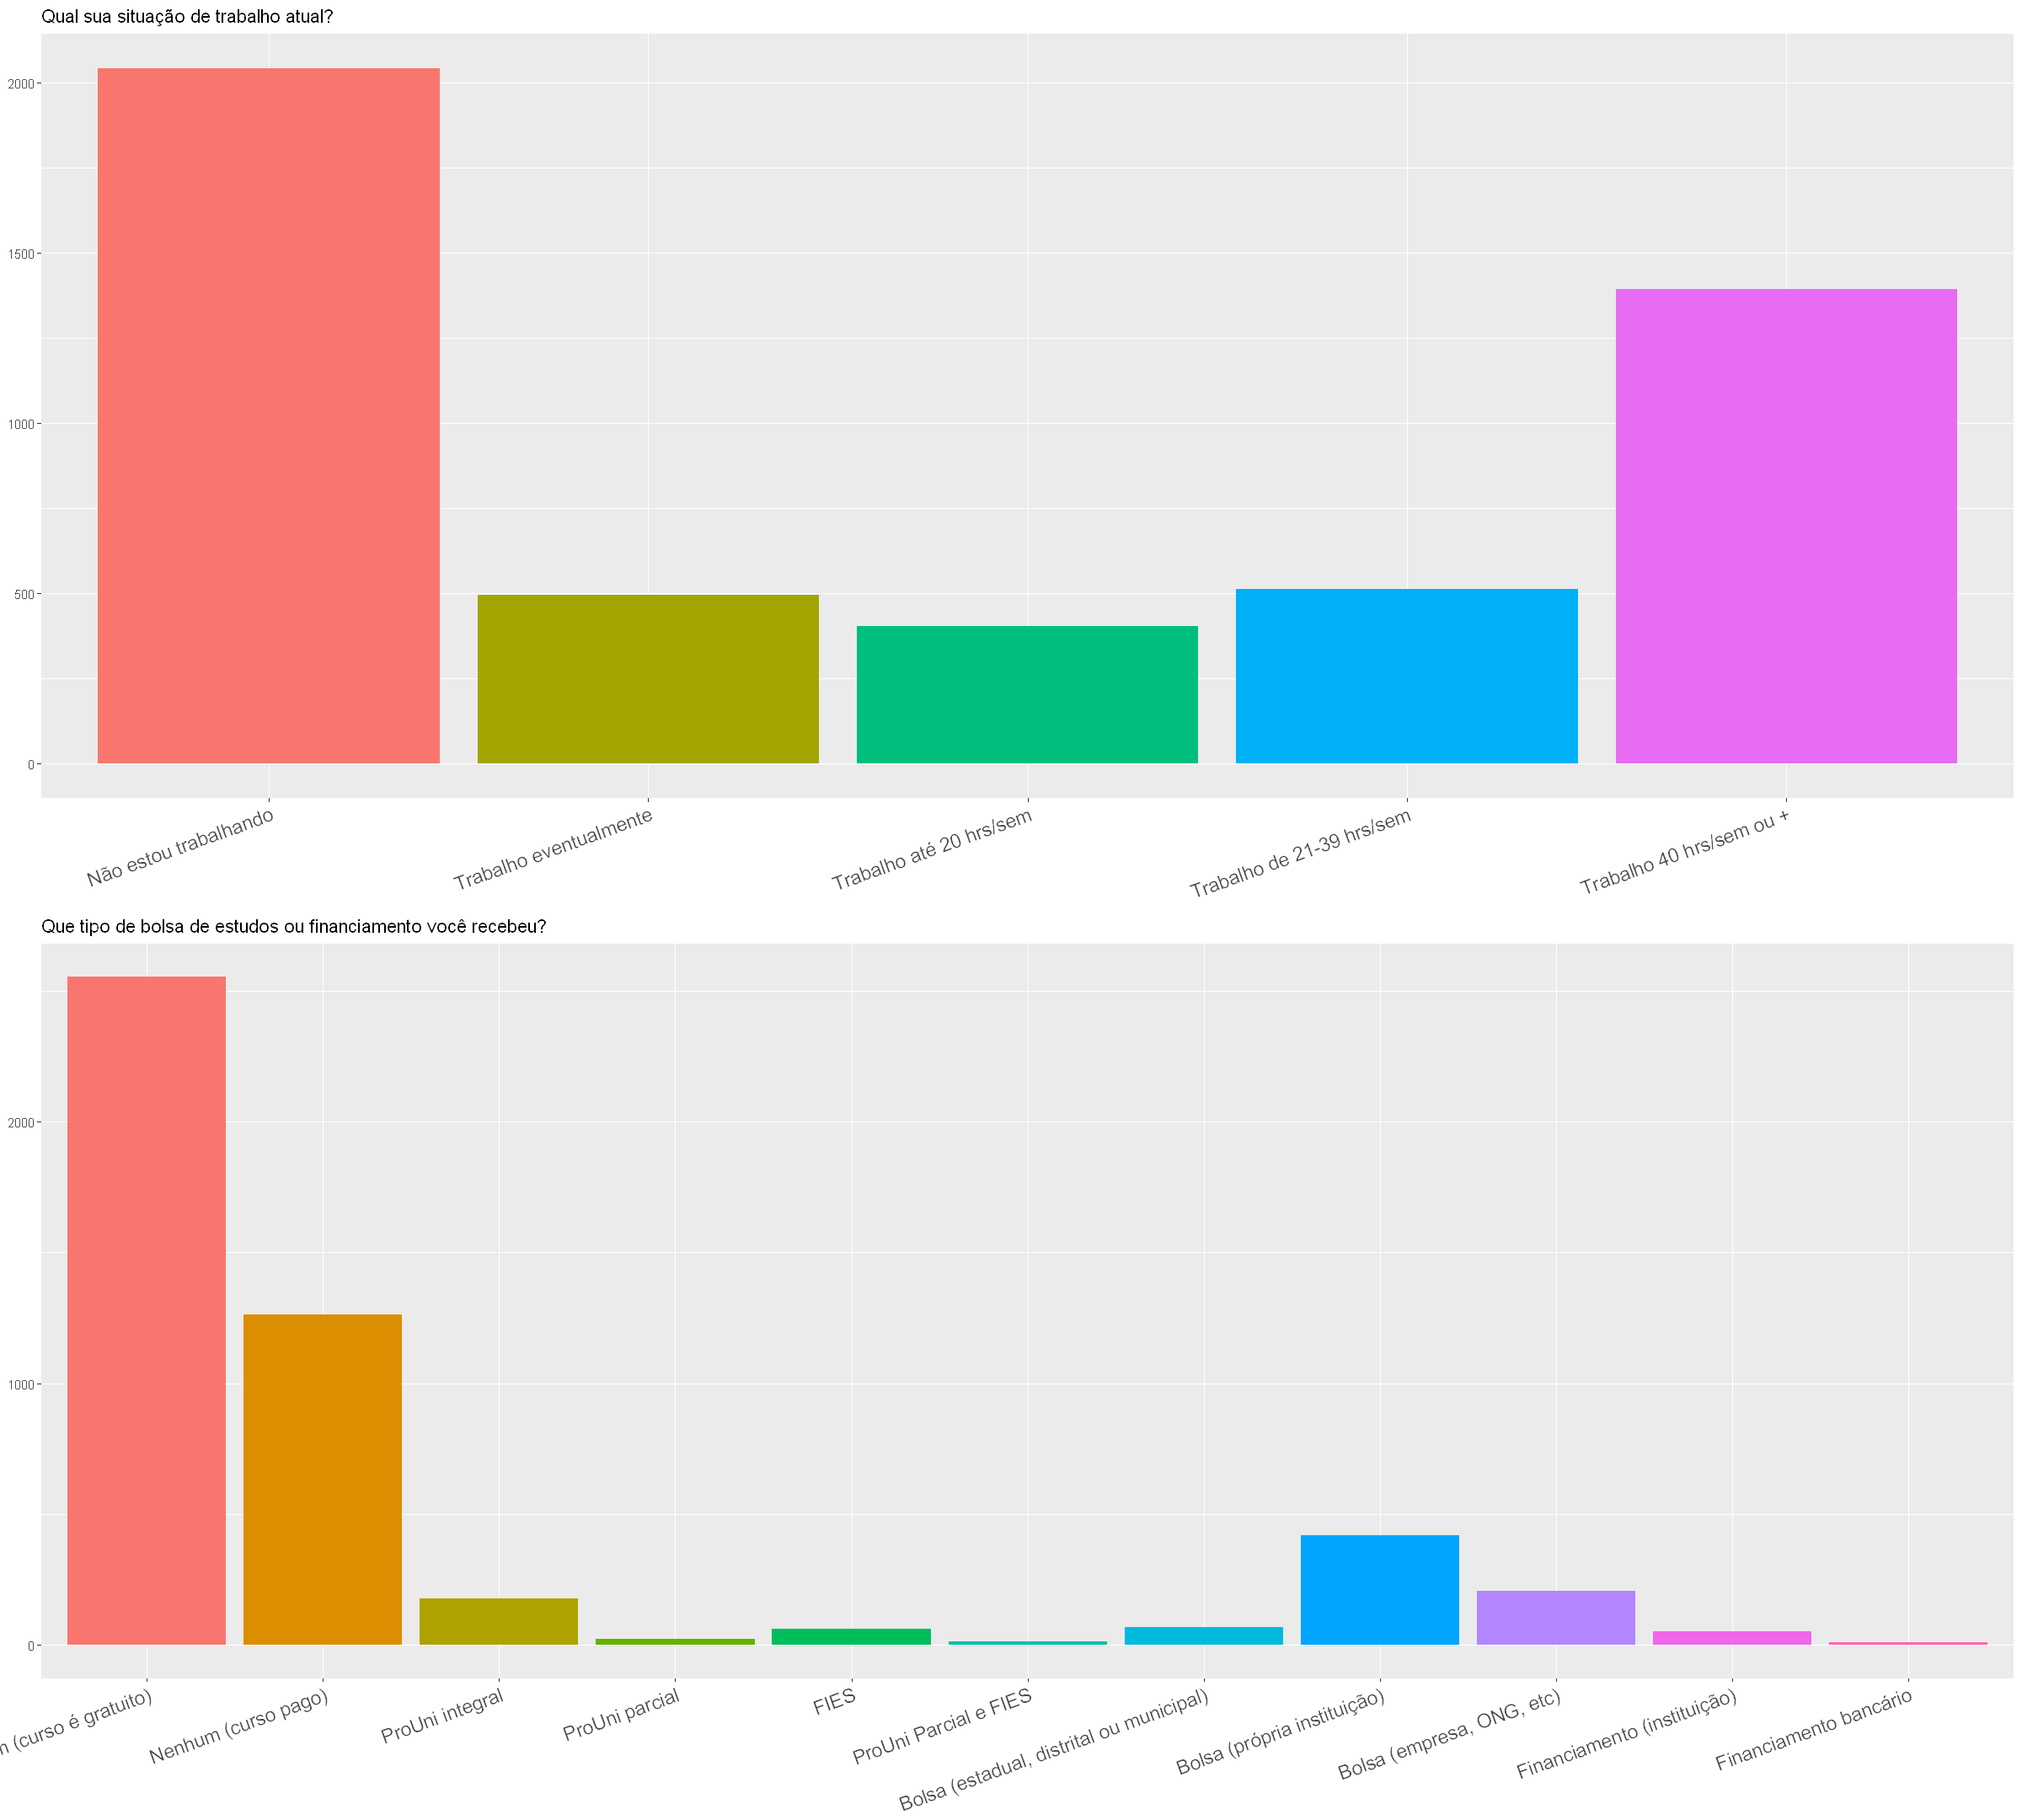

In [68]:
# Gráfico questionário do estudante
grid.arrange(ques9, ques10)

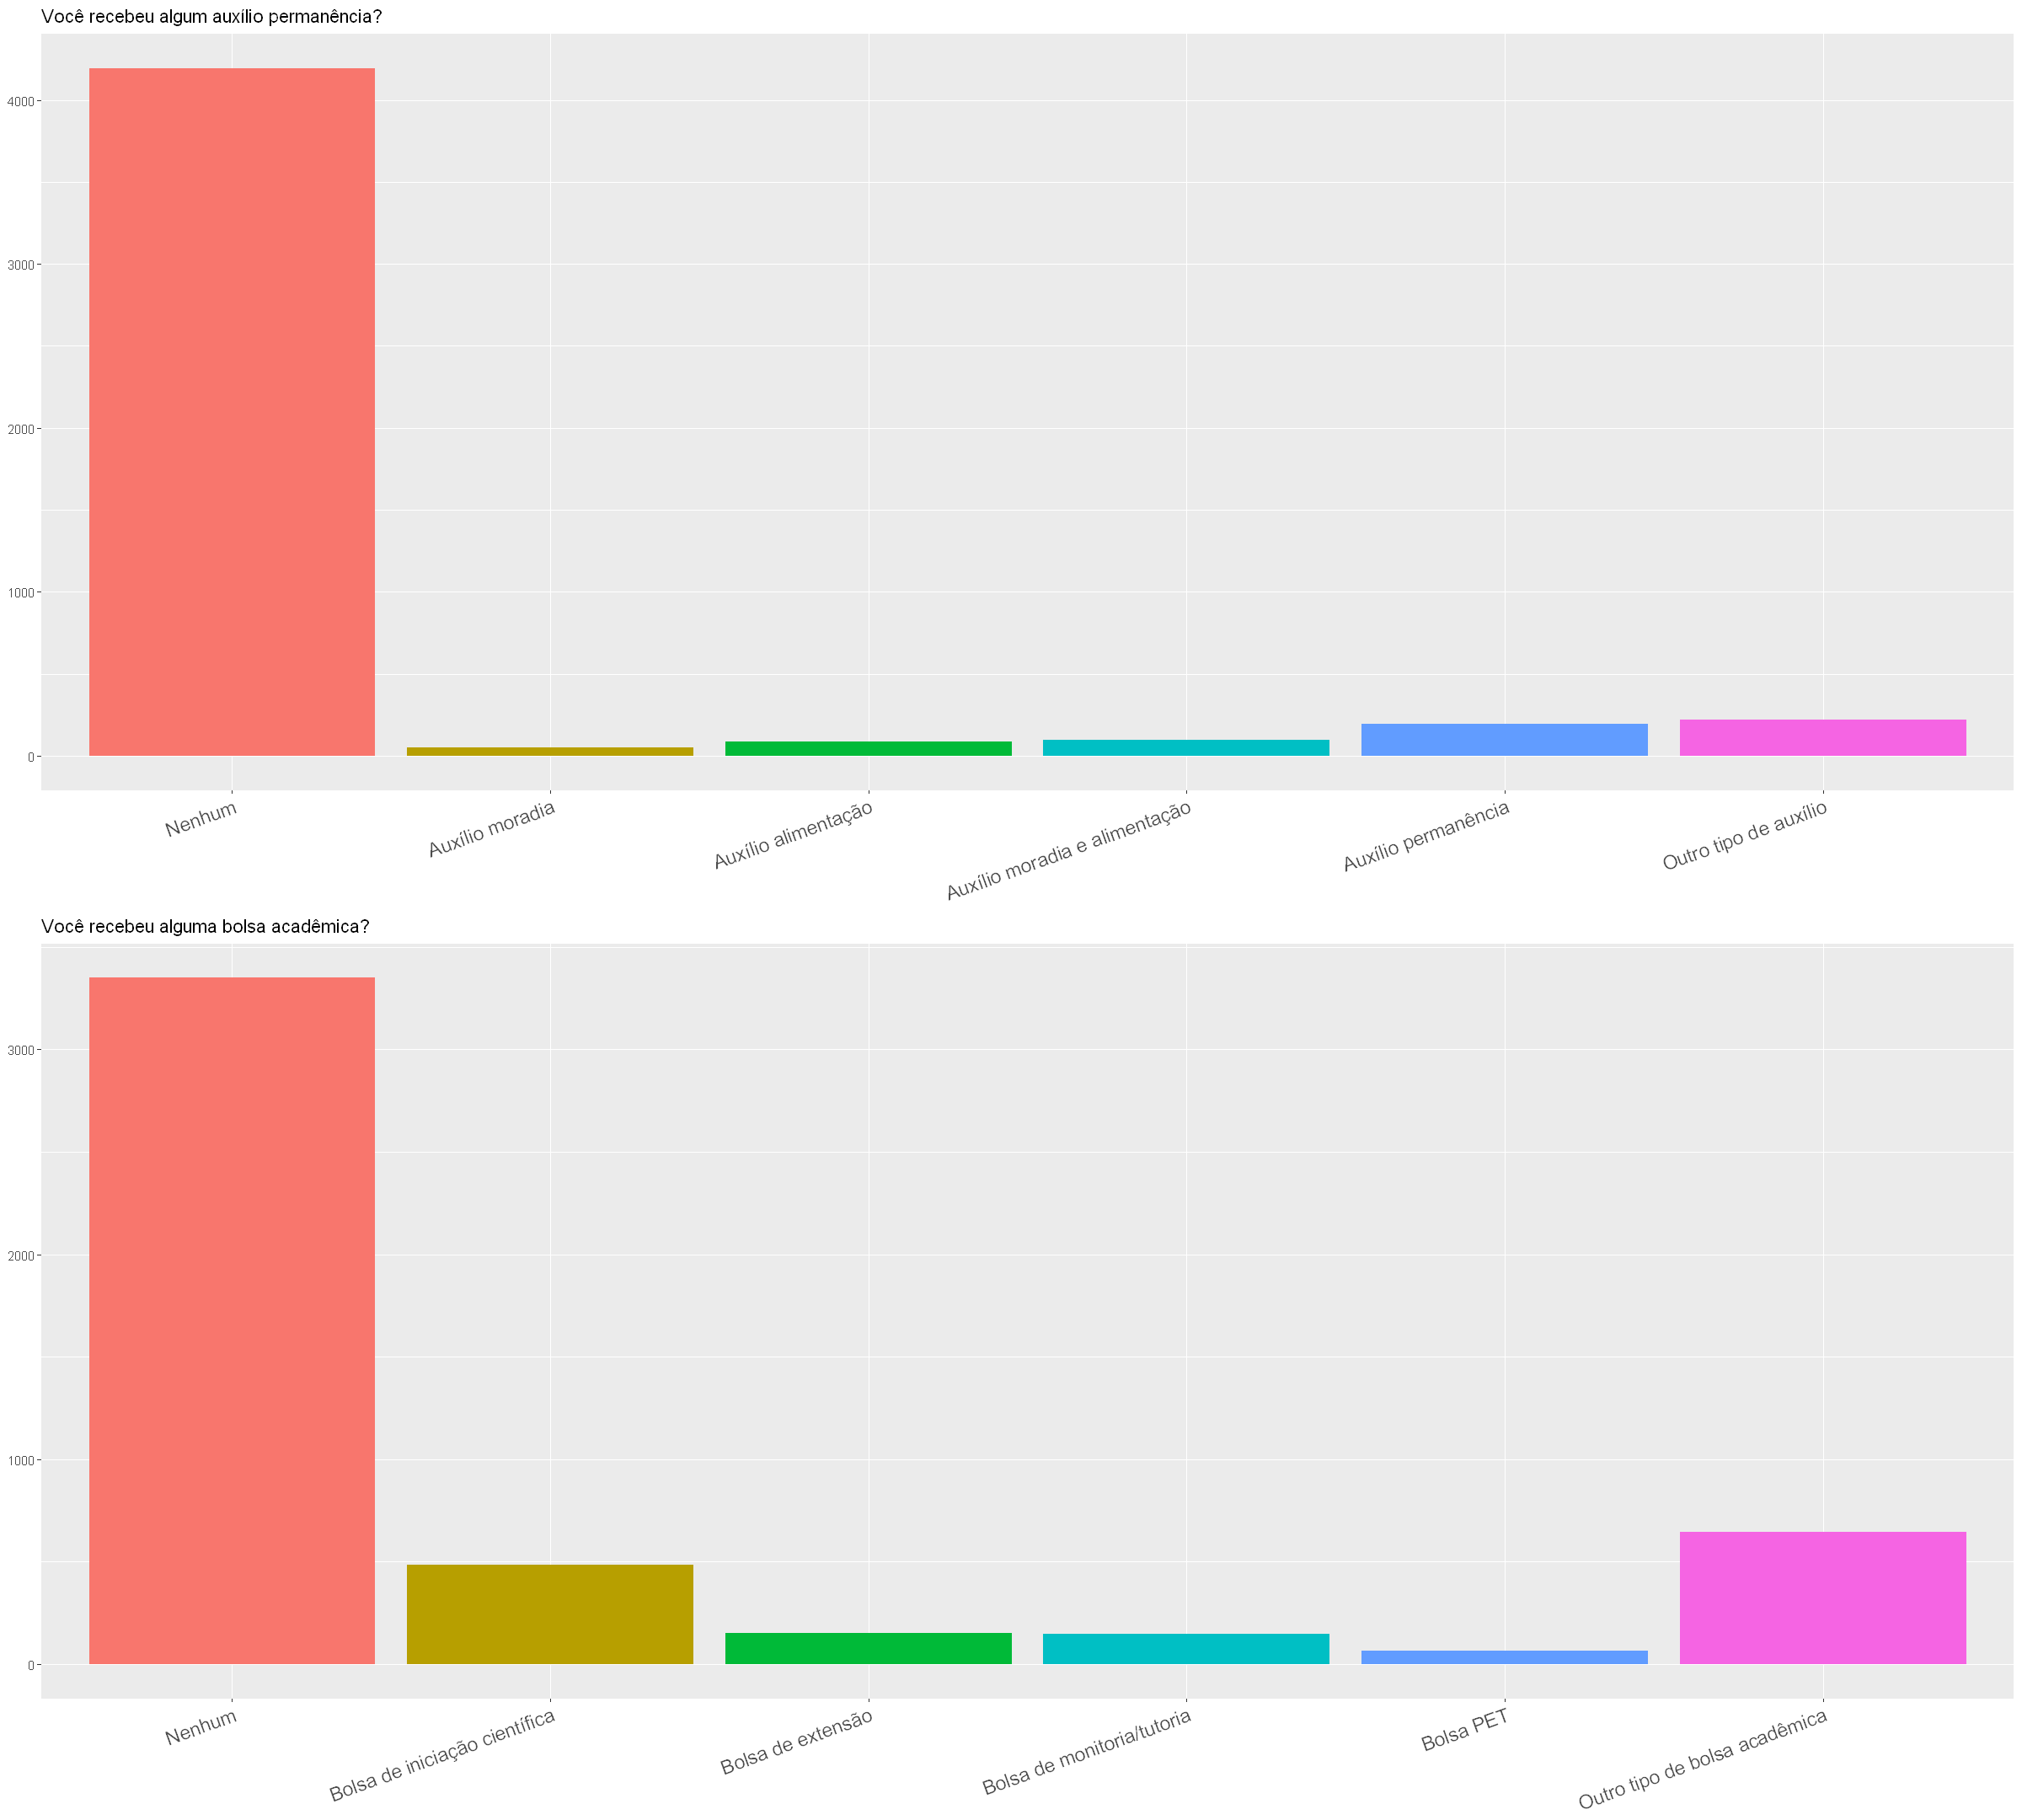

In [69]:
# Gráfico questionário do estudante
grid.arrange(ques11, ques12)

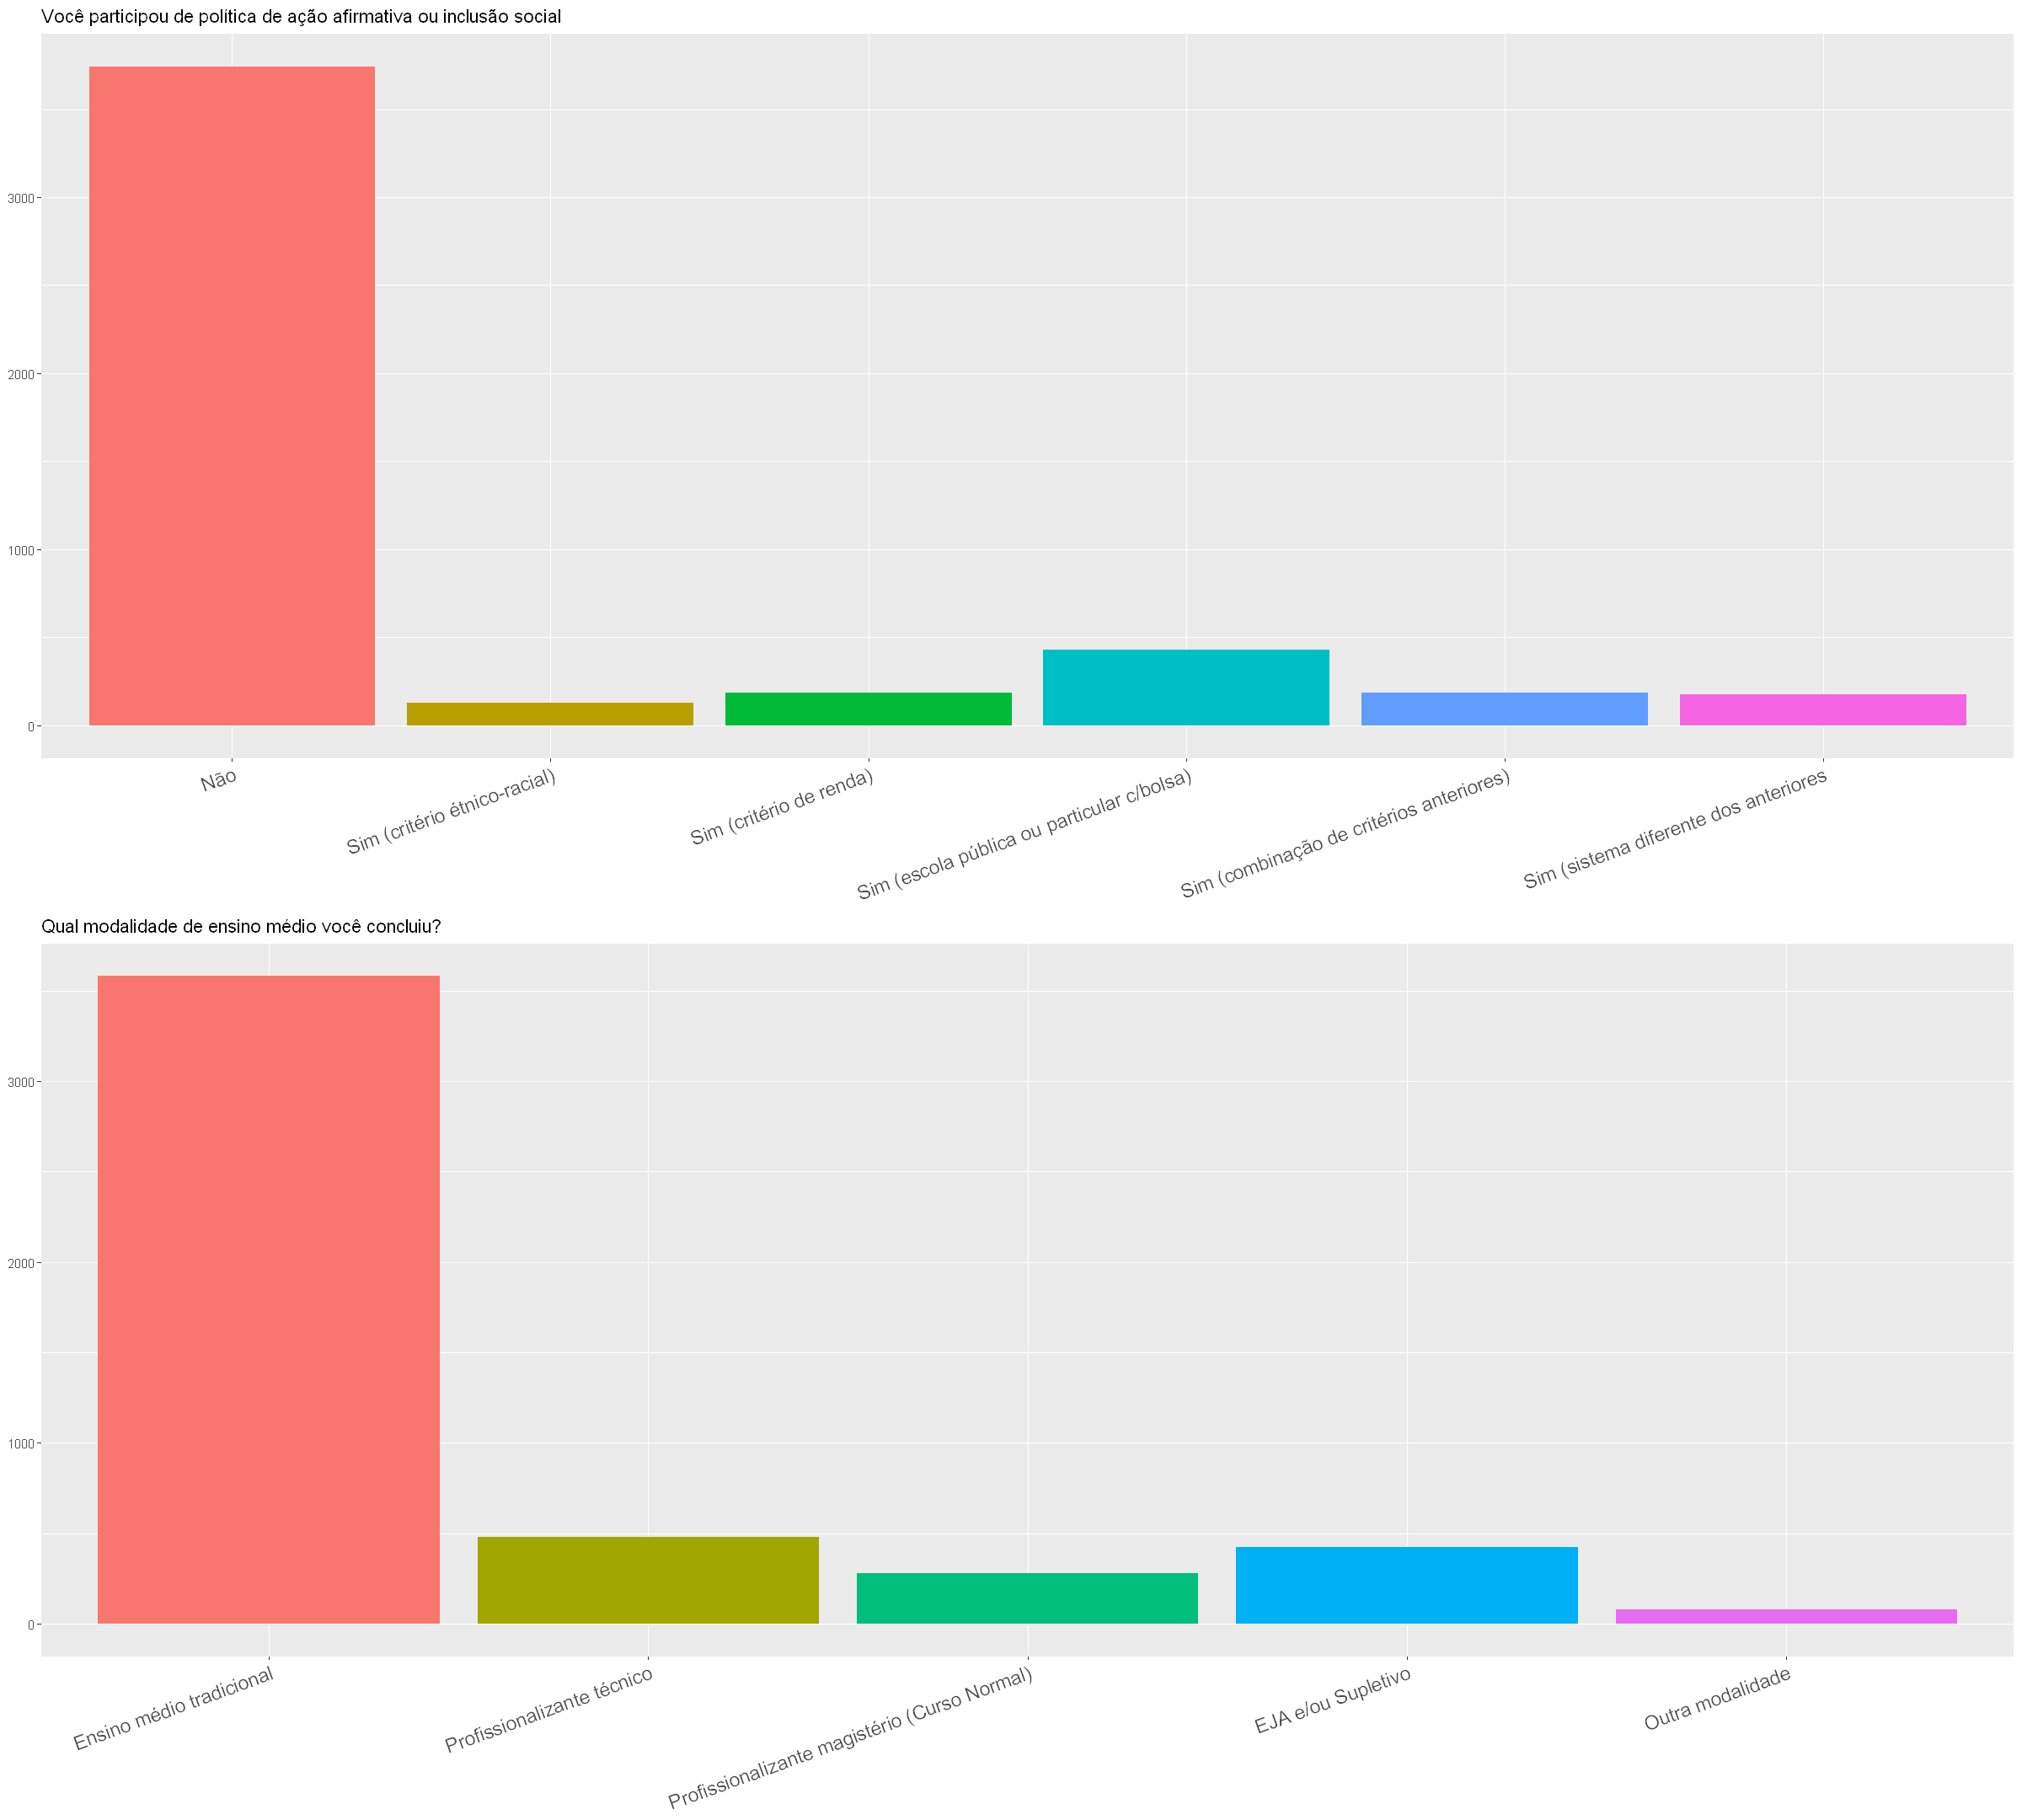

In [70]:
# Gráfico questionário do estudante
grid.arrange(ques13, ques14)

### 3.6 RELAÇÃO NOTAS E INFORMAÇÕES DA INSTITUIÇÃO E CURSO

In [71]:
info_n1<- df_enade_fil %>%
  ggplot(aes(CO_UF_CURSO, NT_GER, fill = CO_UF_CURSO)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Estado e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(plot.title = element_text(size = 14, face="bold"),axis.text.x = element_text(size = 14))

In [72]:
info_n2<- df_enade_fil %>%
  ggplot(aes(CO_MODALIDADE, NT_GER, fill = CO_MODALIDADE)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Modalidade e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(plot.title = element_text(size = 14, face="bold"),axis.text.x = element_text(size = 14))

In [73]:
info_n3<- df_enade_fil %>%
  ggplot(aes(CO_CATEGAD, NT_GER, fill = CO_CATEGAD)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Categoria e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  scale_x_discrete(limits=c("Municipal", "Estadual", "Federal", "Privado s/fins lucrativos",
"Privado c/fins lucrativos")) +
  theme(axis.text.x = element_text(size=14)) 

In [74]:
info_n4<- df_enade_fil %>%
  ggplot(aes(CO_REGIAO_CURSO, NT_GER, fill = CO_REGIAO_CURSO)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Região e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

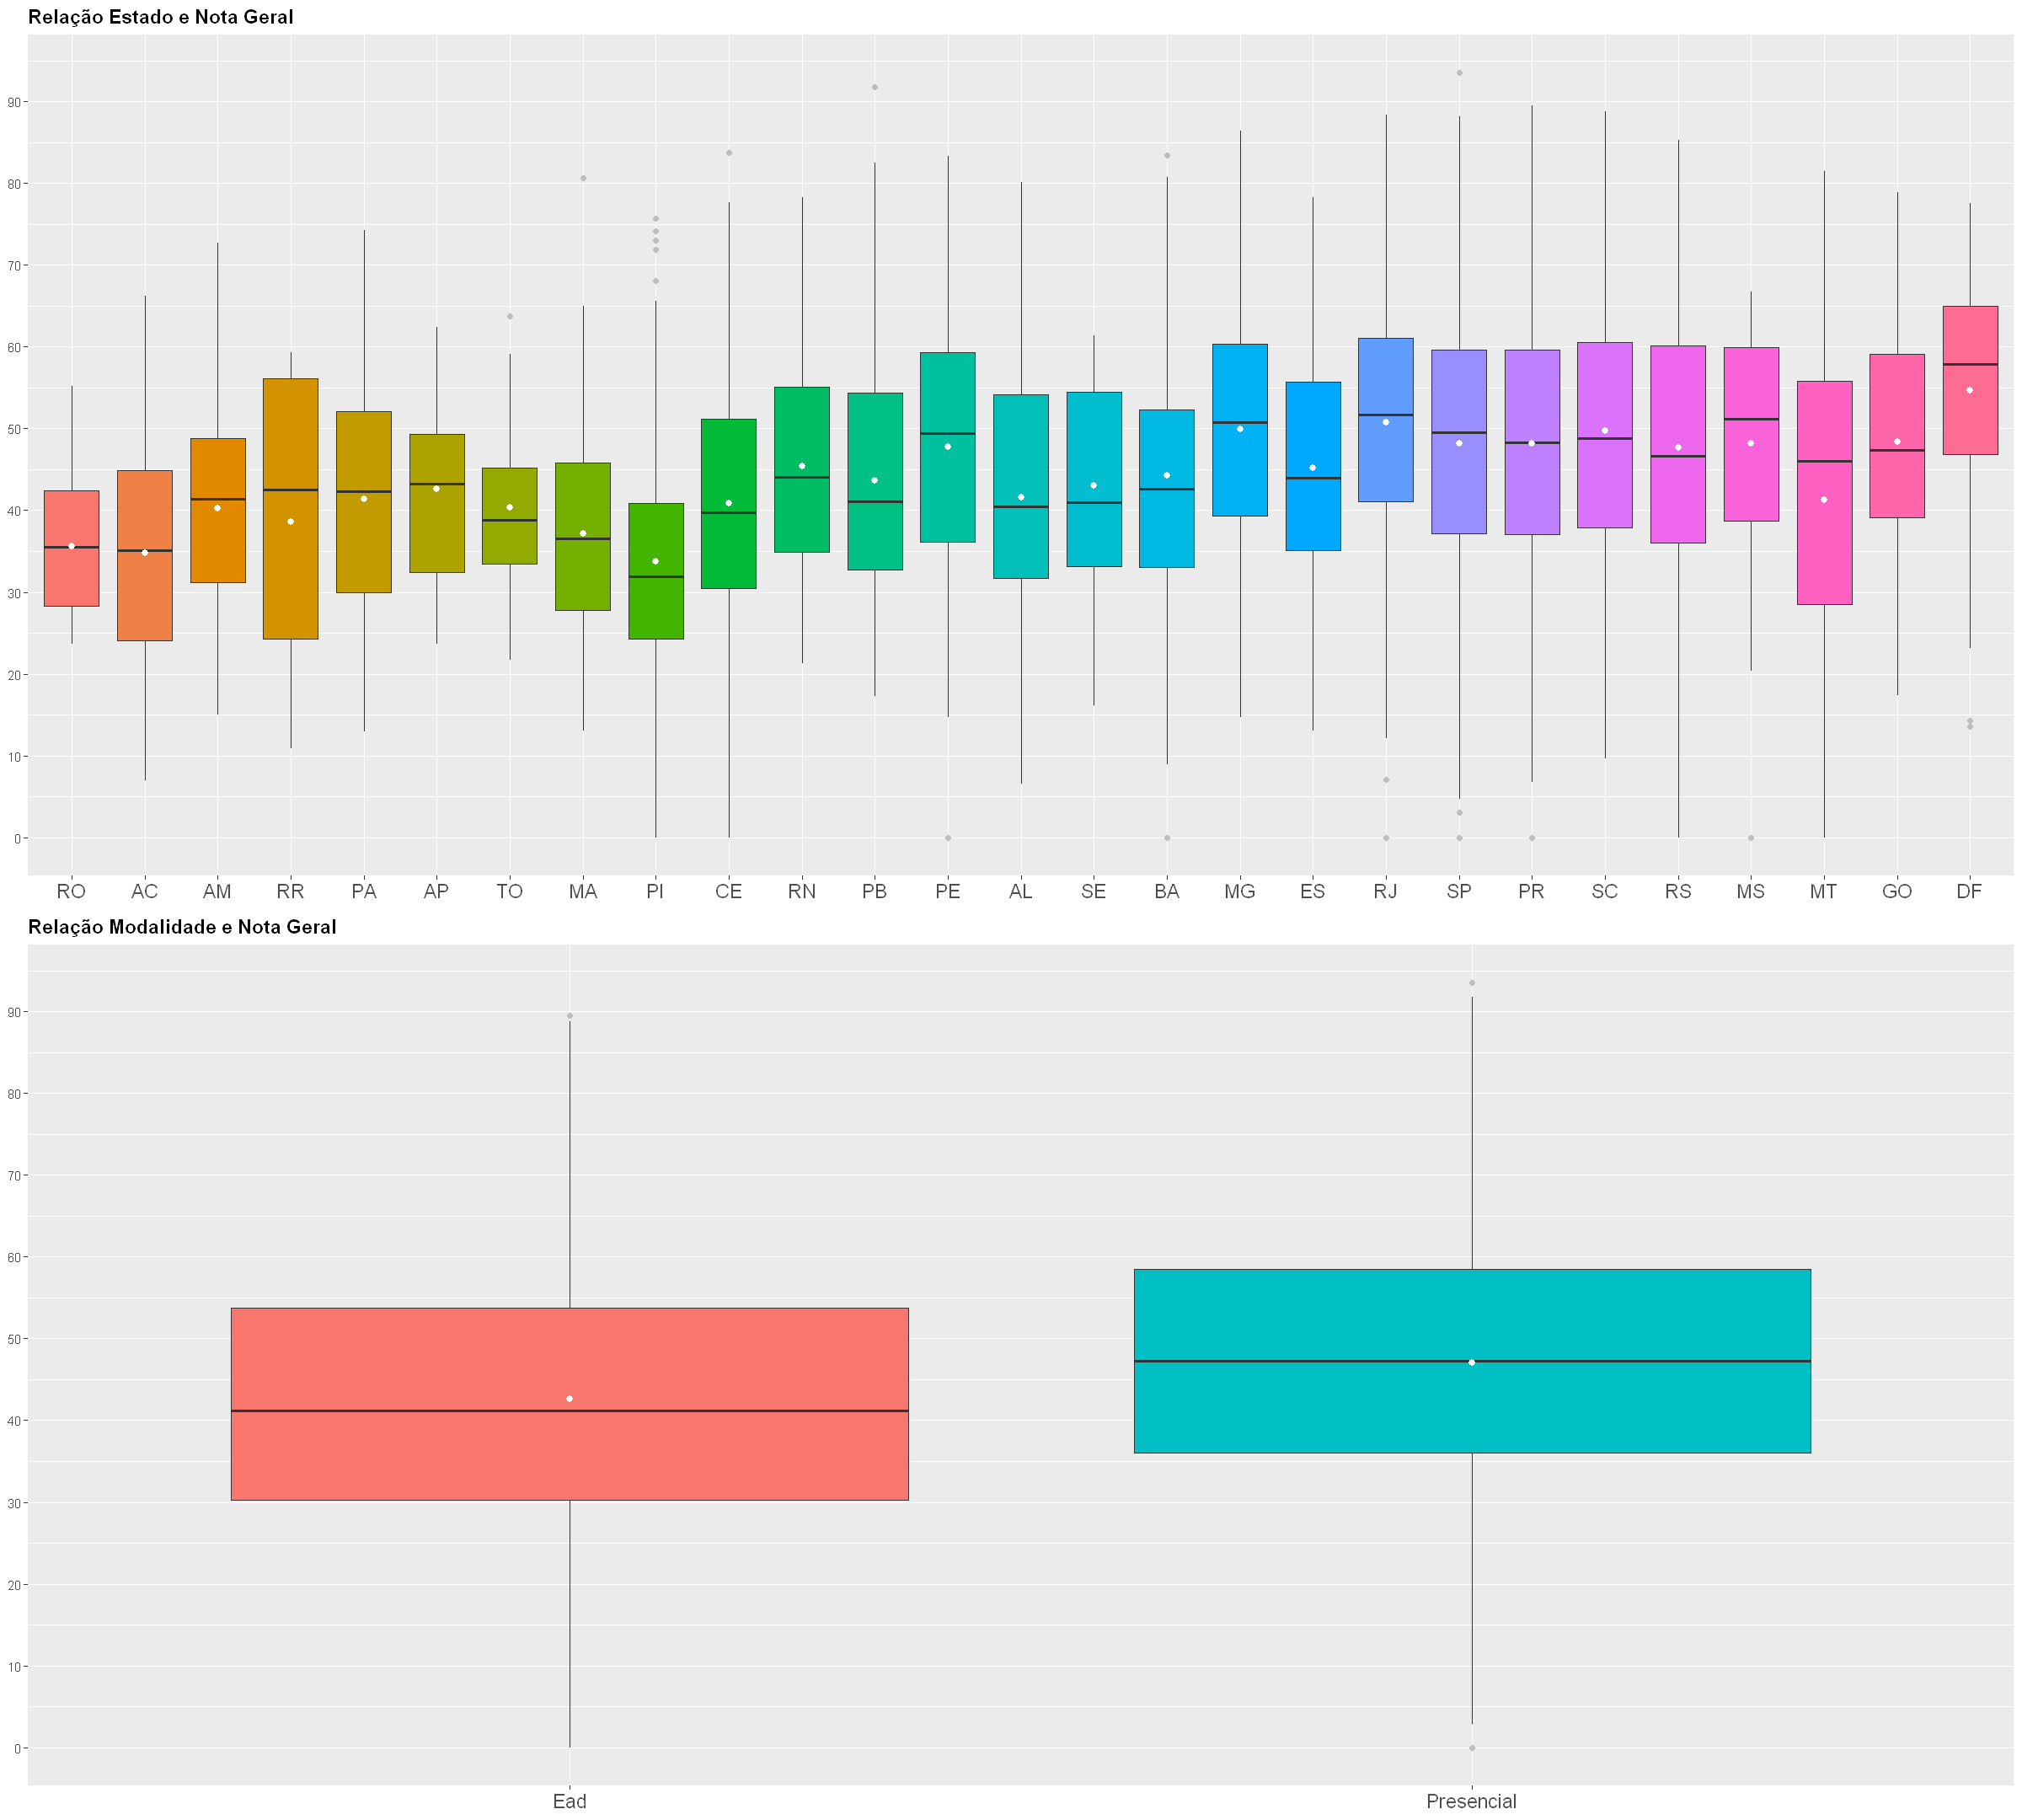

In [75]:
# Gráfico informações e notas
grid.arrange(info_n1, info_n2, ncol = 1)

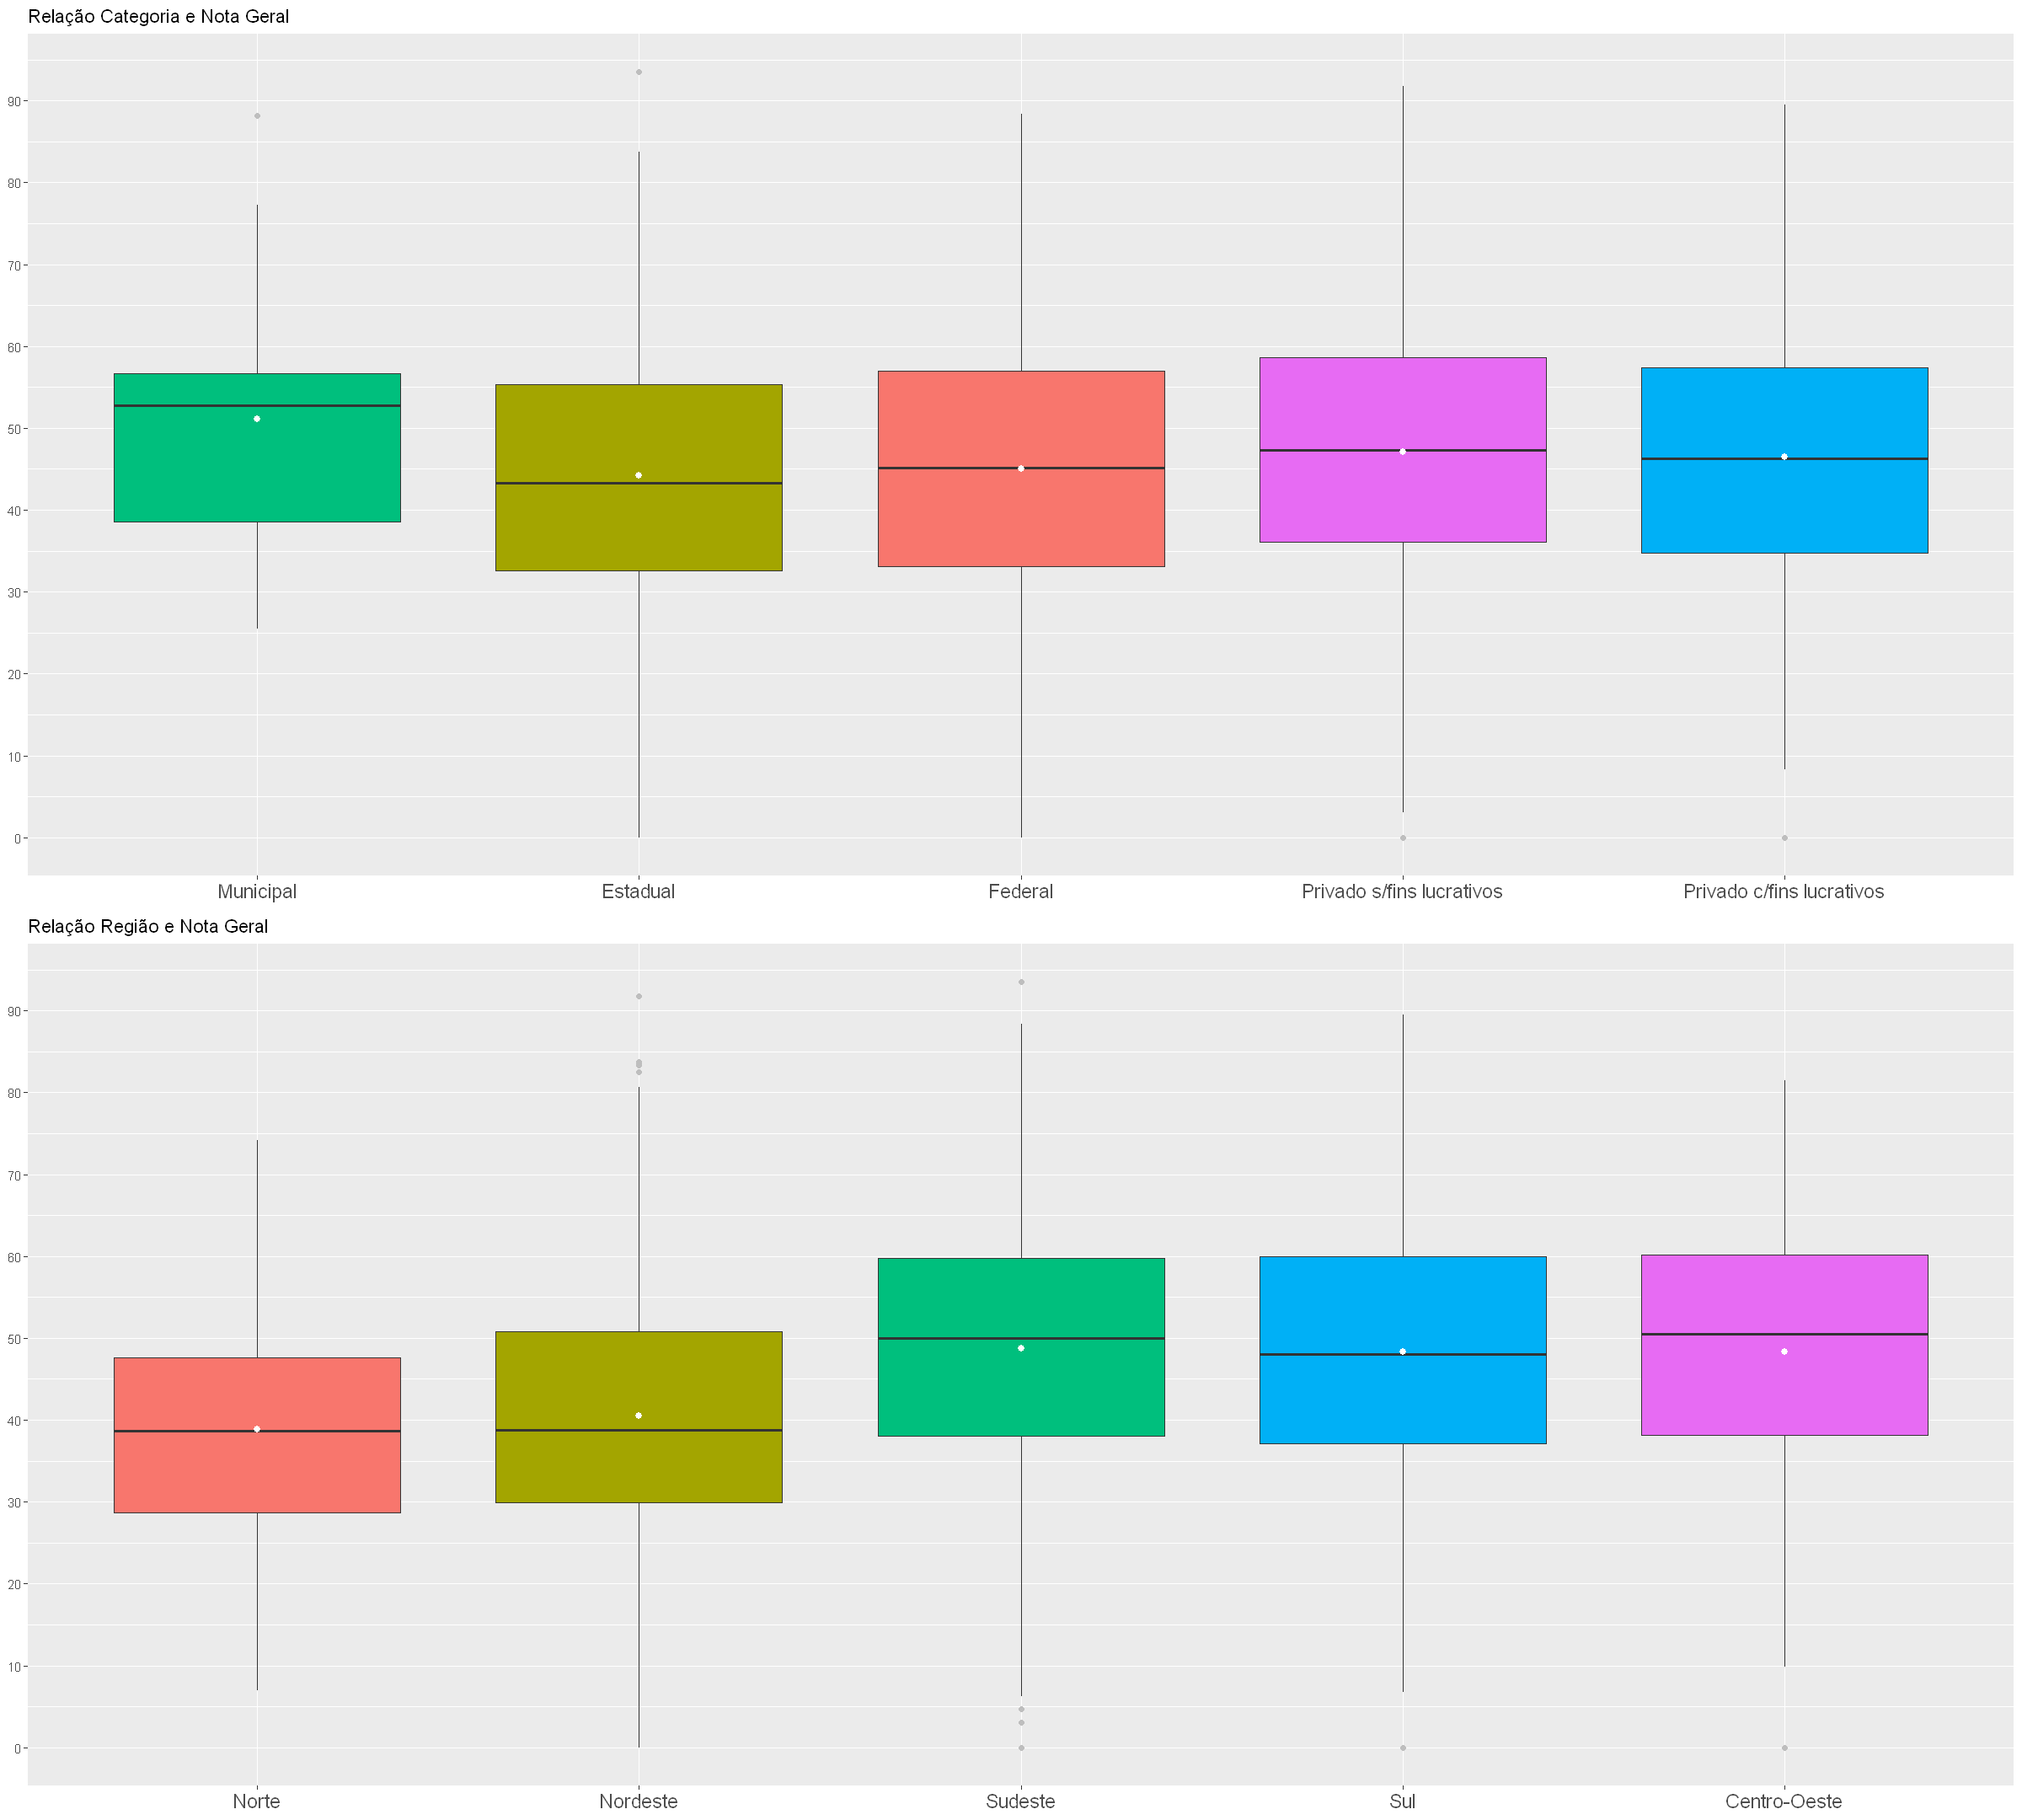

In [76]:
# Gráfico informações e notas
grid.arrange(info_n3, info_n4, ncol = 1)

### 3.7 RELAÇÃO NOTAS E CARACTERÍSTICAS DO ESTUDANTE

In [77]:
nota_carac1<- df_enade_fil %>%
  ggplot(aes(factor(NU_IDADE), NT_GER, fill = factor(NU_IDADE))) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Idade e Nota Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,size=14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10))

In [78]:
nota_carac2<-df_enade_fil %>%
  ggplot(aes(TP_SEXO, NT_GER, fill = TP_SEXO)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +  
  labs(title = "Relação Sexo e Nota Geral", x =NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14))

In [79]:
nota_carac3<-df_enade_fil %>%
  filter(ANO_FIM_EM >= "2000") %>%
  ggplot(aes(factor(ANO_IN_GRAD), NT_GER, fill = factor(ANO_IN_GRAD))) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Ano Início da Graduação e Nota Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size=14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10))

In [80]:
nota_carac4<-df_enade_fil %>%
  filter(ANO_FIM_EM >= "1965") %>%
  ggplot(aes(factor(ANO_FIM_EM), NT_GER, fill = factor(ANO_FIM_EM))) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Ano Fim Ensino Médio e Nota Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1,size=14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) 

In [81]:
nota_carac5<-df_enade_fil %>%
  ggplot(aes(CO_TURNO_GRADUACAO, NT_GER, fill = CO_TURNO_GRADUACAO)) +
  geom_boxplot(outlier.colour = "grey", show.legend = F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Turno e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  scale_x_discrete(limits=c("Matutino", "Vespertino", "Noturno", "Integral")) +
  theme(axis.text.x = element_text(size = 14))

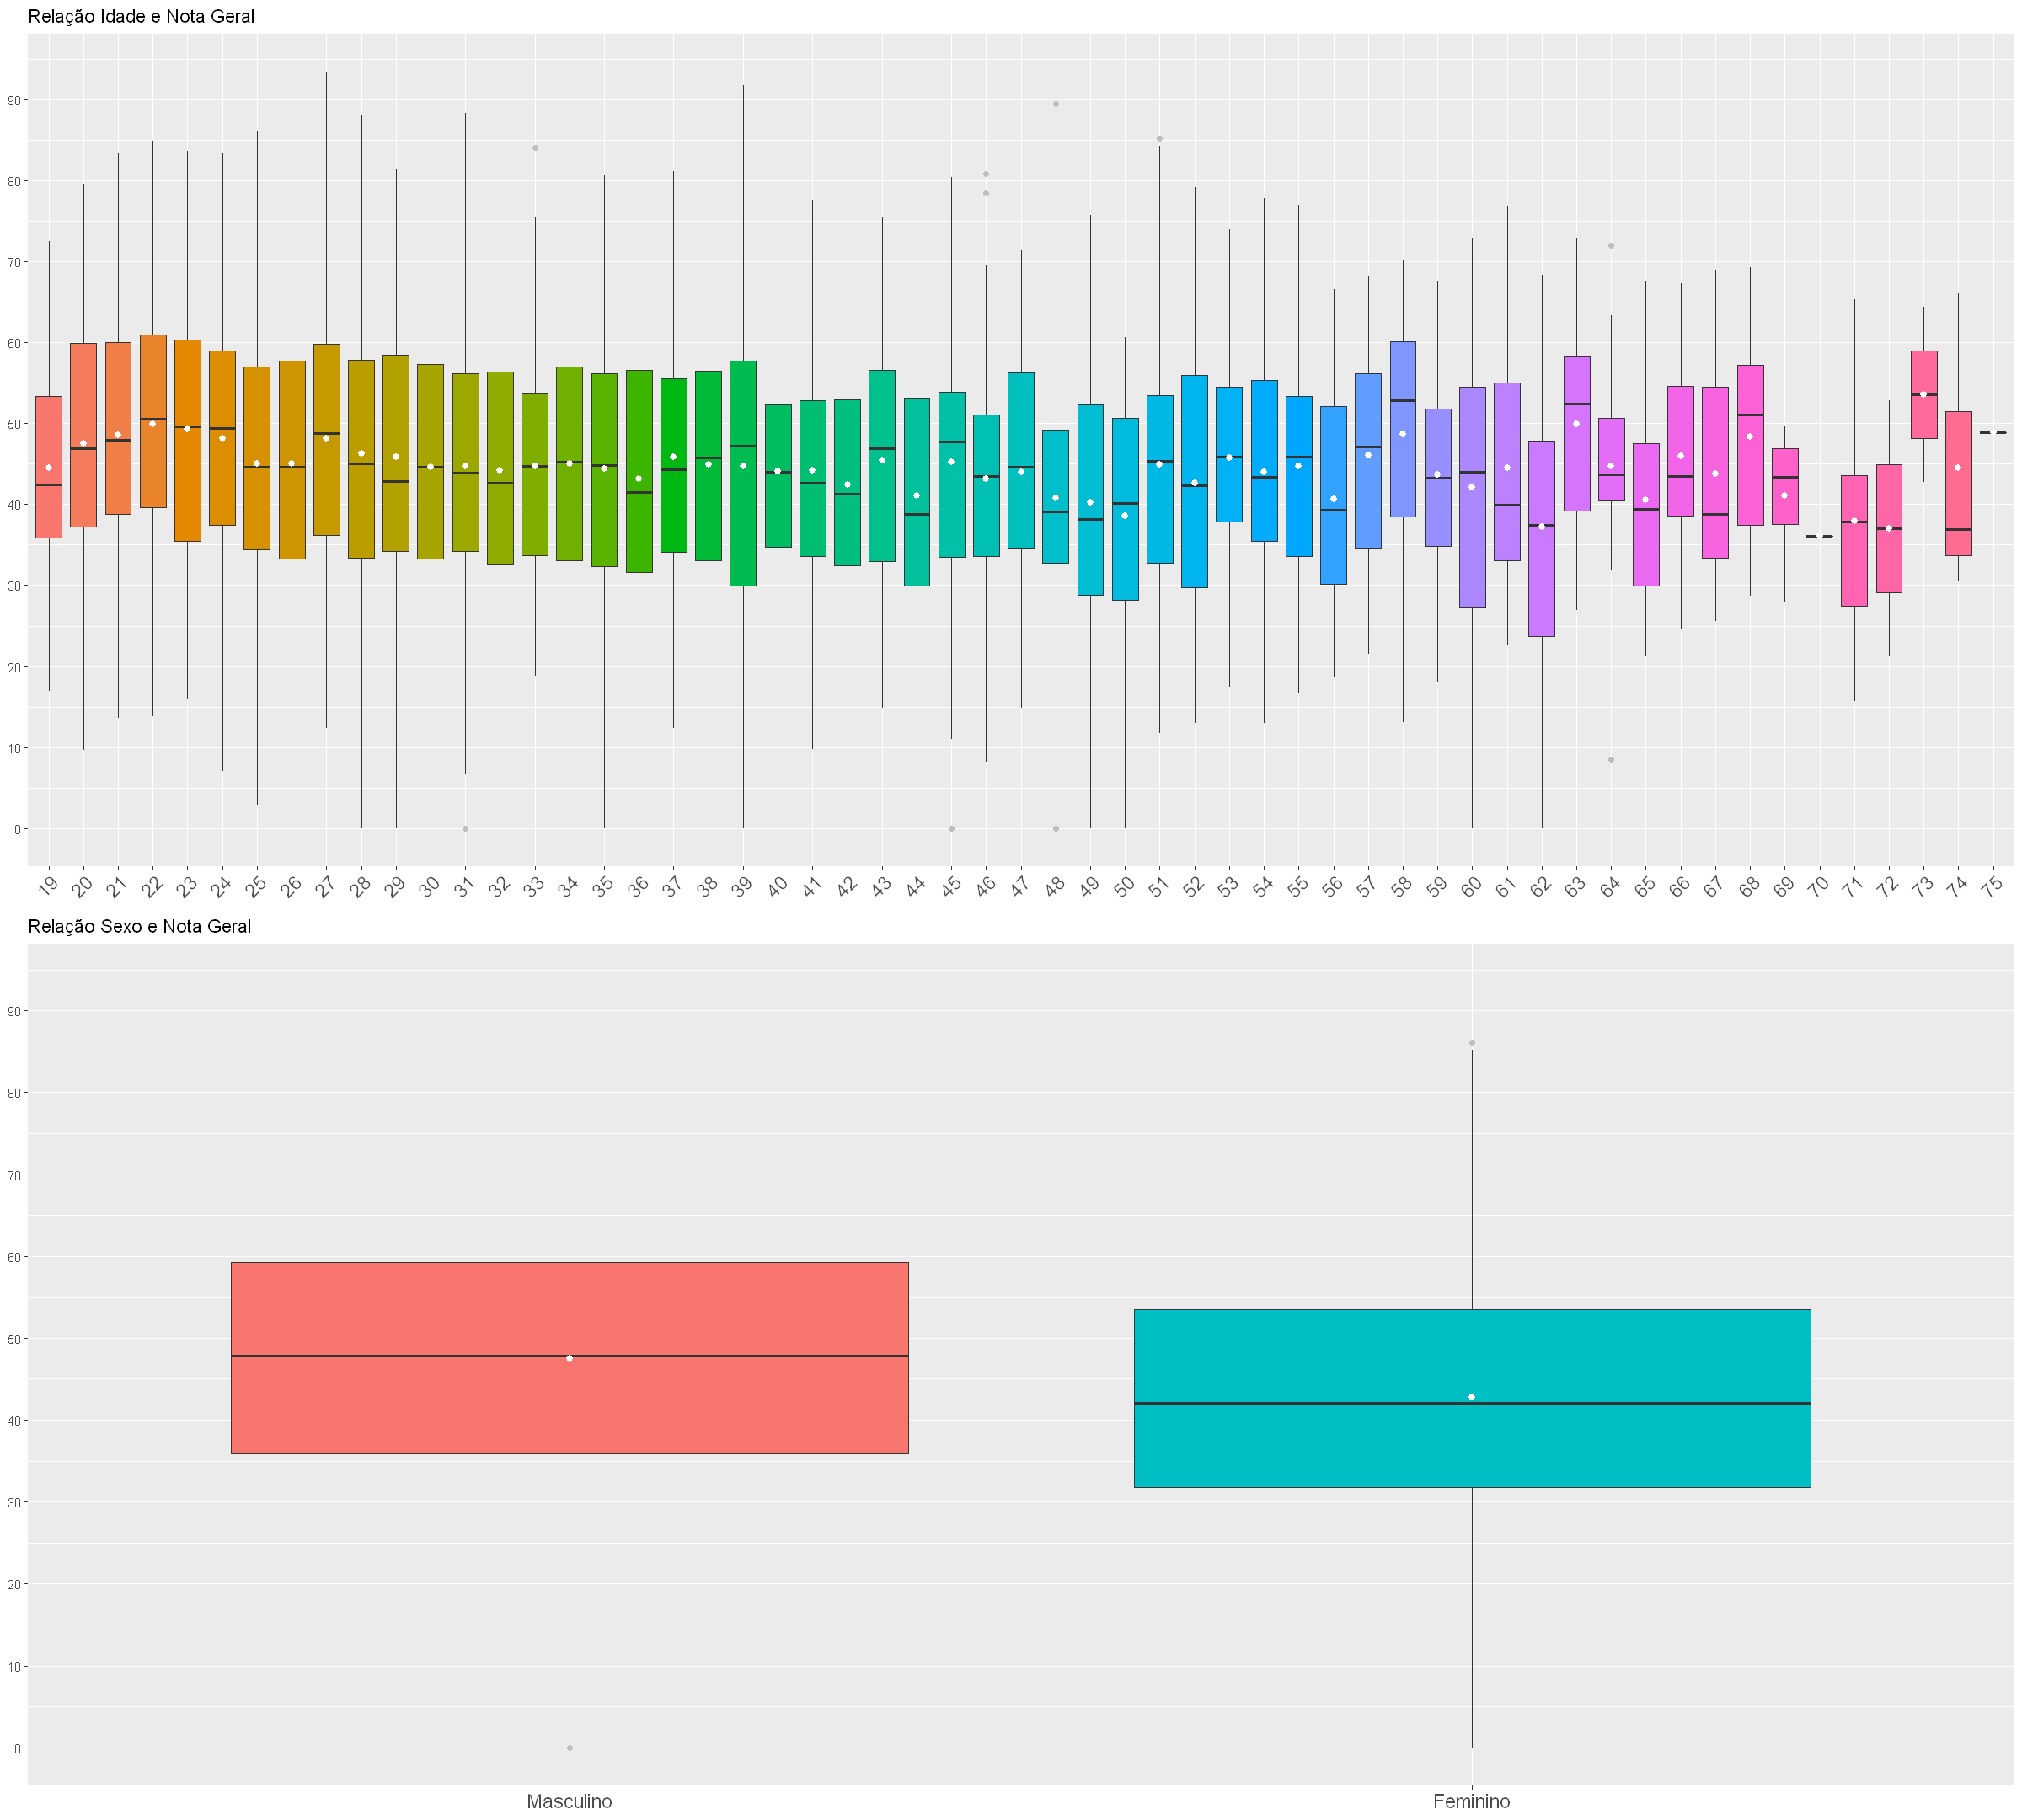

In [82]:
# Gráfico relação nota e características
grid.arrange(nota_carac1, nota_carac2, ncol=1)

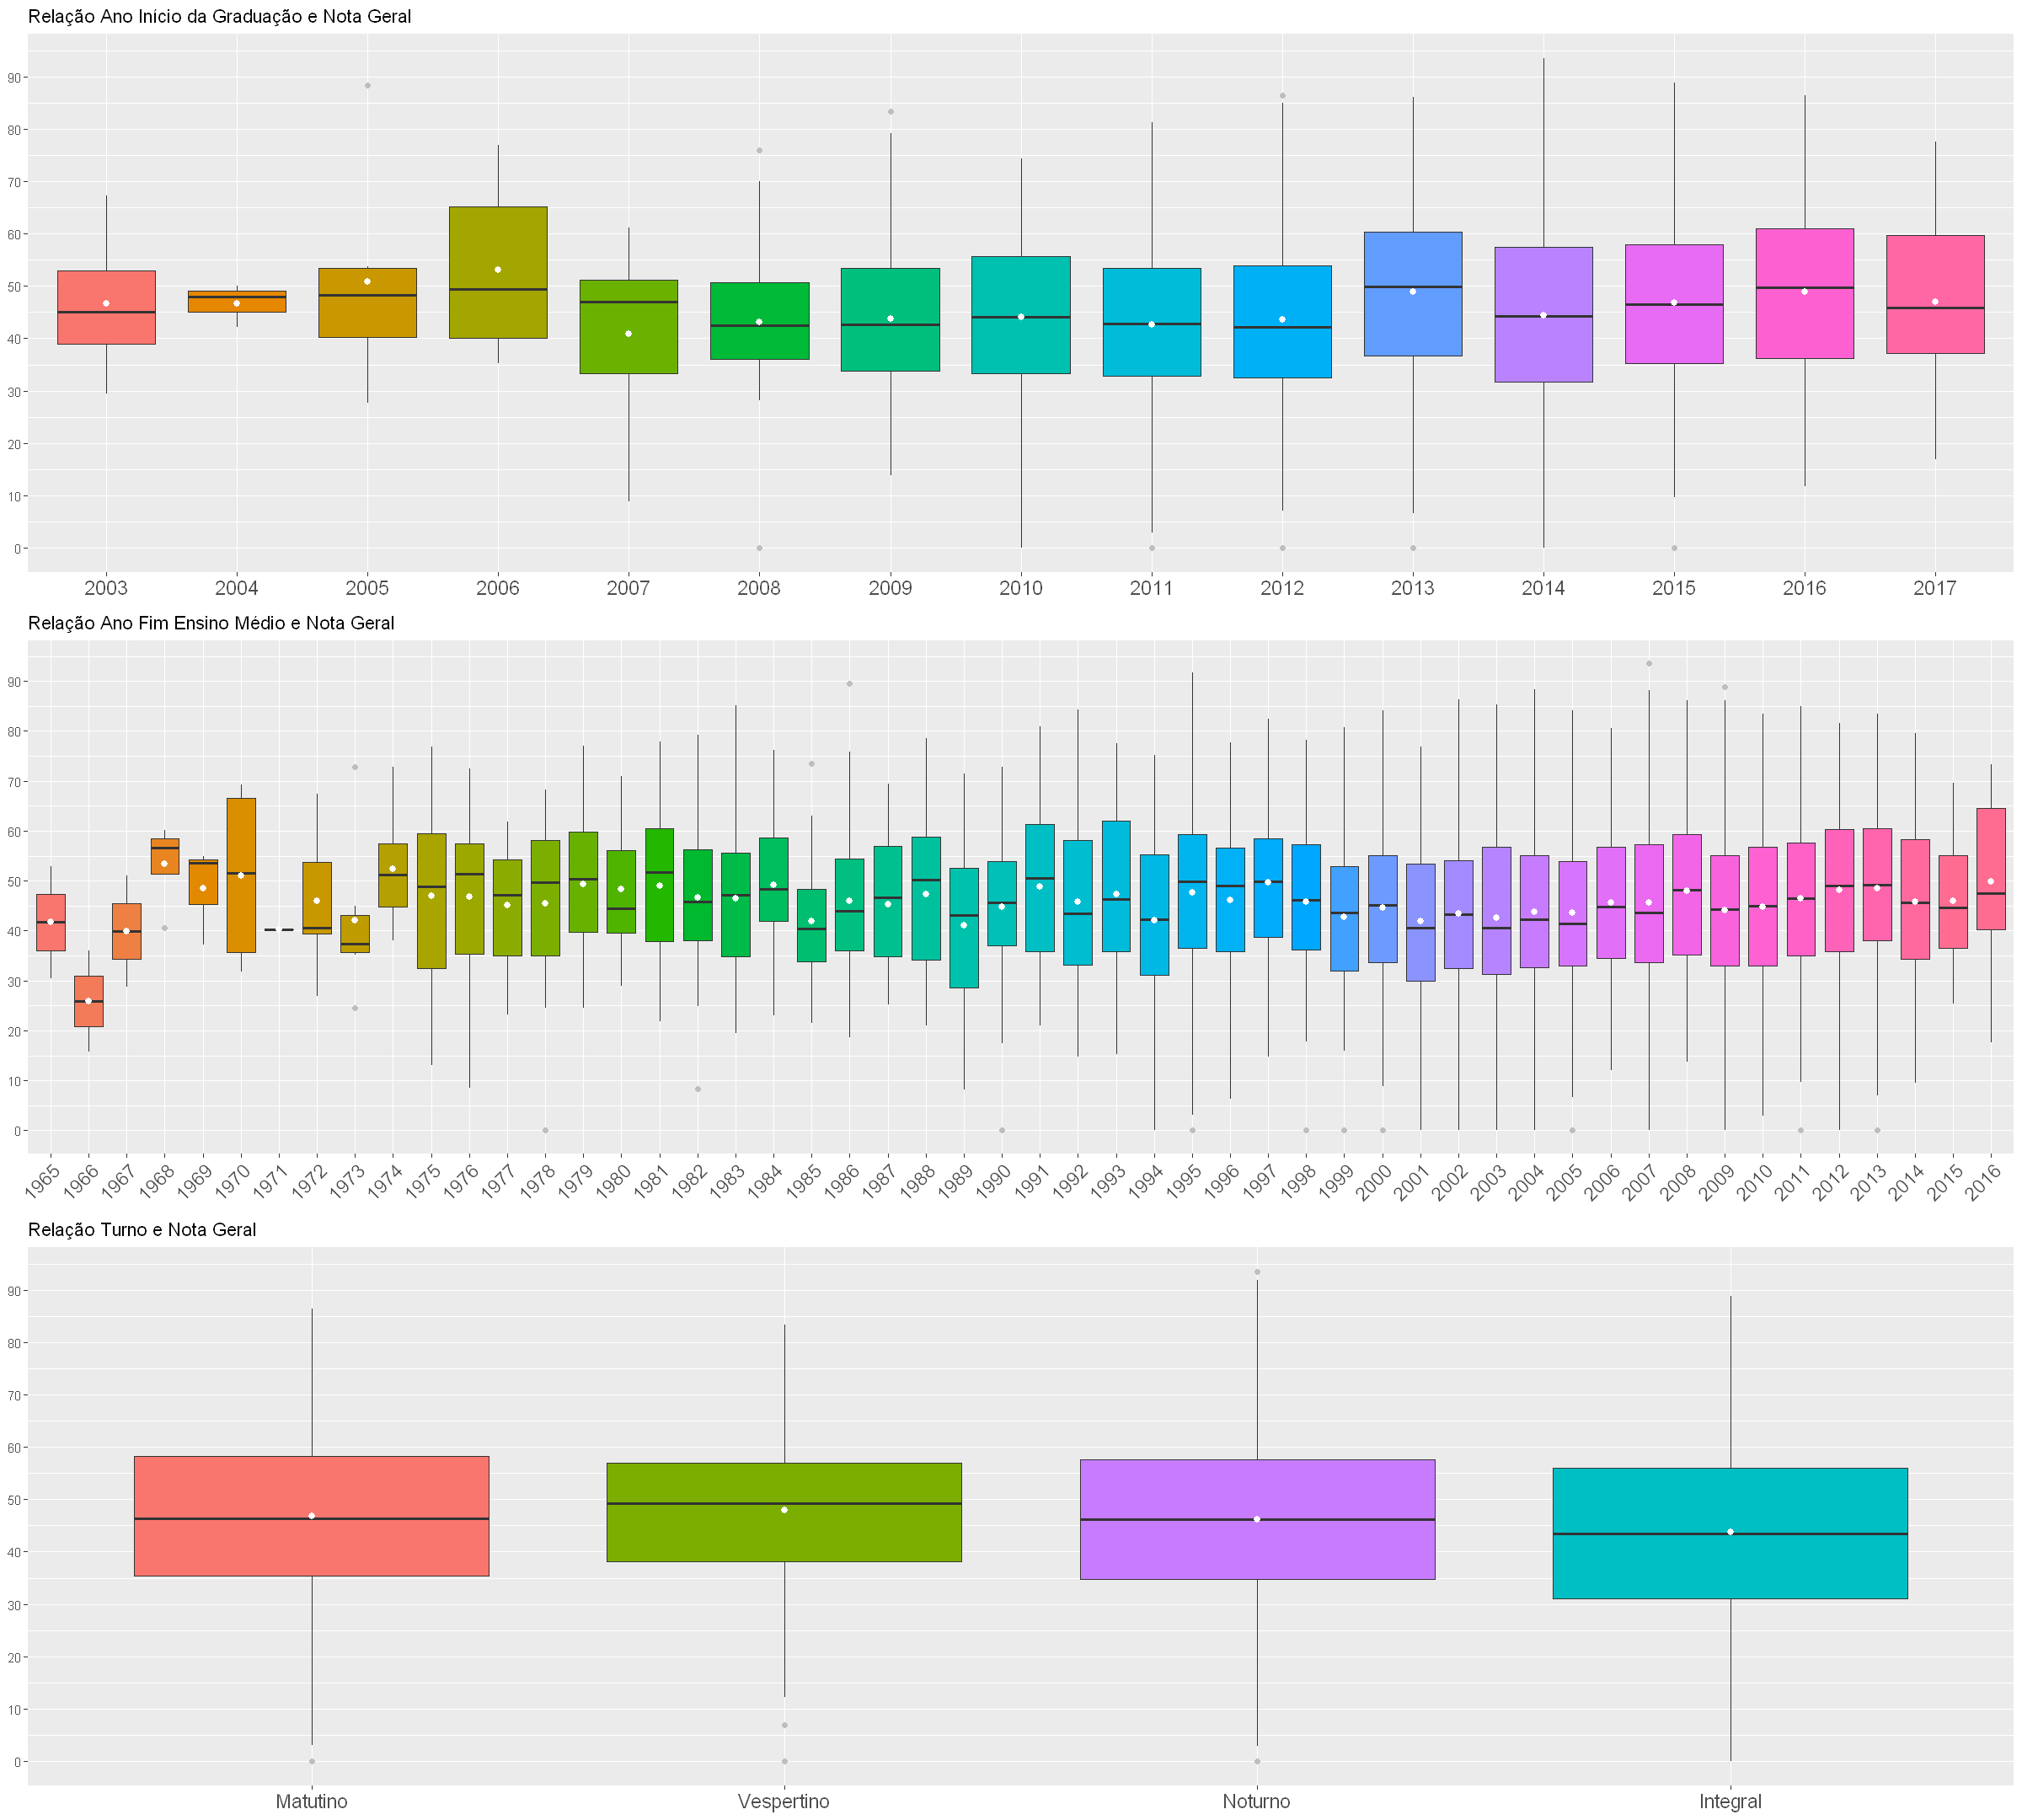

In [83]:
# Gráfico relação nota e características
grid.arrange(nota_carac3, nota_carac4, nota_carac5, ncol=1)

### 3.8 RELAÇÃO NOTA E PERCEPÇÃO DA PROVA


In [84]:
nota_perc1<-df_enade_fil %>%
  ggplot(aes(CO_RS_I1, NT_GER, fill = CO_RS_I1)) +
  geom_boxplot(outlier.colour = "grey", show.legend =F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Percepção de Dificuldade e Formação Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10))

In [85]:
nota_perc2<- df_enade_fil %>%
  ggplot(aes(CO_RS_I2, NT_CE, fill = CO_RS_I2)) +
  geom_boxplot(outlier.colour = "grey", show.legend =F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Percepção de Dificuldade e Componente Específico", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10))

In [86]:
nota_perc3<- df_enade_fil %>%
  ggplot(aes(CO_RS_I9, NT_GER, fill = CO_RS_I9)) +
  geom_boxplot(outlier.colour = "grey", show.legend =F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Tempo de Prova e Nota Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) 

In [87]:
nota_perc4<- df_enade_fil %>%
  ggplot(aes(CO_RS_I9, NT_FG, fill = CO_RS_I9)) +
  geom_boxplot(outlier.colour = "grey", show.legend =F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Tempo de Prova e Nota Formação Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_FG), max(df_enade_fil$NT_FG), by=10))

In [88]:
nota_perc5 <-df_enade_fil %>%
  ggplot(aes(CO_RS_I9, NT_CE, fill = CO_RS_I9)) +
  geom_boxplot(outlier.colour = "grey", show.legend =F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Tempo de Prova e Nota Componente Específico", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(size = 14)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_CE), max(df_enade_fil$NT_CE), by=10)) 

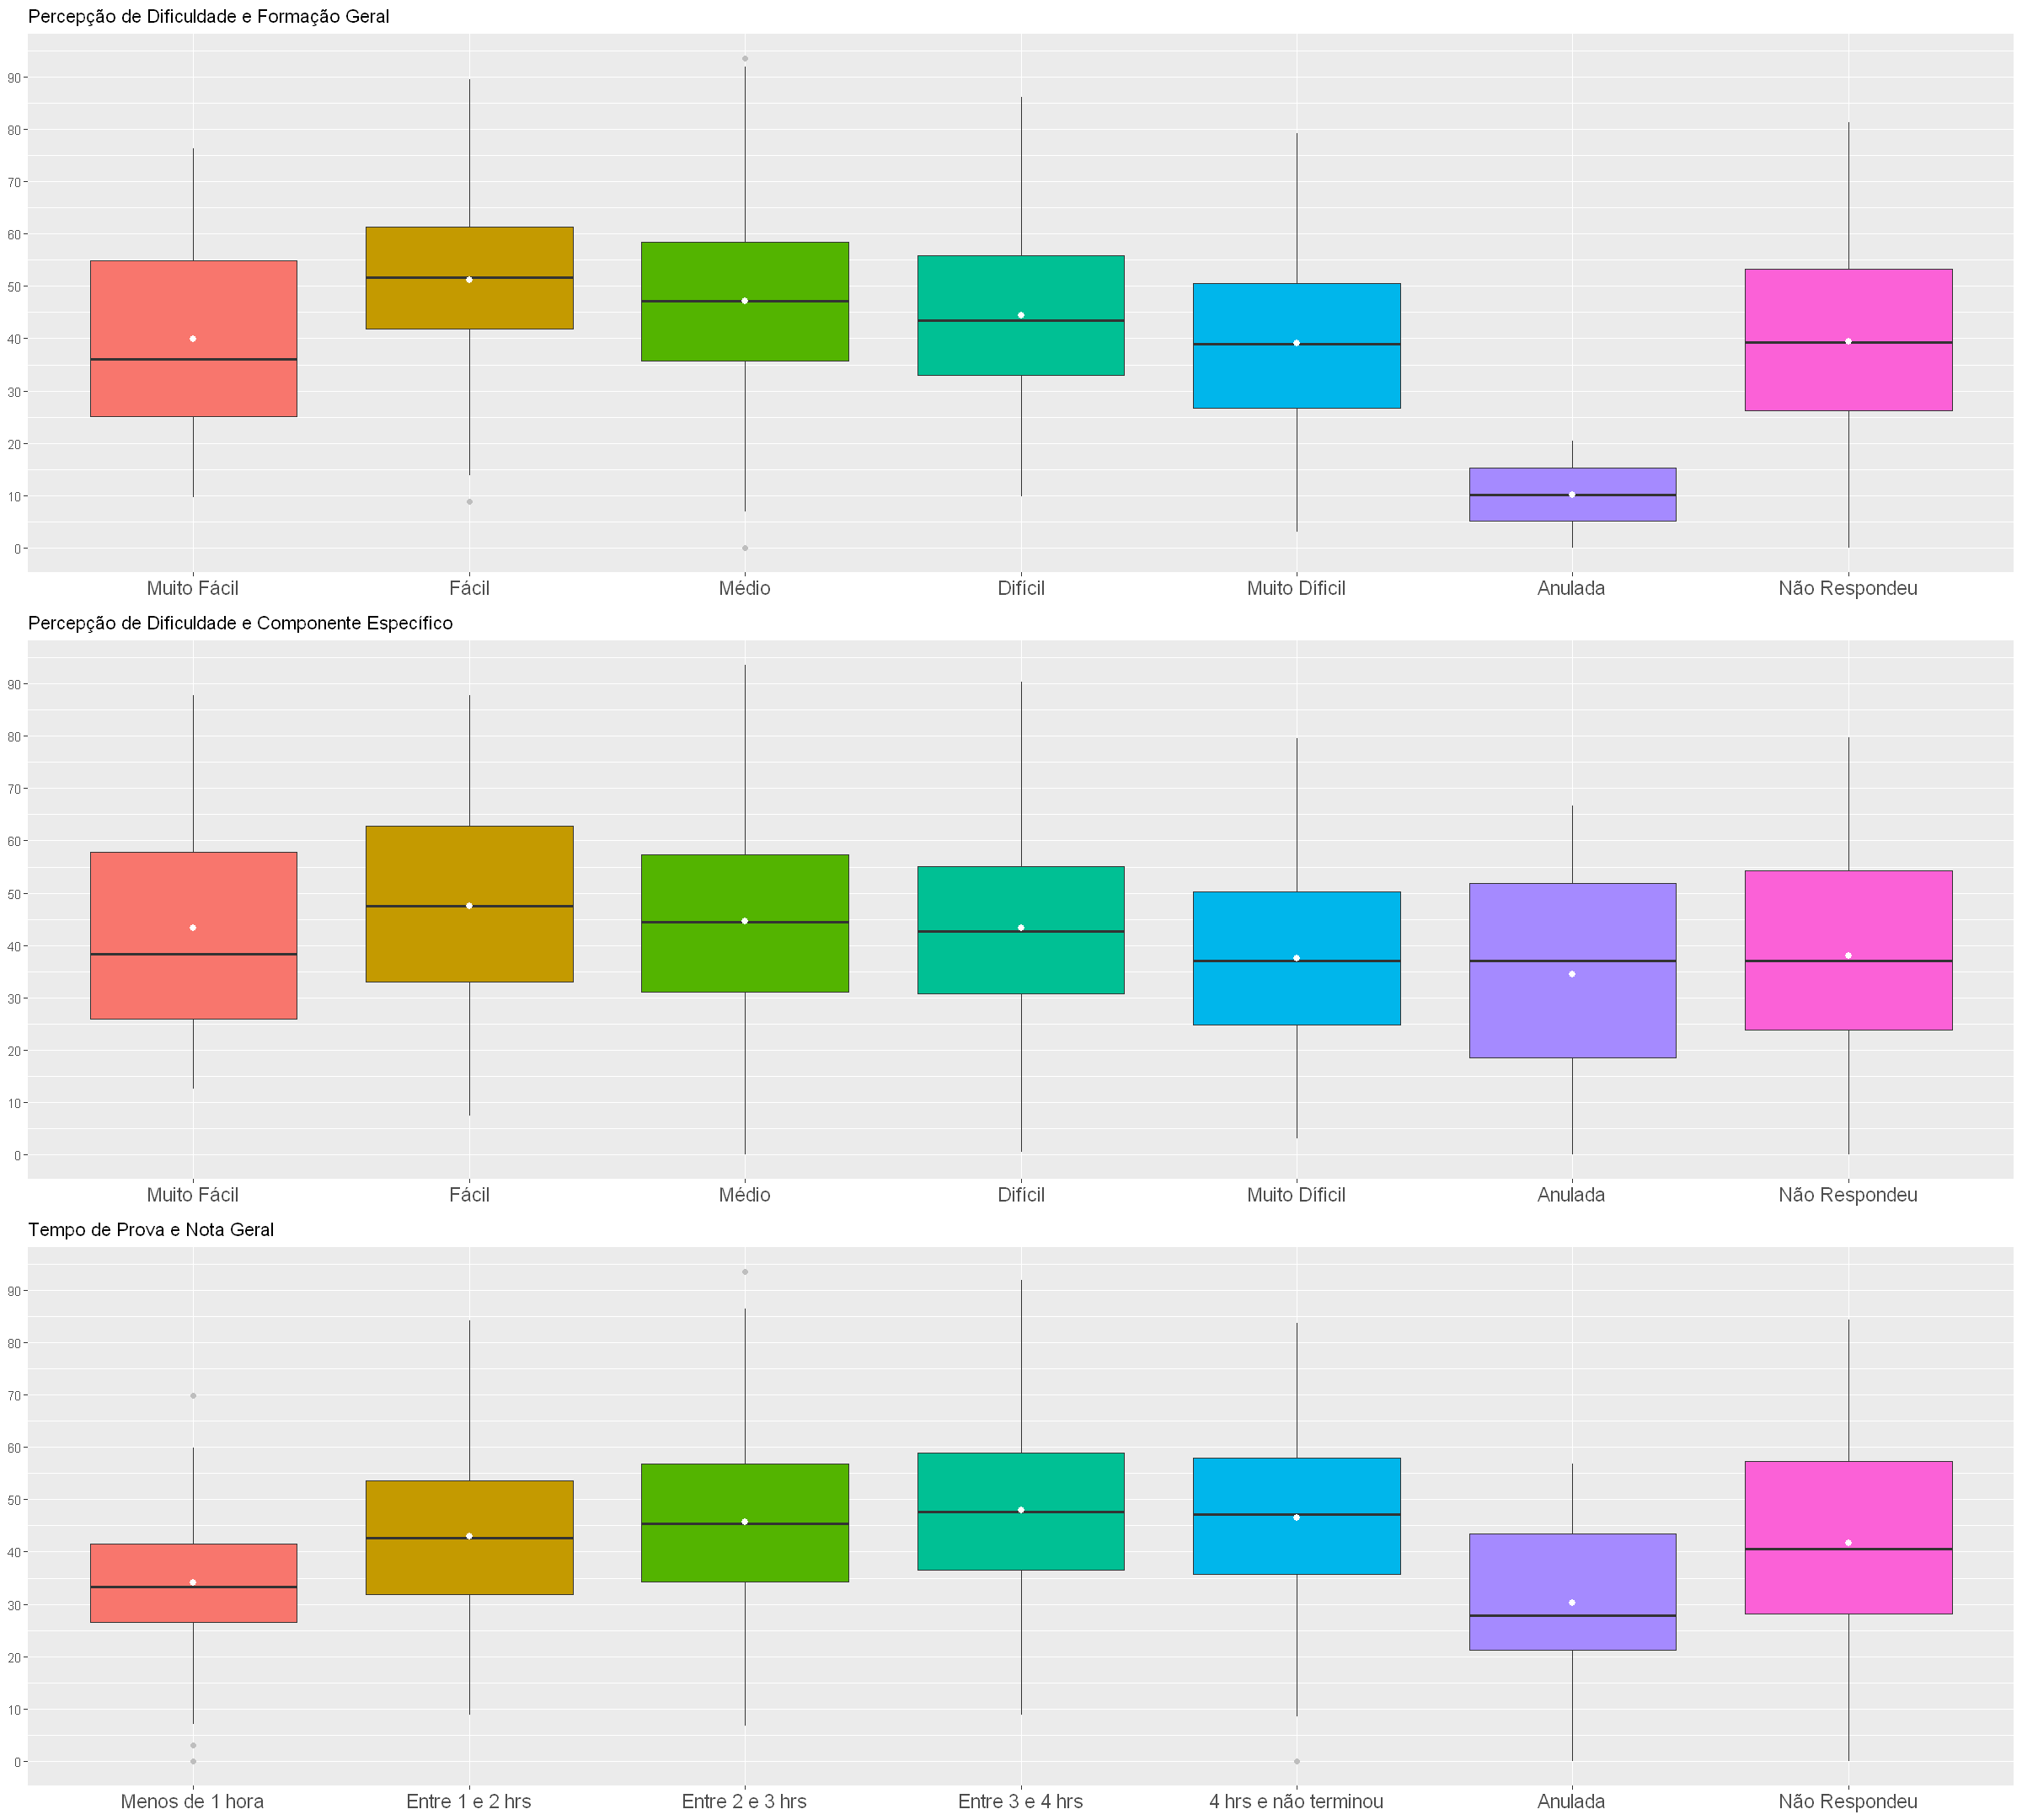

In [89]:
# Gráficos relação nota e percepção
grid.arrange(nota_perc1, nota_perc2, nota_perc3)

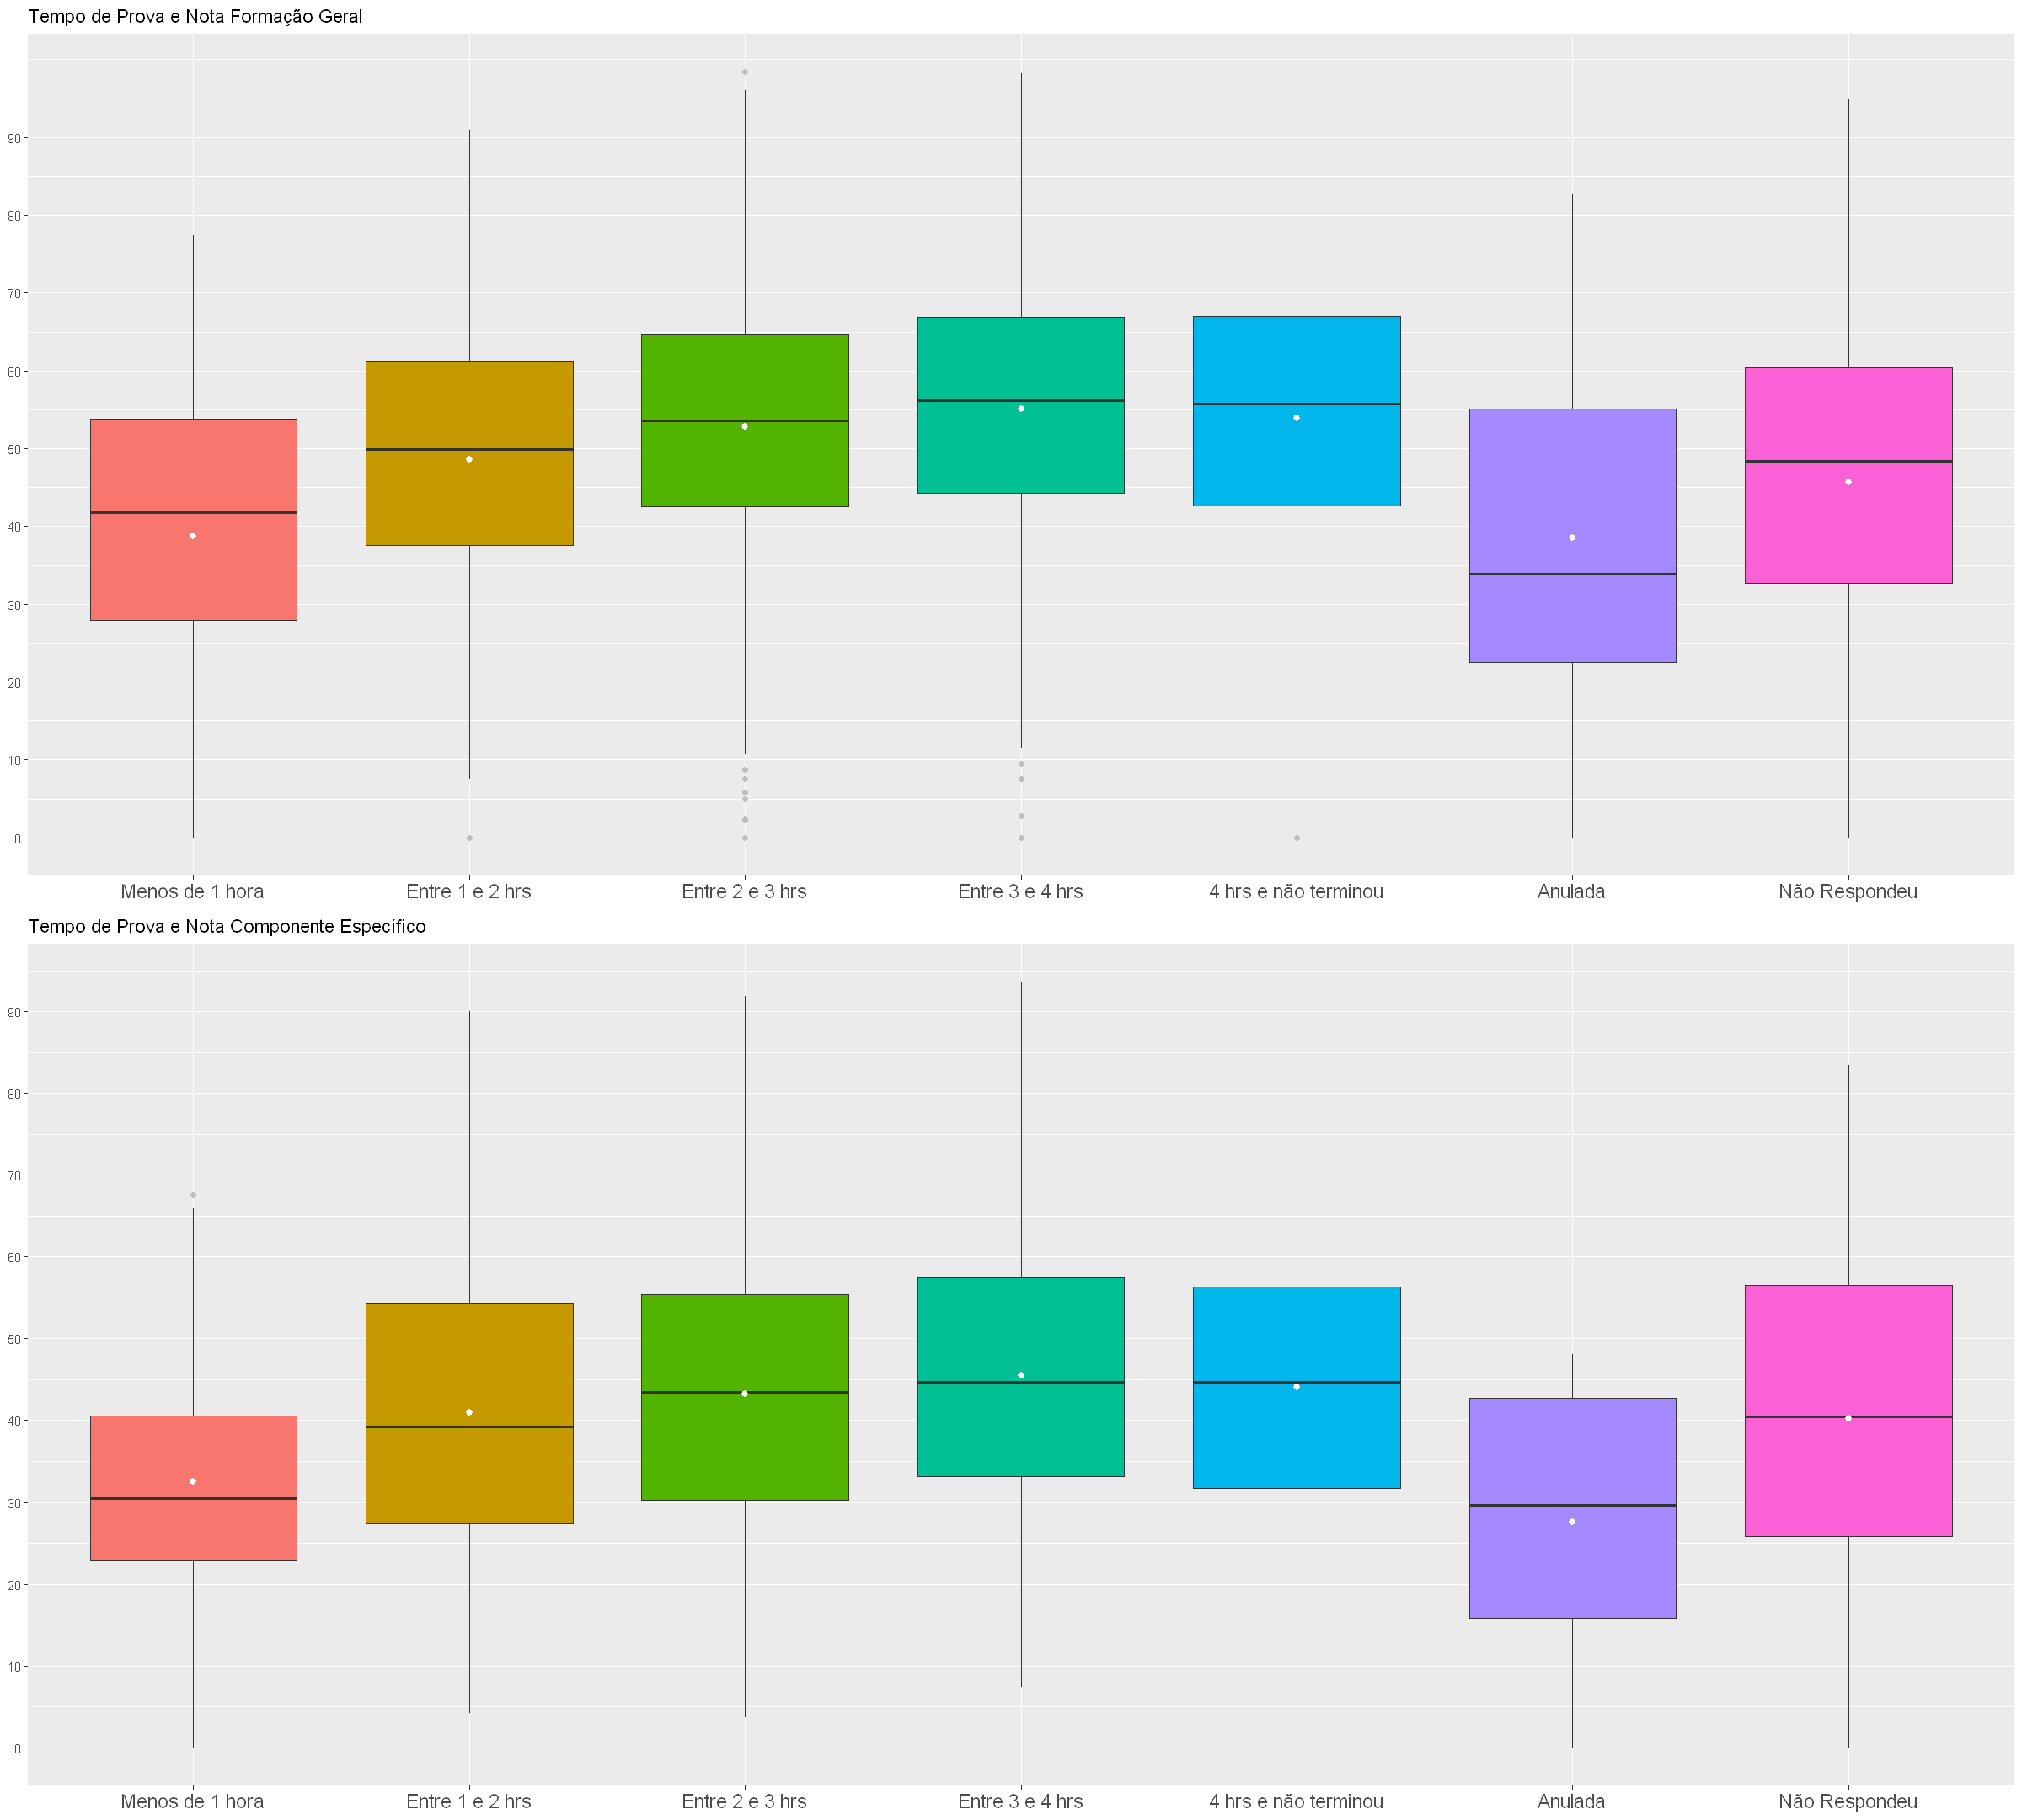

In [90]:
# Gráficos relação notas e percepção
grid.arrange(nota_perc4, nota_perc5)

### 3.8 RELAÇÃO NOTA E PERFIL SOCIOECONÔMICO

In [91]:
nota_soc1<- df_enade_fil %>%
  ggplot(aes(QE_I08, NT_GER, fill = QE_I08)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Renda e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [92]:
nota_soc2<- df_enade_fil %>%
  ggplot(aes(QE_I01, NT_GER, fill = QE_I01)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Estado Civil e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [93]:
nota_soc3<- df_enade_fil %>%
  ggplot(aes(QE_I02, NT_GER, fill = QE_I02)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Cor/Raça e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [94]:
nota_soc4<- df_enade_fil %>%
  ggplot(aes(QE_I04, NT_GER, fill = QE_I04)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Escolaridade do Pai e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [95]:
nota_soc5<- df_enade_fil %>%
  ggplot(aes(QE_I05, NT_GER, fill = QE_I05)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Escolaridade da Mãe e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [96]:
nota_soc6<- df_enade_fil %>%
  ggplot(aes(QE_I07, NT_GER, fill = TP_SEXO)) +
  geom_boxplot(outlier.colour = "grey") +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(fill = "Sexo", title = "Relação Número de Filhos e Nota Geral", x=NULL, y=NULL) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [97]:
nota_soc7<- df_enade_fil %>%
  ggplot(aes(QE_I15, NT_GER, fill = QE_I15)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Ação Afirmativa e Nota Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(angle = 25, hjust = 1, vjust = 1)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

In [98]:
nota_soc8<- df_enade_fil %>%
  ggplot(aes(QE_I18, NT_GER, fill = QE_I18)) +
  geom_boxplot(outlier.colour = "grey", show.legend=F) +
  stat_summary(fun=mean, geom="point",
               shape=20, size=3, color="white", fill="green") +
  labs(title = "Relação Modalidade EM e Nota Geral", x=NULL, y=NULL) +
  theme(axis.text.x = element_text(angle = 25, hjust = 1, vjust = 1)) +
  scale_y_continuous(breaks = seq(min(df_enade_fil$NT_GER), max(df_enade_fil$NT_GER), by=10)) +
  theme(axis.text.x = element_text(size = 14))

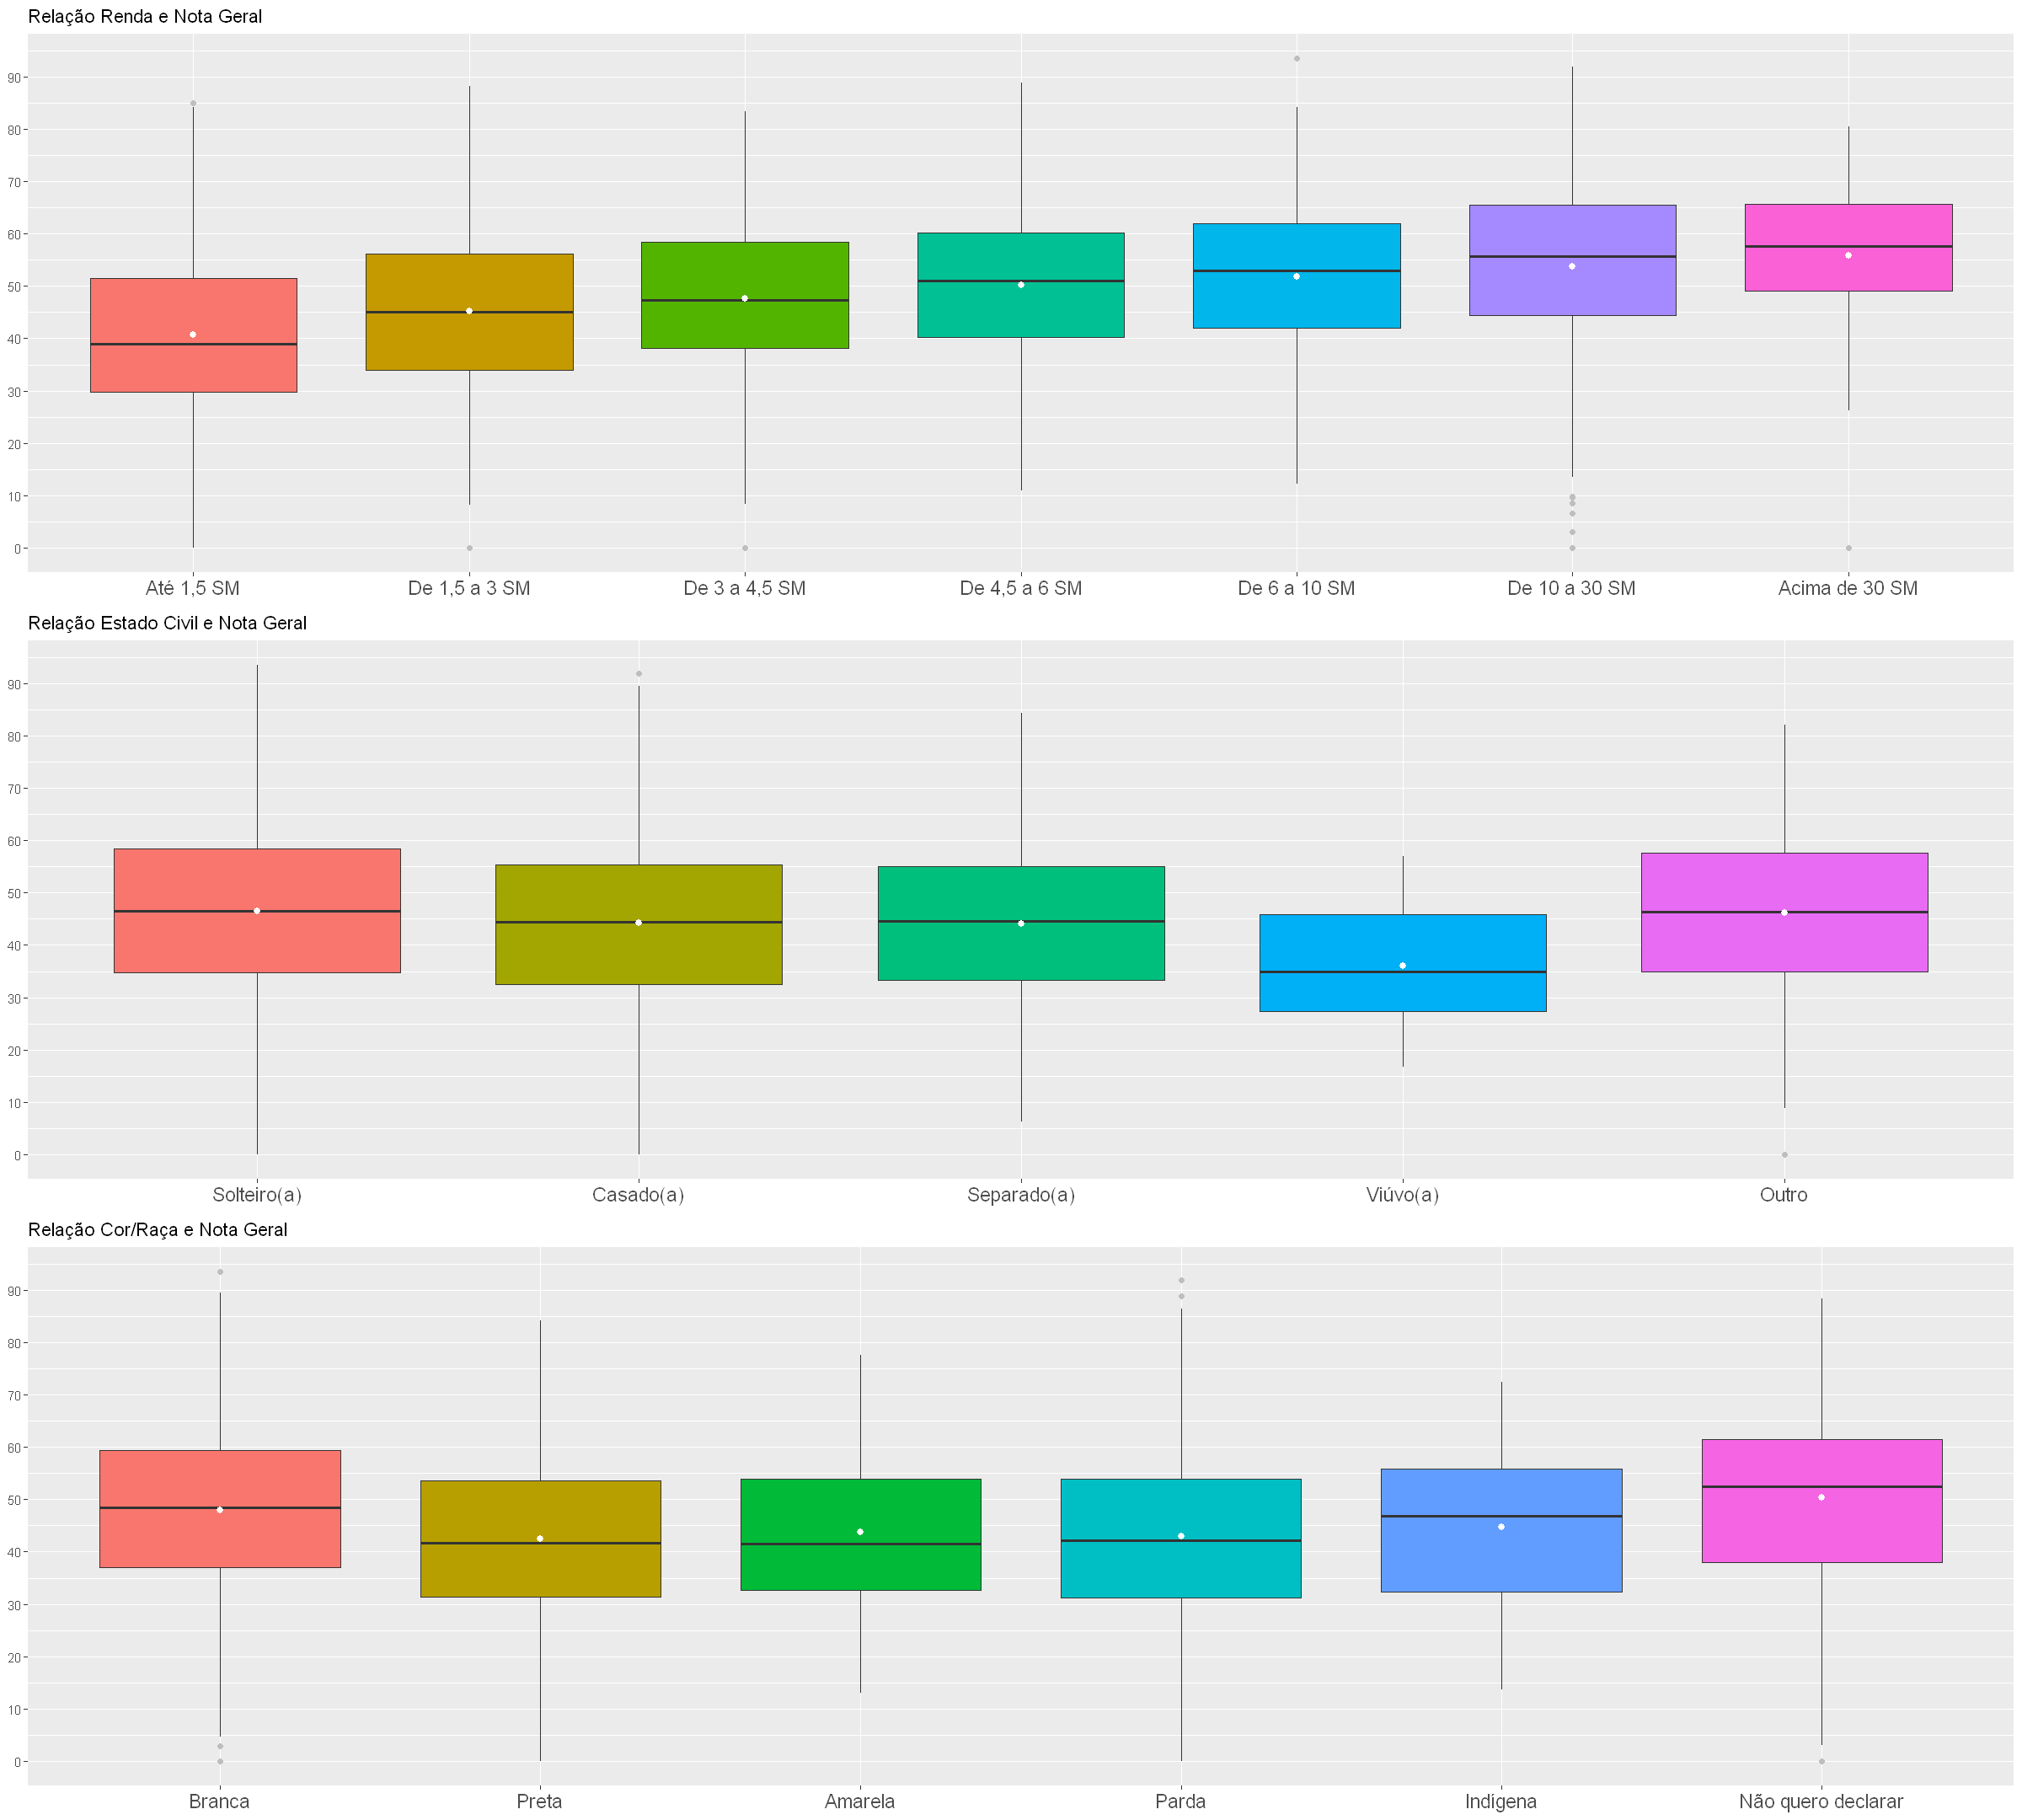

In [99]:
# Gráfico relação nota e perfil socioeconômico
grid.arrange(nota_soc1, nota_soc2, nota_soc3)

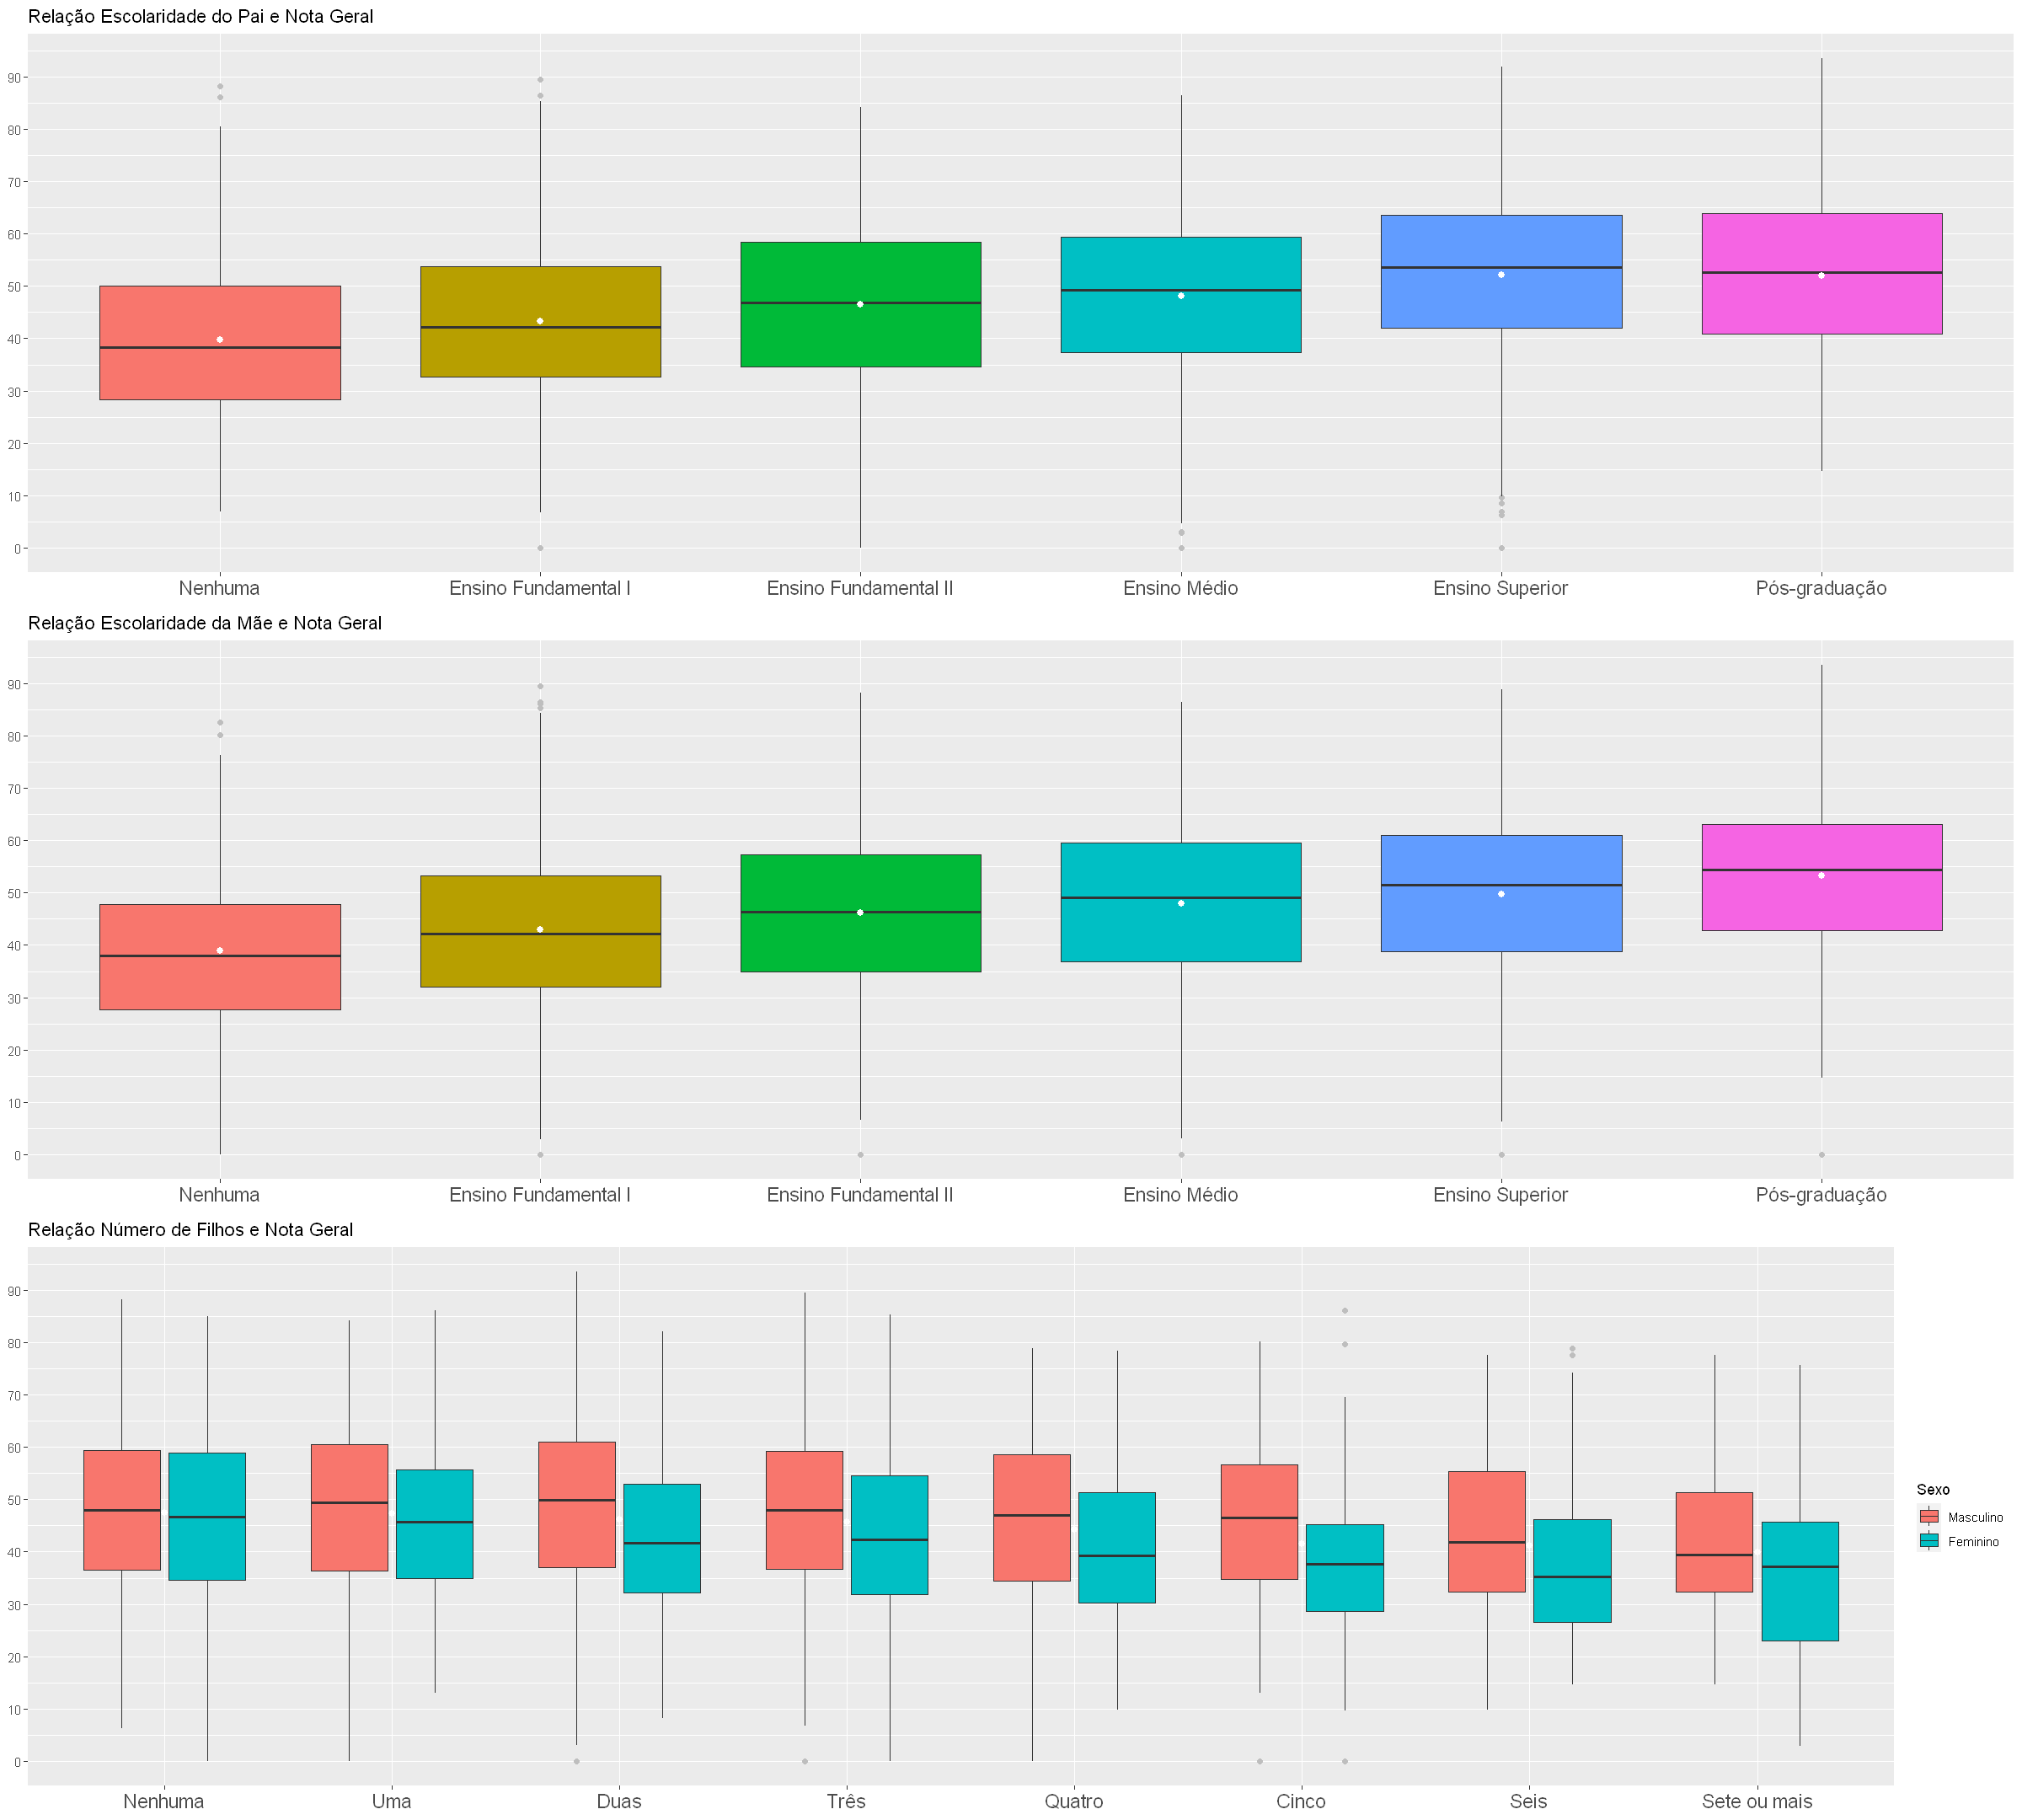

In [100]:
# Gráfico relação nota e perfil socioeconômico
grid.arrange(nota_soc4, nota_soc5, nota_soc6)

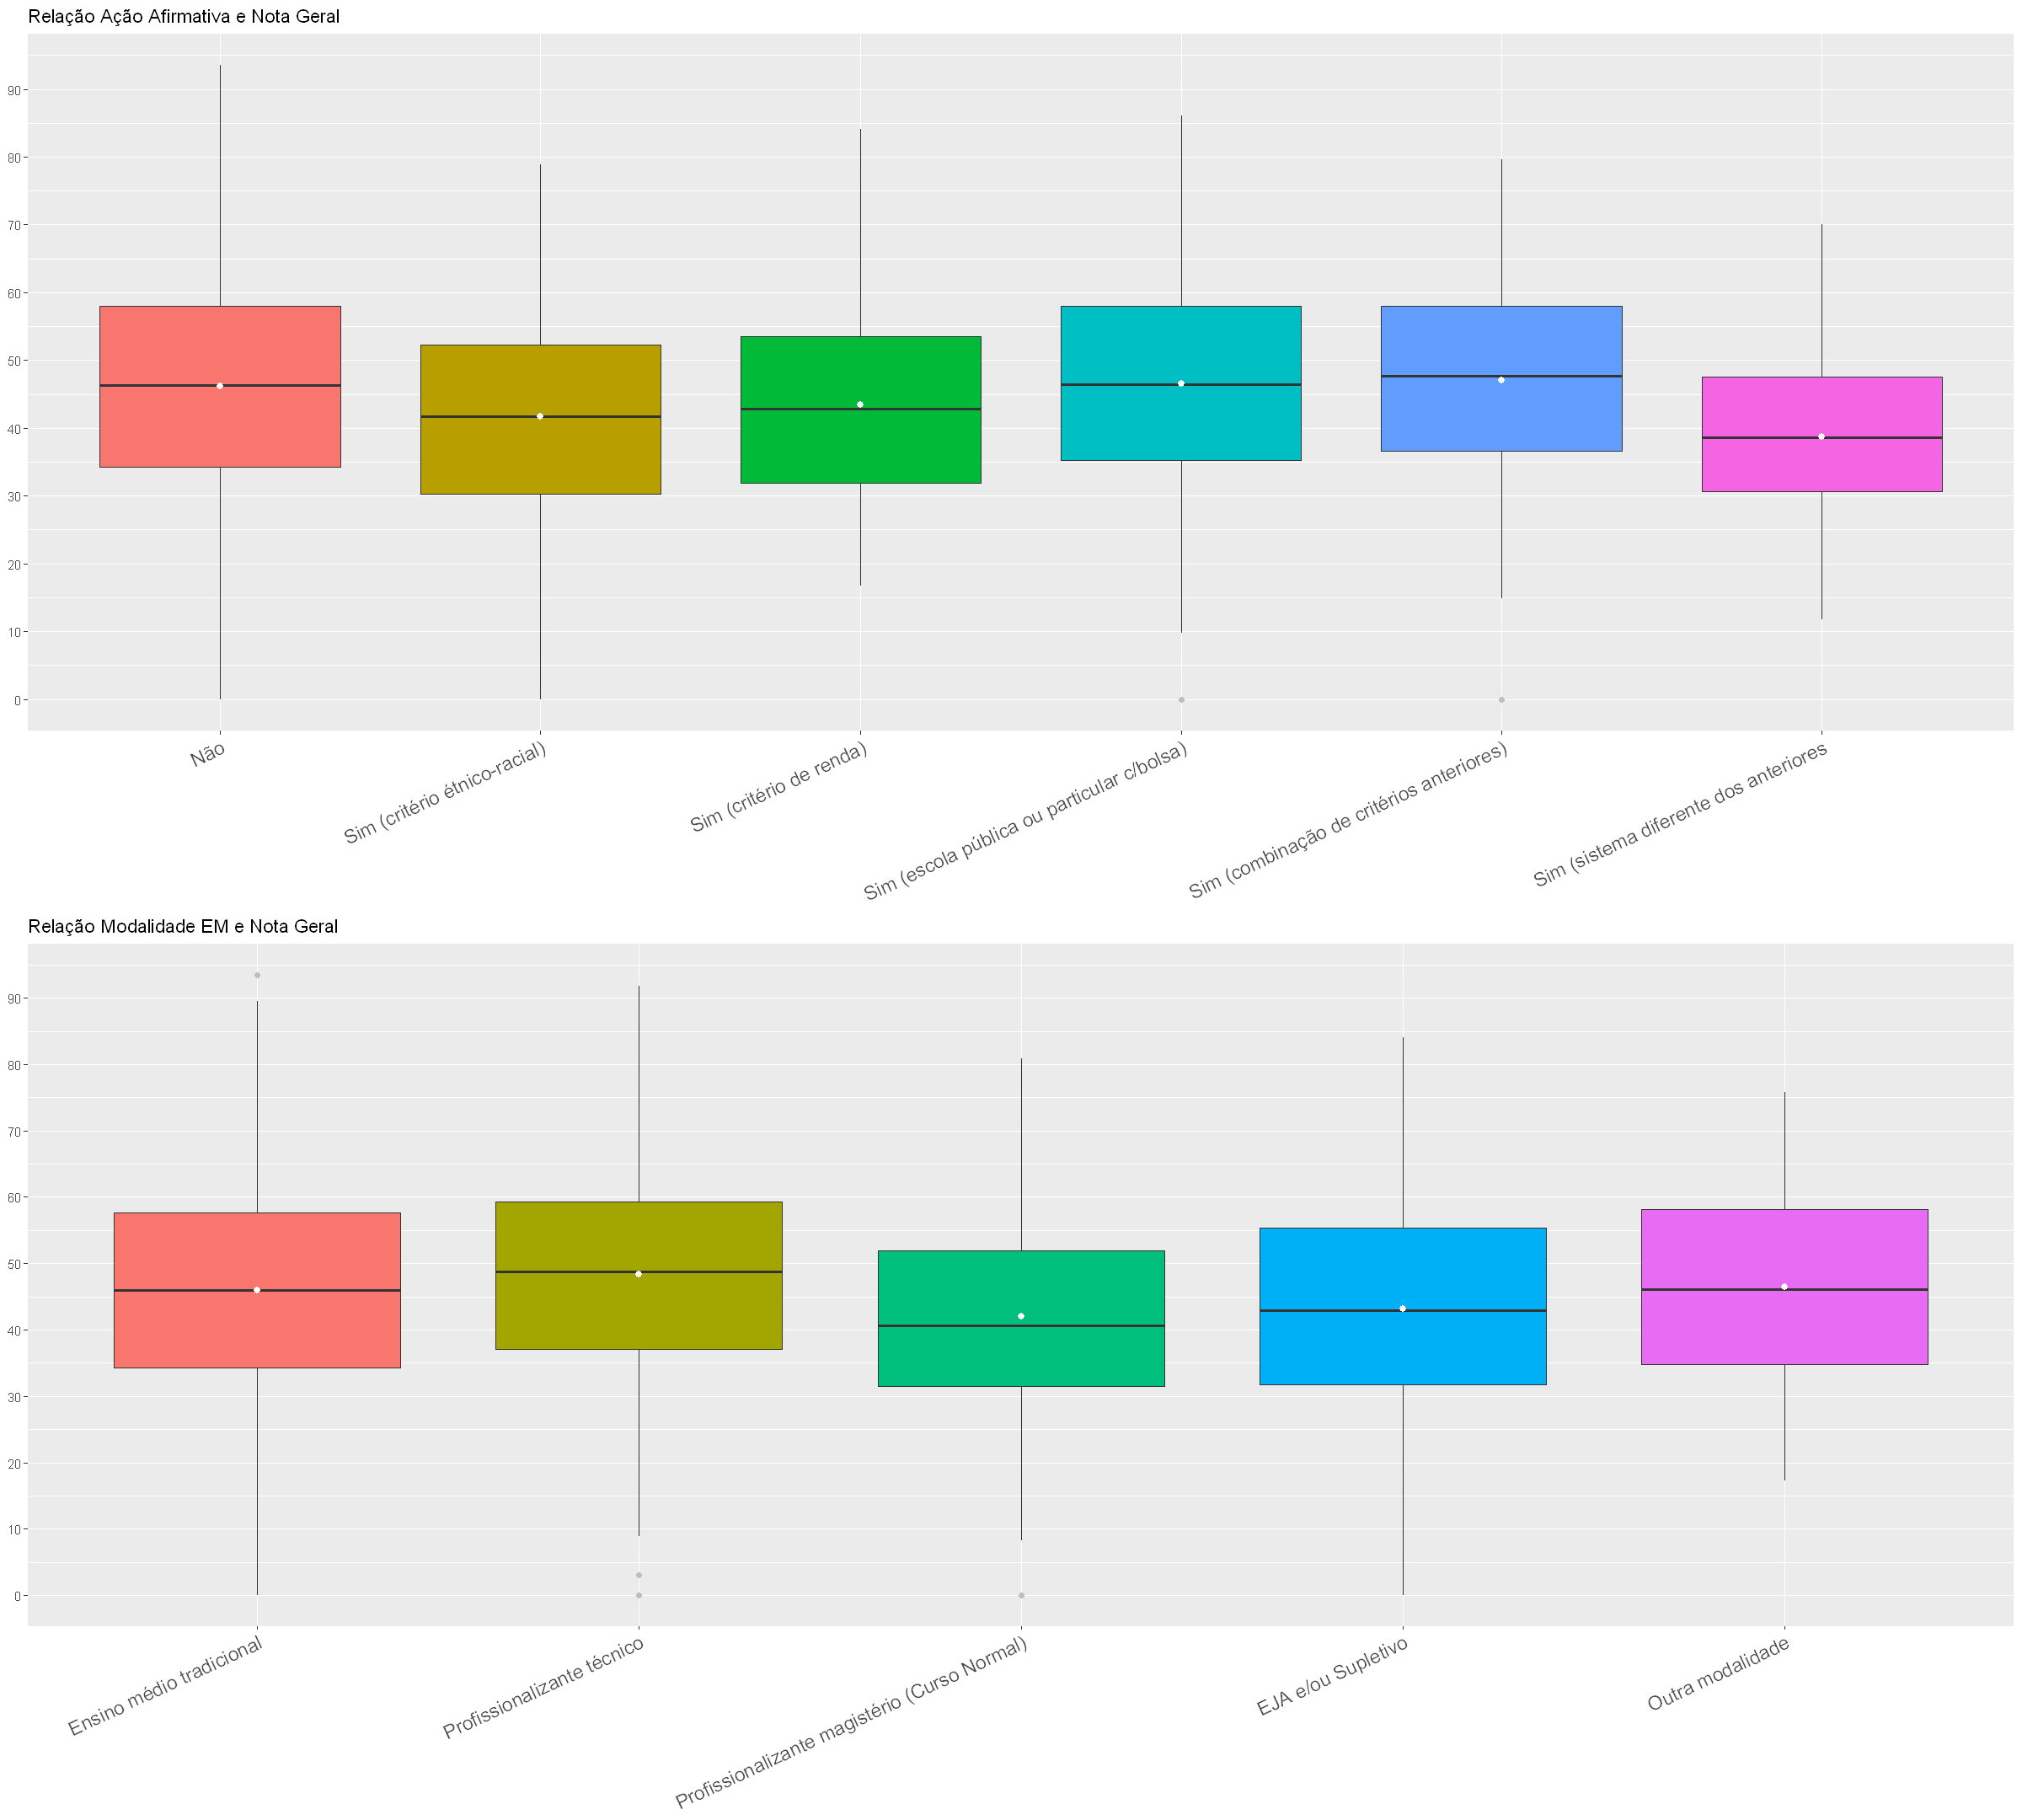

In [101]:
# Gráfico relação nota e perfil socioeconômico
grid.arrange(nota_soc7, nota_soc8)

## CONCLUSÃO

<p style='text-align: justify;'>1 - Os alunos das regiões Norte e Nordeste possuem, em média, notas mais baixas quando comparadas com outras regiões. Isso pode ser compreendido a partir de elementos socioeconômicos, quando olhamos índices tais como rendimento médio mensal do trabalho, informalidade, rendimento domiciliar per capita, etc., que em média são os menores do Brasil.</p>

<p style='text-align: justify;'>2- Os alunos que consideraram o grau de dificuldade da prova muito baixo e baixo obtiveram notas mais baixas. Mesma relação encontrada quando comparamos o tempo de realização da prova e sua respectiva nota.</p>

<p style='text-align: justify;'>3- Encontramos uma correlação positiva entre notas e renda familiar. Ou seja, quando maior a renda familiar, maior a nota do aluno. Ademais, alunos autodeclarados pretos ou pardos em média possuem menores notas.</p>

<p style='text-align: justify;'>4- Observamos uma correlação positiva entre notas e escolaridade dos pais. Filhos de pais com curso superior ou pós graduação possuem notas maiores.</p>

<p style='text-align: justify;'>5- Os alunos que possuem um maior número de filhos obtiveram notas menores. Quando comparamos nota e número de filhos por sexo, percebemos que não há grande disparidade na média das notas de alunos sem filhos. No entanto, quando comparamos alunos com filhos percebemos uma razoável diferença na média das notas. Ou seja, participantes do sexo feminino com filhos obtiveram menores notas que os participantes do sexo masculino que possuem filhos.</p>

Referências:<br>
-> https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enade<br>
-> Síntese de indicadores sociais : uma análise das condições de vida da população brasileira : 2020 / IBGE, Coordenação de População e Indicadores Sociais

<p>Diego Ramirez<br>
daarfarias@hotmail.com<br>
https://www.kaggle.com/daarfarias<br>
https://github.com/daarfarias<br></p>
